In [55]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tabulate import tabulate
from IPython.display import HTML, display

In [56]:
bins = np.arange(0, 1, 0.025)
#bins = np.linspace(0, 1, 100)
xticks = np.arange(0, 1, 0.1)

In [57]:
threshold_C19_RW29 = 0.7
threshold_C19_RW39 = 0.7
threshold_C19_RW49 = 0.6
threshold_C19_RW59 = 0.6
threshold_C29_RW49 = 0.7
threshold_C39_RW59 = 0.7


source_classes_C19_RW29 = 19
source_classes_C19_RW39 = 19
source_classes_C19_RW49 = 19
source_classes_C19_RW59 = 19
source_classes_C29_RW49 = 29
source_classes_C39_RW59 = 39

In [58]:
scores_C19_RW29   =  [0.2611, 0.9562, 0.9617, 0.3870, 0.8980, 0.4652, 0.9199, 0.9393, 0.9436, 0.6490, 0.6704, 0.7925, 0.1506, 0.6793, 0.3305, 0.7322, 0.9405, 0.1318, 0.7682, 0.7879, 0.7420, 0.4055, 0.5083, 0.2460, 0.3325, 0.9249, 0.1743, 0.9513, 0.8624, 0.8363, 0.7208, 0.7579, 0.8720, 0.7675, 0.7205, 0.1759, 0.7743, 0.1617, 0.4533, 0.8695, 0.1544, 0.9468, 0.5103, 0.5098, 0.6095, 0.6097, 0.6257, 0.4066, 0.8250, 0.6758, 0.9662, 0.8240, 0.5326, 0.9594, 0.5245, 0.9401, 0.9500, 0.9565, 0.8418, 0.9287, 0.9363, 0.3686, 0.6755, 0.9279, 0.8491, 0.6858, 0.1526, 0.8476, 0.6601, 0.7926, 0.3885, 0.6884, 0.1329, 0.9689, 0.5335, 0.9381, 0.2652, 0.8874, 0.9281, 0.3728, 0.7696, 0.5933, 0.7363, 0.8903, 0.8566, 0.2038, 0.3729, 0.0961, 0.9722, 0.8734, 0.3963, 0.3528, 0.9295, 0.4766, 0.9520, 0.9245, 0.8264, 0.6916, 0.9274, 0.4289, 0.7474, 0.6497, 0.6677, 0.5702, 0.8617, 0.9455, 0.6968, 0.9028, 0.8991, 0.6307, 0.7609, 0.6196, 0.6449, 0.8594, 0.5601, 0.8352, 0.6861, 0.8628, 0.6209, 0.8895, 0.7432, 0.5211, 0.5992, 0.5378, 0.7922, 0.5282, 0.9369, 0.7597, 0.9256, 0.8902, 0.9641, 0.9062, 0.9392, 0.7520, 0.8610, 0.1746, 0.8846, 0.8935, 0.8211, 0.7808, 0.7334, 0.9176, 0.8997, 0.6984, 0.5330, 0.8614, 0.7032, 0.7636, 0.9112, 0.8393, 0.7815, 0.5023, 0.8651, 0.7536, 0.8541, 0.2764, 0.7034, 0.9539, 0.8716, 0.5429, 0.3548, 0.8280, 0.3334, 0.8237, 0.3115, 0.9295, 0.8914, 0.9429, 0.9384, 0.5251, 0.4268, 0.4176, 0.6094, 0.8473, 0.7754, 0.6262, 0.4082, 0.3195, 0.9394, 0.2982, 0.7832, 0.6987, 0.6143, 0.7071, 0.7965, 0.6204, 0.5754, 0.8892, 0.3689, 0.5171, 0.3930, 0.2771, 0.7252, 0.3888, 0.9679, 0.3276, 0.3605, 0.4565, 0.4277, 0.8674, 0.4904, 0.2173, 0.7442, 0.9360, 0.7510, 0.6592, 0.3166, 0.4112, 0.9085, 0.3130, 0.9256, 0.7127, 0.6721, 0.3486, 0.7028, 0.1772, 0.4542, 0.3155, 0.5671, 0.2455, 0.6395, 0.7985, 0.4443, 0.8405, 0.8587, 0.9285, 0.1553, 0.2192, 0.5263, 0.7282, 0.2626, 0.3033, 0.8703, 0.7409, 0.4668, 0.7400, 0.7035, 0.7311, 0.5194, 0.8942, 0.6432, 0.2975, 0.7093, 0.4494, 0.5132, 0.6950, 0.6120, 0.6418, 0.8395, 0.8739, 0.7867, 0.7472, 0.3510, 0.6391, 0.3605, 0.9446, 0.5046, 0.6482, 0.5152, 0.6103, 0.5843, 0.9020, 0.5952, 0.7100, 0.4186, 0.3701, 0.6807, 0.6283, 0.6982, 0.7532, 0.4366, 0.7788, 0.8088, 0.4480, 0.5034, 0.6439, 0.6932, 0.7014, 0.3798, 0.7444, 0.4279, 0.8802, 0.6472, 0.7244, 0.5341, 0.6362, 0.7874, 0.8362, 0.3228, 0.9241, 0.4442, 0.7571, 0.4357, 0.4668, 0.3438, 0.4273, 0.6409, 0.9336, 0.6616, 0.4753, 0.5631, 0.9603, 0.6332, 0.6431, 0.7686, 0.6828, 0.7444, 0.4671, 0.6747, 0.7960, 0.2567, 0.5398, 0.8953, 0.6745, 0.9280, 0.3978, 0.6134, 0.4632, 0.7795, 0.7124, 0.6203, 0.7484, 0.7246, 0.7629, 0.4133, 0.6588, 0.7096, 0.6552, 0.6650, 0.7912, 0.8390, 0.7401, 0.9159, 0.8545, 0.9987, 0.9991, 0.9335, 0.9137, 0.8681, 0.9937, 0.9434, 0.8688, 0.4854, 0.8097, 0.9018, 0.9955, 0.8721, 0.9343, 0.9705, 0.9861, 0.9804, 0.9423, 0.7641, 0.9923, 0.9522, 0.8765, 0.9557, 0.8826, 0.9264, 0.9778, 0.8537, 0.7129, 0.9224, 1.0000, 0.9258, 0.9453, 0.9748, 0.9527, 0.9310, 0.9270, 0.8785, 0.9564, 0.9453, 0.9362, 0.9258, 0.9303, 0.9561, 0.9315, 0.9266, 0.8683, 0.9870, 0.9385, 0.9840, 0.9492, 0.9360, 0.9984, 0.9899, 0.9245, 0.9488, 0.8203, 0.9573, 0.9486, 0.9876, 0.9151, 0.8549, 0.7041, 0.6964, 0.9574, 0.9562, 0.9484, 0.9972, 0.9049, 0.9298, 0.7763, 0.9896, 0.9603, 0.9826, 0.9551, 0.9775, 0.9100, 0.9633, 0.9373, 0.8582, 0.7907, 0.9799, 0.9384, 0.9959, 0.9426, 0.9898, 0.9632, 0.9128, 0.9704, 0.7193, 0.8883, 0.9673, 0.9953, 0.9087, 0.9613, 0.9828, 0.8730, 0.8895, 0.9525, 0.9551, 0.9602, 0.9698, 0.9903, 0.9311, 0.9557, 0.8038, 0.9992, 0.9216, 0.7496, 0.8704, 0.8205, 0.9967, 0.9702, 0.9727, 0.9687, 0.9541, 0.9884, 0.9449, 0.7559, 0.9584, 0.8612, 0.8870, 0.9340, 0.7905, 0.9668, 0.8754, 0.9325, 0.5980, 0.7861, 0.8839, 0.9783, 0.9456, 0.8321, 0.9007, 0.9591, 0.8973, 0.3892, 0.9784, 0.9473, 0.9903, 0.9631, 0.9761, 0.9421, 0.9133, 0.7042, 0.8984, 0.9581, 0.7611, 0.9708, 0.8382, 0.9365, 0.9971, 0.9870, 0.9289, 0.9748, 0.9950, 0.9409, 0.9577, 0.8413, 0.9787, 0.9355, 0.9876, 0.9986, 0.9972, 0.8249, 0.9674, 0.9888, 0.9133, 0.9978, 0.9043, 0.5965, 0.9780, 0.9229, 0.9274, 0.9746, 0.9427, 0.5870, 0.9401, 0.9399, 0.9563, 0.7532, 0.9189, 0.7616, 0.8795, 0.4532, 0.8830, 0.9382, 0.9686, 0.9876, 0.9908, 0.9525, 0.9507, 0.9095, 0.9012, 0.9496, 0.7467, 0.9231, 0.8857, 0.9143, 0.4055, 0.8999, 0.7218, 0.9252, 0.7037, 0.8838, 0.9946, 0.5423, 0.8532, 0.9610, 0.9140, 0.7689, 0.9125, 0.8260, 0.9417, 0.7682, 0.8790, 0.3465, 0.9932, 0.9112, 0.8261, 0.2531, 0.9232, 0.9425, 0.8581, 0.9554, 0.9598, 0.9337, 0.5569, 0.7187, 0.7350, 0.9259, 0.9504, 0.9772, 0.9250, 0.9723, 0.9662, 0.8899, 0.4347, 0.8528, 0.8242, 0.9807, 0.3529, 0.5968, 0.8816, 0.8034, 0.7034, 0.8029, 0.9734, 0.9498, 0.9691, 0.5836, 0.8073, 0.8233, 0.3237, 0.7950, 0.7969, 0.8916, 0.9711, 0.9491, 0.8586, 0.8375, 0.9338, 0.9936, 0.7969, 0.8833, 0.9818, 0.9118, 0.9578, 0.9662, 0.9394, 0.9963, 0.9324, 0.9909, 0.8804, 0.9500, 0.9879, 0.9767, 0.8703, 0.9939, 0.9700, 0.8405, 0.9992, 0.7212, 0.9965, 0.9932, 0.8654, 0.9073, 0.9928, 0.9799, 0.9804, 0.9145, 0.8163, 0.5153, 0.8763, 0.5464, 0.9916, 0.9678, 0.9968, 0.9967, 0.9653, 0.9963, 0.9930, 0.9899, 0.9838, 0.9366, 0.9842, 0.8214, 0.9696, 0.8976, 0.9342, 0.9944, 0.9902, 0.9172, 0.9709, 0.9600, 0.9991, 0.9465, 0.9481, 0.7117, 0.9754, 0.9895, 0.9671, 0.8846, 0.7892, 0.9965, 0.7393, 0.9049, 0.8716, 0.8663, 0.7571, 0.8767, 0.8651, 0.8756, 0.8268, 0.8895, 0.6256, 0.8103, 0.8854, 0.8718, 0.9483, 0.9250, 0.9987, 0.9084, 0.8530, 0.8597, 0.8263, 0.8093, 0.4809, 0.9435, 0.8289, 0.8969, 0.9817, 0.7753, 0.9216, 0.8938, 0.8702, 0.9280, 0.7641, 0.7937, 0.9008, 0.9030, 0.8280, 0.8458, 0.9974, 0.9766, 0.7540, 0.7839, 0.9221, 0.7787, 0.9240, 0.8536, 0.8255, 0.9474, 0.9473, 0.9507, 0.9391, 0.9345, 0.9631, 0.8266, 0.8580, 0.8084, 0.7219, 0.6366, 0.9381, 0.0961, 0.9797, 0.7713, 0.9986, 0.8728, 0.8618, 0.8301, 0.9063, 0.7788, 0.9645, 0.7489, 0.8626, 0.9914, 0.9337, 0.4960, 0.6704, 0.9040, 0.9787, 0.3048, 0.9717, 0.9427, 0.9133, 0.9787, 0.9129, 0.8631, 0.8952, 0.9252, 0.2128, 0.7215, 0.9896, 0.9084, 0.3618, 0.5994, 0.2799, 0.8841, 0.9925, 0.4940, 0.9218, 0.7445, 0.8822, 0.5612, 0.9502, 0.9158, 0.9319, 0.5968, 0.9853, 0.9230, 0.9825, 0.1916, 0.9650, 0.9213, 0.9505, 0.2214, 0.6451, 0.9924, 0.3580, 0.9916, 0.9230, 0.9095, 0.9287, 0.9168, 0.8909, 0.9142, 0.9104, 0.9527, 0.9189, 0.9483, 0.9385, 0.5389, 0.3319, 0.9686, 0.7486, 0.3039, 0.2374, 0.9476, 0.9419, 0.9590, 0.6208, 0.5199, 0.9251, 0.2722, 0.3588, 0.8023, 0.8253, 0.9543, 0.4348, 0.9290, 0.6775, 0.6403, 0.2345, 0.7620, 0.8623, 0.8912, 0.2686, 0.9343, 0.9751, 0.9990, 0.9934, 0.9474, 0.5887, 0.8625, 0.9968, 0.9004, 0.5511, 0.7838, 0.6809, 0.6676, 0.9826, 0.8654, 0.4463, 0.1191, 0.9177, 0.9540, 0.9623, 0.9720, 0.5095, 0.9592, 0.9956, 0.8270, 0.8935, 0.9960, 0.9913, 0.3699, 0.5815, 0.8918, 0.9791, 0.9725, 0.9630, 0.8970, 0.4616, 0.8095, 0.7008, 0.8362, 0.9902, 0.5372, 0.9380, 0.8935, 0.8791, 0.8835, 0.9376, 0.9035, 0.7965, 0.7164, 0.8741, 0.9996, 0.4339, 0.6128, 0.6908, 0.9833, 0.8195, 0.4777, 0.8770, 0.9105, 0.9506, 0.9783, 0.9692, 0.9617, 0.9175, 0.9749, 0.8837, 0.8428, 0.2886, 0.9949, 0.9291, 0.9660, 0.7687, 0.9703, 0.8682, 0.9203, 0.8256, 0.8200, 0.9967, 0.8692, 0.9401, 0.8898, 0.9194, 0.9557, 0.5678, 0.9972, 0.9658, 0.5833, 0.5709, 0.9053, 0.9788, 0.9672, 0.9317, 0.8909, 0.8482, 0.9863, 0.9197, 0.8862, 0.8051, 0.8858, 0.5943, 0.7696, 0.9017, 0.3394, 0.9188, 0.9169, 0.8114, 0.8458, 0.9320, 0.9366, 0.6584, 0.5773, 0.6831, 0.8417, 0.9465, 0.9070, 0.9087, 0.7890, 0.8304, 0.2621, 0.3496, 0.5928, 0.1772, 0.5021, 0.1911, 0.8050, 0.4932, 0.2193, 0.6537, 0.7177, 0.5019, 0.4996, 0.5862, 0.6516, 0.5137, 0.5066, 0.9788, 0.6534, 0.2079, 0.2413, 0.3717, 0.5935, 0.6312, 0.6476, 0.8280, 0.8448, 0.4531, 0.2808, 0.2827, 0.2286, 0.3675, 0.2704, 0.5476, 0.4901, 0.5975, 0.0578, 0.4471, 0.7758, 0.4043, 0.2412, 0.4848, 0.2199, 0.7750, 0.6332, 0.6251, 0.3023, 0.6957, 0.4473, 0.5521, 0.4783, 0.8349, 0.6601, 0.3203, 0.1790, 0.2779, 0.5836, 0.4271, 0.5211, 0.7710, 0.5164, 0.9188, 0.5868, 0.7745, 0.8597, 0.7510, 0.9488, 0.8443, 0.6865, 0.9076, 0.7205, 0.9087, 0.8377, 0.9898, 0.6818, 0.8698, 0.9197, 0.3962, 0.9642, 0.9551, 0.9197, 0.5698, 0.8700, 0.9337, 0.9710, 0.9514, 0.8599, 0.7776, 0.9217, 0.9156, 0.7110, 0.9042, 0.7169, 0.6811, 0.7874, 0.8486, 0.7789, 0.9601, 0.9132, 0.8088, 0.8426, 0.8612, 0.7073, 0.8438, 0.7898, 0.9778, 0.4884, 0.9352, 0.6351, 0.5223, 0.3958, 0.9806, 0.9490, 0.3760, 0.4034, 0.9343, 0.8351, 0.9080, 0.7995, 0.8911, 0.8769, 0.9886, 0.9835, 0.9378, 0.9372, 0.7599, 0.9357, 0.9426, 0.8635, 0.9379, 0.8963, 0.9320, 0.2016, 0.5438, 0.5020, 0.5549, 0.7576, 0.8624, 0.6053, 0.6401, 0.4906, 0.3879, 0.8785, 0.2387, 0.7254, 0.7749, 0.6406, 0.8546, 0.4621, 0.3402, 0.5476, 0.8010, 0.5037, 0.4592, 0.6628, 0.8876, 0.9217, 0.4489, 0.7503, 0.3505, 0.8543, 0.9645, 0.8463, 0.6703, 0.7665, 0.5481, 0.9005, 0.8583, 0.4721, 0.8105, 0.8561, 0.8083, 0.6623, 0.5597, 0.8780, 0.8083, 0.9779, 0.6221, 0.8493, 0.7390, 0.5663, 0.4304, 0.9297, 0.8944, 0.6978, 0.6889, 0.3837, 0.7361, 0.7504, 0.8532, 0.4605, 0.6488, 0.7169, 0.9185, 0.8303, 0.8106, 0.8380, 0.8746, 0.8979, 0.8032, 0.6354, 0.7548, 0.6695, 0.5434, 0.7251, 0.8744, 0.6212, 0.8270, 0.5589, 0.8105, 0.6035, 0.2055, 0.5566, 0.7120, 0.7470, 0.9720, 0.9072, 0.7996, 0.8288, 0.9078, 0.9069, 0.8500, 0.5792, 0.8997, 0.8395, 0.8443, 0.6555, 0.2182, 0.5259, 0.9051, 0.9011, 0.8786, 0.8025, 0.4181, 0.2894, 0.8361, 0.3312, 0.7382, 0.4987, 0.8825, 0.6588, 0.9026, 0.8837, 0.8499, 0.8533, 0.6567, 0.7349, 0.9373, 0.8207, 0.8495, 0.8759, 0.4883, 0.8370, 0.6027, 0.9136, 0.5732, 0.9011, 0.9308, 0.8290, 0.8154, 0.8079, 0.6974, 0.8630, 0.2827, 0.9149, 0.8715, 0.8855, 0.7992, 0.9336, 0.6618, 0.6763, 0.8822, 0.6577, 0.6566, 0.4328, 0.4425, 0.7040, 0.7761, 0.5393, 0.4192, 0.7810, 0.5219, 0.7582, 0.5473, 0.4036, 0.3981, 0.8620, 0.7097, 0.3474, 0.9146, 0.4655, 0.4676, 0.4314, 0.8793, 0.6764, 0.2672, 0.9448, 0.8470, 0.9599, 0.8259, 0.5831, 0.5112, 0.3543, 0.2073, 0.9261, 0.5836, 0.9735, 0.5442, 0.8726, 0.8990, 0.9074, 0.9151, 0.5273, 0.8849, 0.6985, 0.7542, 0.2681, 0.8594, 0.8012, 0.7010,
        0.9451, 0.2456, 0.6376, 0.6081, 0.8536, 0.9274, 0.2491, 0.3413, 0.6433, 0.2965, 0.7239, 0.9043, 0.9004, 0.5314, 0.3141, 0.9494, 0.8621, 0.5106, 0.5569, 0.1287, 0.4719, 0.8262, 0.9495, 0.9702, 0.6379, 0.9710, 0.9871, 0.1038, 0.2336, 0.9792, 0.8964, 0.8726, 0.9454, 0.9480, 0.0606, 0.3907, 0.3838, 0.9895, 0.6749, 0.5925, 0.8320, 0.7353, 0.6289, 0.3609, 0.9983, 0.2527, 0.8035, 0.8876, 0.9888, 0.4502, 0.3890, 0.7336, 0.8709, 0.4401, 0.4877, 0.9834, 0.8779, 0.6860, 0.8671, 0.1756, 0.9952, 0.2709, 0.9923, 0.3243, 0.9961, 0.9763, 0.7253, 0.4957, 0.3937, 0.4268, 0.8761, 0.1827, 0.6614, 0.6629, 0.2337, 0.4772, 0.2859, 0.5205, 0.1907, 0.3991, 0.6211, 0.2884, 0.8387, 0.3610, 0.8370, 0.6684, 0.0984, 0.2112, 0.2984, 0.6521, 0.5521, 0.3694, 0.7465, 0.4115, 0.3810, 0.4628, 0.7581, 0.6558, 0.7291, 0.8869, 0.1219, 0.2225, 0.6076, 0.4298, 0.8243, 0.4549, 0.5225, 0.2494, 0.1606, 0.2140, 0.7235, 0.7760, 0.6996, 0.8295, 0.9442, 0.6672, 0.8295, 0.4784, 0.4947, 0.7568, 0.5376, 0.4345, 0.4138, 0.4697, 0.2585, 0.5336, 0.1861, 0.4121, 0.5020, 0.7856, 0.7199, 0.7505, 0.8881, 0.6796, 0.7074, 0.5455, 0.6417, 0.7189, 0.4106, 0.3384, 0.1870, 0.7285, 0.3580, 0.8105, 0.7484, 0.6305, 0.7571, 0.2738, 0.5420, 0.4748, 0.8570, 0.5305, 0.9037, 0.4408, 0.5375, 0.8511, 0.5266, 0.5222, 0.6920, 0.8172, 0.4638, 0.7365, 0.5850, 0.8574, 0.6585, 0.6307, 0.8480, 0.6560, 0.8939, 0.8943, 0.4048, 0.6191, 0.8720, 0.8268, 0.6199, 0.8362, 0.7299, 0.3223, 0.5563, 0.8480, 0.4789, 0.8534, 0.7687, 0.7624, 0.3751, 0.2791, 0.5013, 0.5830, 0.5193, 0.4994, 0.4680, 0.7008, 0.7977, 0.6764, 0.8732, 0.7976, 0.5261, 0.1890, 0.6730, 0.8565, 0.6620, 0.9114, 0.7966, 0.5509, 0.8647, 0.7479, 0.0922, 0.4436, 0.3901, 0.5385, 0.8858, 0.6834, 0.4684, 0.8644, 0.6233, 0.7751, 0.3959, 0.7568, 0.6967, 0.6265, 0.7595, 0.4579, 0.3265, 0.4398, 0.8399, 0.8035, 0.7336, 0.9308, 0.8972, 0.8717, 0.1513, 0.7417, 0.9054, 0.7282, 0.4792, 0.7460, 0.8304, 0.8844, 0.7601, 0.4260, 0.6442, 0.2830, 0.6551, 0.2576, 0.7287, 0.6742, 0.7917, 0.8307, 0.5392, 0.2560, 0.2980, 0.3233, 0.5030, 0.6198, 0.4382, 0.5414, 0.1720, 0.3547, 0.5385, 0.4062, 0.8630, 0.4653, 0.8358, 0.5185, 0.8820, 0.5577, 0.7123, 0.4668, 0.2700, 0.9189, 0.8696, 0.6340, 0.8262, 0.7828, 0.1612, 0.3916, 0.5171, 0.8419, 0.7040, 0.8184, 0.2302, 0.8347, 0.7977, 0.8618, 0.1284, 0.9445, 0.2671, 0.5922, 0.9031, 0.8882, 0.5219, 0.8146, 0.8025, 0.6708, 0.1117, 0.2714, 0.8932, 0.6816, 0.4906, 0.7485, 0.3408, 0.3064, 0.4288, 0.0465, 0.5580, 0.7306, 0.5967, 0.7201, 0.4499, 0.6017, 0.3223, 0.8155, 0.3126, 0.1772, 0.6393, 0.5342, 0.4398, 0.2479, 0.2893, 0.2307, 0.4572, 0.1816, 0.7235, 0.3629, 0.2165, 0.2013, 0.4135, 0.2036, 0.3558, 0.2149, 0.5034, 0.2501, 0.4401, 0.5255, 0.3669, 0.5030, 0.1377, 0.4463, 0.5977, 0.2681, 0.4654, 0.2377, 0.4936, 0.4318, 0.1092, 0.2338, 0.4383, 0.1047, 0.1716, 0.2762, 0.5399, 0.2833, 0.2943, 0.2399, 0.5753, 0.5454, 0.4065, 0.3144, 0.4382, 0.1078, 0.3236, 0.4505, 0.4589, 0.5396, 0.4495, 0.4531, 0.1957, 0.2686, 0.2941, 0.1739, 0.3889, 0.2547, 0.5248, 0.3091, 0.4005, 0.3719, 0.2886, 0.3728, 0.4861, 0.8469, 0.5992, 0.2086, 0.7163, 0.6877, 0.4445, 0.4945, 0.1377, 0.2305, 0.4879, 0.3469, 0.2245, 0.2652, 0.1175, 0.5716, 0.5538, 0.6580, 0.4118, 0.0509, 0.0693, 0.2873, 0.1607, 0.3002, 0.2266, 0.3083, 0.0557, 0.0840, 0.0830, 0.5650, 0.3190, 0.1427, 0.1271, 0.1037, 0.3308, 0.5677, 0.1230, 0.1700, 0.7964, 0.1256, 0.1023, 0.3931, 0.2139, 0.7579, 0.2961, 0.2098, 0.1412, 0.2746, 0.2372, 0.2202, 0.4136, 0.1197, 0.2164, 0.5278, 0.2797, 0.5198, 0.2910, 0.4798, 0.2340, 0.3683, 0.4860, 0.1508, 0.1571, 0.0752, 0.4215, 0.2179, 0.1071, 0.5197, 0.2041, 0.2352, 0.2585, 0.3664, 0.3871, 0.3537, 0.1359, 0.2708, 0.3226, 0.7261, 0.3456, 0.1254, 0.2521, 0.1512, 0.0919, 0.2388, 0.1025, 0.2285, 0.2502, 0.2311, 0.1128, 0.4136, 0.3505, 0.6856, 0.3757, 0.4635, 0.5783, 0.7449, 0.5613, 0.8132, 0.3775, 0.1873, 0.4914, 0.3812, 0.3482, 0.1593, 0.3065, 0.8962, 0.2660, 0.4544, 0.5536, 0.7175, 0.6394, 0.3251, 0.5987, 0.4756, 0.2631, 0.7169, 0.7938, 0.3498, 0.2932, 0.2821, 0.4442, 0.5788, 0.1971, 0.3576, 0.3610, 0.4170, 0.8267, 0.7624, 0.7115, 0.3867, 0.4637, 0.1893, 0.3236, 0.3330, 0.1536, 0.1801, 0.4130, 0.1723, 0.3537, 0.2172, 0.2600, 0.4373, 0.4039, 0.8606, 0.7097, 0.2785, 0.4987, 0.4341, 0.0562, 0.6970, 0.2420, 0.3222, 0.3444, 0.3064, 0.4183, 0.3379, 0.1081, 0.4430, 0.5679, 0.2081, 0.6727, 0.1997, 0.3861, 0.9049, 0.7359, 0.1414, 0.2123, 0.4452, 0.2860, 0.2716, 0.1580, 0.4601, 0.3287, 0.1585, 0.3345, 0.0979, 0.2299, 0.2615, 0.1958, 0.3611, 0.2604, 0.6647, 0.5806, 0.3470, 0.4267, 0.2289, 0.6325, 0.2363, 0.2919, 0.2762, 0.2133, 0.5830, 0.6960, 0.4582, 0.3045, 0.4261, 0.3085, 0.3470, 0.3906, 0.4612, 0.7290, 0.3494, 0.3953, 0.4464, 0.0572, 0.4013, 0.4625, 0.2694, 0.2317, 0.3311, 0.7310, 0.1909, 0.8266, 0.0805, 0.2384, 0.3287, 0.5698, 0.3566, 0.2222, 0.3104, 0.5147, 0.4108, 0.4452, 0.3274, 0.2439, 0.4770, 0.4740, 0.2307, 0.5781, 0.3941, 0.3190, 0.4401, 0.2621, 0.2412, 0.5675, 0.2660, 0.2511, 0.7393, 0.2558, 0.2760, 0.2898, 0.2092, 0.2581, 0.3132, 0.2232, 0.2587, 0.2020, 0.2241, 0.1490, 0.3049, 0.2974, 0.1711, 0.4308, 0.5298, 0.2280, 0.2584, 0.1335, 0.3115, 0.2973, 0.5068, 0.4388, 0.4300, 0.0811, 0.4983, 0.1414, 0.7292, 0.5210, 0.6451, 0.2109, 0.6031, 0.2075, 0.2797, 0.4125, 0.2629, 0.1527, 0.2908, 0.2392, 0.5456, 0.3442, 0.4745, 0.3559, 0.4412, 0.5114, 0.3393, 0.5959, 0.4124, 0.4644, 0.1672, 0.4036, 0.2416, 0.2554, 0.4133, 0.2133, 0.4126, 0.4182, 0.3065, 0.3517, 0.1629, 0.4833, 0.6503, 0.2696, 0.3479, 0.2445, 0.8077, 0.5327, 0.3710, 0.3209, 0.2744, 0.4553, 0.3323, 0.0912, 0.4258, 0.2416, 0.2883, 0.4482, 0.3303, 0.5229, 0.3390, 0.3129, 0.3690, 0.1512, 0.4128, 0.1501, 0.5811, 0.3824, 0.3414, 0.4953, 0.3974, 0.4873, 0.1196, 0.5908, 0.2724, 0.7469, 0.2356, 0.7992, 0.4896, 0.3732, 0.5990, 0.1760, 0.3710, 0.6630, 0.1747, 0.4332, 0.5628, 0.1541, 0.2771, 0.2355, 0.4381, 0.4928, 0.2091, 0.2617, 0.3425, 0.2307, 0.3203, 0.5136, 0.4043, 0.7578, 0.7646, 0.4348, 0.6417, 0.5014, 0.8209, 0.5180, 0.3114, 0.2308, 0.3391, 0.6958, 0.3652, 0.8741, 0.5837, 0.9582, 0.5837, 0.4799, 0.7646, 0.7004, 0.3321, 0.7707, 0.3756, 0.5207, 0.4513, 0.9132, 0.8190, 0.8799, 0.2637, 0.5314, 0.4344, 0.2625, 0.4017, 0.5384, 0.5138, 0.1997, 0.3728, 0.8958, 0.5559, 0.5479, 0.5039, 0.7673, 0.7756, 0.8797, 0.2504, 0.5646, 0.7559, 0.6080, 0.6429, 0.4323, 0.4135, 0.2941, 0.4699, 0.7671, 0.3748, 0.7279, 0.4649, 0.3813, 0.6365, 0.2956, 0.2723, 0.7728, 0.8950, 0.3690, 0.5368, 0.5840, 0.3419, 0.5768, 0.8354, 0.6123, 0.6208, 0.6208, 0.5039, 0.4725, 0.3597, 0.7128, 0.5047, 0.3883, 0.7033, 0.4950, 0.8377, 0.7079, 0.2165, 0.1698, 0.8364, 0.8679, 0.5826, 0.5630, 0.2191, 0.4494, 0.5229, 0.3341, 0.0795, 0.8604, 0.7499, 0.4666, 0.2905, 0.5506, 0.8048, 0.4833, 0.1219, 0.8781, 0.2119, 0.6607, 0.4618, 0.5981, 0.9010, 0.5785, 0.3769, 0.1761, 0.6043, 0.0846, 0.6115, 0.6402, 0.3960, 0.6729, 0.3745, 0.3946, 0.8077, 0.4988, 0.6201, 0.1672, 0.7337, 0.4006, 0.1176, 0.3620, 0.4264, 0.1616, 0.2492, 0.5438, 0.1859, 0.4238, 0.4166, 0.2701, 0.4261, 0.3689, 0.4814, 0.6226, 0.4266, 0.2072, 0.3404, 0.4317, 0.8492, 0.3941, 0.7440, 0.1461, 0.3273, 0.3560]

labels_C19_RW29 =   [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29]
  
scores_C19_RW29
labels_C19_RW29

TP_kn_C19_RW29 = 0
TP_unk_C19_RW29 = 0


FP_kn_C19_RW29 = 0
FP_unk_C19_RW29 = 0


d_C19_RW29 = {}

for i in range(len(scores_C19_RW29)):
    if labels_C19_RW29[i] not in d_C19_RW29:
        d_C19_RW29[labels_C19_RW29[i]] = [0, 0, 0]
    else:
        d_C19_RW29[labels_C19_RW29[i]][0] += 1
        d_C19_RW29[labels_C19_RW29[i]][1] += scores_C19_RW29[i]
        if (labels_C19_RW29[i] <= source_classes_C19_RW29 and scores_C19_RW29[i] >= threshold_C19_RW29):
            d_C19_RW29[labels_C19_RW29[i]][2] += 1
            TP_kn_C19_RW29 += 1
        elif (labels_C19_RW29[i] > source_classes_C19_RW29 and scores_C19_RW29[i] < threshold_C19_RW29):
            d_C19_RW29[labels_C19_RW29[i]][2] += 1
            TP_unk_C19_RW29 +=1
        elif (labels_C19_RW29[i] <= source_classes_C19_RW29 and scores_C19_RW29[i] <= threshold_C19_RW29):
            FP_unk_C19_RW29 += 1
        elif (labels_C19_RW29[i] > source_classes_C19_RW29 and scores_C19_RW29[i] > threshold_C19_RW29):
            FP_kn_C19_RW29 +=1
            
            
scor_C19_RW29 = []
class_C19_RW29 = []

table_score_C19_RW29 = []

for k, v in d_C19_RW29.items():
    class_C19_RW29.append(k)
    scor_C19_RW29.append(np.around(v[1] / v[0],4))
    table_score_C19_RW29.append(np.around(v[2] / v[0],4))

table_C19_RW29 =[class_C19_RW29, table_score_C19_RW29]    

# plt.bar(class_C19_RW29, scor_C19_RW29)
# plt.title('Clipart(0-19) - Real World(0-29), threshold = 0.7')
# plt.axhline(y=0.8,linewidth=1, color='k')
# plt.show()

# plt.hist(scor_C24_RW64)
# plt.show()

conditions_C19_RW29 = (np.array(labels_C19_RW29) <= source_classes_C19_RW29)
extracted_labels_sources_C19_RW29 = np.extract(conditions_C19_RW29, labels_C19_RW29)

extracted_scores_target_knowns_C19_RW29 = np.array(scores_C19_RW29[:len(extracted_labels_sources_C19_RW29)])
extracted_scores_target_unknowns_C19_RW29 = np.array(scores_C19_RW29[len(extracted_labels_sources_C19_RW29):])


precision_kn_C19_RW29 = TP_kn_C19_RW29 / (TP_kn_C19_RW29 + FP_kn_C19_RW29)
precision_unk_C19_RW29 = TP_unk_C19_RW29 / (TP_unk_C19_RW29 + FP_unk_C19_RW29 )

print(TP_kn_C19_RW29, TP_kn_C19_RW29 + FP_kn_C19_RW29)
print(TP_unk_C19_RW29, TP_unk_C19_RW29 + FP_unk_C19_RW29)
print(precision_kn_C19_RW29, precision_unk_C19_RW29)

# plt.bar(class_C19_RW29, scor_C19_RW29)
# plt.title('Clipart(0-19) - Real World(0-29), threshold = 0.7')
# plt.axhline(y=0.8,linewidth=1, color='k')
# plt.show()

# plt.hist(extracted_scores_target_knowns_C19_RW29, bins=bins, alpha=0.5, label='known', color='black', density=False)
# plt.hist(extracted_scores_target_unknowns_C19_RW29, bins=bins, alpha=0.5, label='unknown', color='green', density=False)
# plt.title('Clipart(0-19) - Real World(0-29), threshold = 0.7')
# plt.xticks(xticks)
# plt.legend(loc='upper right')
# plt.show()

952 1038
534 1062
0.9171483622350675 0.5028248587570622


In [59]:
labels_C19_RW39 = [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39]





scores_C19_RW39  =  [0.2712, 0.9641, 0.9548, 0.4883, 0.8679, 0.7801, 0.9076, 0.9172, 0.9530, 0.7601, 0.7320, 0.8980, 0.2571, 0.5716, 0.3680, 0.7132, 0.8918, 0.0788, 0.7581, 0.7683, 0.7806, 0.6095, 0.4776, 0.5830, 0.5302, 0.8818, 0.4277, 0.9390, 0.6758, 0.8091, 0.7470, 0.8452, 0.9003, 0.6850, 0.8199, 0.6130, 0.8347, 0.3529, 0.7074, 0.8898, 0.1840, 0.9791, 0.3440, 0.8839, 0.4778, 0.5970, 0.4844, 0.5904, 0.7769, 0.6715, 0.9396, 0.8326, 0.8304, 0.9386, 0.4193, 0.9309, 0.9463, 0.9202, 0.8758, 0.8718, 0.9086, 0.5090, 0.7357, 0.9169, 0.8729, 0.4847, 0.2844, 0.8674, 0.7612, 0.8058, 0.7381, 0.6930, 0.2761, 0.9542, 0.7429, 0.8893, 0.3625, 0.8699, 0.9040, 0.2199, 0.7476, 0.6359, 0.6820, 0.6949, 0.9381, 0.4657, 0.1322, 0.1686, 0.8806, 0.7820, 0.4442, 0.3927, 0.9191, 0.5152, 0.9180, 0.9493, 0.7636, 0.7754, 0.9236, 0.4985, 0.7489, 0.6509, 0.6589, 0.2898, 0.8955, 0.9772, 0.5988, 0.8836, 0.8839, 0.4694, 0.8068, 0.5603, 0.5893, 0.8625, 0.3748, 0.8353, 0.6241, 0.8648, 0.8447, 0.8493, 0.7677, 0.2647, 0.4001, 0.4729, 0.7552, 0.5550, 0.8577, 0.6876, 0.8777, 0.6940, 0.9603, 0.9479, 0.9088, 0.6610, 0.7943, 0.2875, 0.9229, 0.7446, 0.8653, 0.7245, 0.7584, 0.8399, 0.8188, 0.6384, 0.4087, 0.8329, 0.6955, 0.6911, 0.9096, 0.8163, 0.8483, 0.5538, 0.7812, 0.7900, 0.8759, 0.2360, 0.6414, 0.9424, 0.8044, 0.5002, 0.2632, 0.7400, 0.3702, 0.8160, 0.2837, 0.8595, 0.9770, 0.9448, 0.8861, 0.5315, 0.4344, 0.3251, 0.6425, 0.7538, 0.7256, 0.7852, 0.5888, 0.3394, 0.9370, 0.2552, 0.6196, 0.5359, 0.5692, 0.7343, 0.8443, 0.4822, 0.6968, 0.8193, 0.4362, 0.5025, 0.2758, 0.4512, 0.7873, 0.3423, 0.9443, 0.2986, 0.4958, 0.3603, 0.5724, 0.7525, 0.5269, 0.3190, 0.7826, 0.7746, 0.8068, 0.3897, 0.3921, 0.2173, 0.8139, 0.4083, 0.7362, 0.6579, 0.5767, 0.4503, 0.7016, 0.2004, 0.4321, 0.3448, 0.3516, 0.3786, 0.5567, 0.7790, 0.5330, 0.7838, 0.7644, 0.8729, 0.4375, 0.3702, 0.5161, 0.5322, 0.3657, 0.4630, 0.7229, 0.8384, 0.5145, 0.8092, 0.7554, 0.6951, 0.4613, 0.8988, 0.5584, 0.1647, 0.7332, 0.3142, 0.3637, 0.4632, 0.3944, 0.5656, 0.7839, 0.8526, 0.7270, 0.7579, 0.6135, 0.5818, 0.3804, 0.8805, 0.4551, 0.6364, 0.4521, 0.6214, 0.7065, 0.8925, 0.5888, 0.7035, 0.5286, 0.4985, 0.8046, 0.7510, 0.5521, 0.7110, 0.2860, 0.8269, 0.8605, 0.5828, 0.3397, 0.8227, 0.8462, 0.6306, 0.3845, 0.8520, 0.2877, 0.7381, 0.7108, 0.7651, 0.5155, 0.7196, 0.8169, 0.7693, 0.4765, 0.8812, 0.3478, 0.8846, 0.5022, 0.5559, 0.3747, 0.7467, 0.7392, 0.9007, 0.7090, 0.4917, 0.5637, 0.9257, 0.6328, 0.7174, 0.7704, 0.8036, 0.7073, 0.3138, 0.6448, 0.7783, 0.2914, 0.5653, 0.8823, 0.7007, 0.9483, 0.5045, 0.4068, 0.5219, 0.7293, 0.7044, 0.4576, 0.7999, 0.6722, 0.8370, 0.3420, 0.6791, 0.6996, 0.7568, 0.7857, 0.8760, 0.8295, 0.7167, 0.8783, 0.8500, 0.9968, 0.9995, 0.8987, 0.9274, 0.8952, 0.9816, 0.9494, 0.8298, 0.4260, 0.7575, 0.9355, 0.9991, 0.8241, 0.9124, 0.9857, 0.9147, 0.9561, 0.9927, 0.7072, 0.9932, 0.9473, 0.8472, 0.9873, 0.8632, 0.9640, 0.9283, 0.9131, 0.7308, 0.8976, 1.0000, 0.8840, 0.9380, 0.9530, 0.9358, 0.9400, 0.8571, 0.9259, 0.9565, 0.9869, 0.9865, 0.9204, 0.9665, 0.9594, 0.9309, 0.8616, 0.8682, 0.9842, 0.9569, 0.9910, 0.9439, 0.9197, 0.9975, 0.9271, 0.9564, 0.9448, 0.6821, 0.9749, 0.9777, 0.9951, 0.8984, 0.8801, 0.3912, 0.8166, 0.9144, 0.9154, 0.9445, 0.9962, 0.8910, 0.9465, 0.7950, 0.9620, 0.9630, 0.9931, 0.9351, 0.9491, 0.9406, 0.9964, 0.9447, 0.8429, 0.7543, 0.9246, 0.8866, 0.9990, 0.9232, 0.9977, 0.9251, 0.9409, 0.9401, 0.8444, 0.8427, 0.9705, 0.9913, 0.9345, 0.9325, 0.9756, 0.8813, 0.8881, 0.9606, 0.9252, 0.9552, 0.9741, 0.9841, 0.8904, 0.9238, 0.9048, 0.9997, 0.8873, 0.8561, 0.7354, 0.8003, 0.9882, 0.9030, 0.9957, 0.9711, 0.9744, 0.9476, 0.9710, 0.8274, 0.9478, 0.8627, 0.8604, 0.9388, 0.8018, 0.9931, 0.8788, 0.9313, 0.4830, 0.7603, 0.8947, 0.9726, 0.9755, 0.8196, 0.8687, 0.9465, 0.9024, 0.4745, 0.9179, 0.9387, 0.9904, 0.9875, 0.9478, 0.9864, 0.8653, 0.6973, 0.9270, 0.9453, 0.5076, 0.9583, 0.7563, 0.9402, 0.9971, 0.9902, 0.9326, 0.9701, 0.9875, 0.9167, 0.9296, 0.9104, 0.9430, 0.9162, 0.9989, 0.9883, 0.9513, 0.7731, 0.9547, 0.9731, 0.9643, 0.9973, 0.9527, 0.5499, 0.9533, 0.9460, 0.8916, 0.9857, 0.9561, 0.1976, 0.8434, 0.9433, 0.9281, 0.4751, 0.9271, 0.6436, 0.4609, 0.5029, 0.6309, 0.6245, 0.9440, 0.9206, 0.9740, 0.8795, 0.6331, 0.8517, 0.8750, 0.9573, 0.6303, 0.9666, 0.8784, 0.7695, 0.5918, 0.8414, 0.6092, 0.9720, 0.7858, 0.9025, 0.9742, 0.5508, 0.7854, 0.9240, 0.7937, 0.7257, 0.8511, 0.7461, 0.8913, 0.6857, 0.5922, 0.3584, 0.9474, 0.9640, 0.4985, 0.5007, 0.9168, 0.9146, 0.8715, 0.9919, 0.9306, 0.7136, 0.6719, 0.6571, 0.8129, 0.8847, 0.9103, 0.9519, 0.7353, 0.9642, 0.9682, 0.9640, 0.3244, 0.8790, 0.6746, 0.8261, 0.2838, 0.7639, 0.6072, 0.6119, 0.5981, 0.7970, 0.9502, 0.8661, 0.9197, 0.6036, 0.7376, 0.8764, 0.2512, 0.7836, 0.5353, 0.9244, 0.9534, 0.9802, 0.8272, 0.8683, 0.9908, 0.9957, 0.8368, 0.9176, 0.9628, 0.9010, 0.9548, 0.9577, 0.9661, 0.9969, 0.9407, 0.9572, 0.9765, 0.9933, 0.9905, 0.9738, 0.8769, 0.9956, 0.9881, 0.8447, 0.9998, 0.8017, 0.9981, 0.9781, 0.9356, 0.9228, 0.9973, 0.9943, 0.9874, 0.9120, 0.8441, 0.6928, 0.9277, 0.8609, 0.9882, 0.9530, 0.9976, 0.9865, 0.9577, 0.9939, 0.9976, 0.9584, 0.9898, 0.9413, 0.9727, 0.8650, 0.9841, 0.9051, 0.9050, 0.9972, 0.9922, 0.9747, 0.9700, 0.9422, 1.0000, 0.9137, 0.9346, 0.7016, 0.9576, 0.9752, 0.9580, 0.9374, 0.7696, 0.9986, 0.7559, 0.9557, 0.9173, 0.9076, 0.7706, 0.9136, 0.9197, 0.8564, 0.8535, 0.8919, 0.6796, 0.8813, 0.9380, 0.8621, 0.9625, 0.9076, 0.9986, 0.9533, 0.8445, 0.9017, 0.8081, 0.8856, 0.5184, 0.9337, 0.8742, 0.9199, 0.9546, 0.8421, 0.9139, 0.9834, 0.9069, 0.9345, 0.8435, 0.8203, 0.9270, 0.9308, 0.9091, 0.8833, 0.9989, 0.9874, 0.7618, 0.8496, 0.8792, 0.9592, 0.9459, 0.8661, 0.8864, 0.9135, 0.9621, 0.9426, 0.9470, 0.9022, 0.9615, 0.8884, 0.8800, 0.8257, 0.8122, 0.6834, 0.9071, 0.1243, 0.9846, 0.7845, 0.9992, 0.9025, 0.8918, 0.8715, 0.9352, 0.7686, 0.9961, 0.8705, 0.8327, 0.9948, 0.9398, 0.4976, 0.5361, 0.9575, 0.9319, 0.3328, 0.9595, 0.9001, 0.9532, 0.9436, 0.8470, 0.9309, 0.8645, 0.9663, 0.2939, 0.6000, 0.9469, 0.9005, 0.3872, 0.4915, 0.2558, 0.9258, 0.9650, 0.5597, 0.9290, 0.7076, 0.9609, 0.6089, 0.9700, 0.9545, 0.9000, 0.7619, 0.9479, 0.9424, 0.9973, 0.4110, 0.9665, 0.9094, 0.9816, 0.2540, 0.7057, 0.9484, 0.4915, 0.9614, 0.8393, 0.9607, 0.9674, 0.9546, 0.9006, 0.9067, 0.8785, 0.8925, 0.9372, 0.9543, 0.9296, 0.6248, 0.1511, 0.9849, 0.6397, 0.2695, 0.3216, 0.9441, 0.9634, 0.9100, 0.4636, 0.2990, 0.9084, 0.3693, 0.5023, 0.8469, 0.7410, 0.9689, 0.7557, 0.9530, 0.7709, 0.7131, 0.4587, 0.6271, 0.8881, 0.8802, 0.3831, 0.9664, 0.9627, 0.9958, 0.9909, 0.9756, 0.5304, 0.8914, 0.9783, 0.8796, 0.7232, 0.8950, 0.6988, 0.3929, 0.9587, 0.8542, 0.6577, 0.2597, 0.9131, 0.8789, 0.9476, 0.9156, 0.6796, 0.9808, 0.9747, 0.8593, 0.9132, 0.9802, 0.9586, 0.2362, 0.5961, 0.8654, 0.9667, 0.9710, 0.9573, 0.8894, 0.5205, 0.8551, 0.6037, 0.8814, 0.9832, 0.5705, 0.9114, 0.9721, 0.8449, 0.8898, 0.9272, 0.9171, 0.7556, 0.9105, 0.8521, 0.9992, 0.2547, 0.5691, 0.7230, 0.9459, 0.8115, 0.3406, 0.8896, 0.9010, 0.9861, 0.9746, 0.9546, 0.9360, 0.9131, 0.9693, 0.8550, 0.8997, 0.3825, 0.9889, 0.8706, 0.9672, 0.6458, 0.9729, 0.8862, 0.9321, 0.7446, 0.8315, 0.9796, 0.7802, 0.9334, 0.8253, 0.9522, 0.9136, 0.5932, 0.9528, 0.9987, 0.6589, 0.5411, 0.8544, 0.9919, 0.9679, 0.9292, 0.9112, 0.7540, 0.9955, 0.8841, 0.8631, 0.8056, 0.9455, 0.7963, 0.7090, 0.8834, 0.3076, 0.9519, 0.9427, 0.7372, 0.6670, 0.8449, 0.8994, 0.7063, 0.6043, 0.6673, 0.8370, 0.8783, 0.9527, 0.8843, 0.8334, 0.9277, 0.3069, 0.1594, 0.4535, 0.4351, 0.6584, 0.1569, 0.7592, 0.6208, 0.2334, 0.5093, 0.7766, 0.4525, 0.6571, 0.6005, 0.7609, 0.3484, 0.3484, 0.9501, 0.4572, 0.2420, 0.3706, 0.1472, 0.6879, 0.8202, 0.6938, 0.9153, 0.9352, 0.3872, 0.4941, 0.1717, 0.3230, 0.4853, 0.3139, 0.6039, 0.6604, 0.4933, 0.1308, 0.6655, 0.9534, 0.3053, 0.3154, 0.6989, 0.1588, 0.6854, 0.8279, 0.6314, 0.4296, 0.7711, 0.5973, 0.7151, 0.3811, 0.8167, 0.6776, 0.4940, 0.2478, 0.3066, 0.7834, 0.4384, 0.4824, 0.4936, 0.7025, 0.9580, 0.6319, 0.7789, 0.9329, 0.8294, 0.9697, 0.8917, 0.6090, 0.9168, 0.5253, 0.9387, 0.9296, 0.9408, 0.6752, 0.8741, 0.9469, 0.1984, 0.9629, 0.9978, 0.9413, 0.6304, 0.9256, 0.8652, 0.9594, 0.9426, 0.8225, 0.8947, 0.9510, 0.9741, 0.6566, 0.9116, 0.6501, 0.7272, 0.7208, 0.8954, 0.7642, 0.9353, 0.9731, 0.7529, 0.8241, 0.9188, 0.7379, 0.8489, 0.6898, 0.9403, 0.5582, 0.9388, 0.7155, 0.7527, 0.3754, 0.9659, 0.9653, 0.5026, 0.2560, 0.9402, 0.7579, 0.9288, 0.7188, 0.9212, 0.9539, 0.9307, 0.9978, 0.9398, 0.9298, 0.9097, 0.8991, 0.9593, 0.8802, 0.9327, 0.9371, 0.8449, 0.2816, 0.6905, 0.6334, 0.4477, 0.7546, 0.8483, 0.5750, 0.6658, 0.4610, 0.1448, 0.8385, 0.1089, 0.5946, 0.7619, 0.5966, 0.7724, 0.3842, 0.4447, 0.4292, 0.7634, 0.3791, 0.3917, 0.3552, 0.7825, 0.8947, 0.3655, 0.8165, 0.3897, 0.7172, 0.9727, 0.8573, 0.7285, 0.7988, 0.5674, 0.9047, 0.8456, 0.3354, 0.8282, 0.8308, 0.7699, 0.7911, 0.4689, 0.8336, 0.8891, 0.9636, 0.6964, 0.8427, 0.4931, 0.6528, 0.5918, 0.9434, 0.7659, 0.7445, 0.7500, 0.5654, 0.7214, 0.7404, 0.8186, 0.4574, 0.5595, 0.8449, 0.9109, 0.7737, 0.6061, 0.7853, 0.8976, 0.8983, 0.7355, 0.7253, 0.7752, 0.5014, 0.3653, 0.5779, 0.8392, 0.4096, 0.9050, 0.5479, 0.8018, 0.4636, 0.3982, 0.3716, 0.6942, 0.7041, 0.9090, 0.9017, 0.7203, 0.8284, 0.9554, 0.8645, 0.8261, 0.6491, 0.9051, 0.8758, 0.8377, 0.6704, 0.4591, 0.5763, 0.8787, 0.8629, 0.8071, 0.7047, 0.4129, 0.1728, 0.8805, 0.3962, 0.7755, 0.4798, 0.8746, 0.6748, 0.8768, 0.8906, 0.7413, 0.7322, 0.4836, 0.6675, 0.8546, 0.7151, 0.8095, 0.7348, 0.4530, 0.8157, 0.4343, 0.8987, 0.5605, 0.8097, 0.9264, 0.7886, 0.7123, 0.6097, 0.6017, 0.8394, 0.4068, 0.7325, 0.8487, 0.9047, 0.7580, 0.9125, 0.6314, 0.6105, 0.7521, 0.5074, 0.6989, 0.4615, 0.5166, 0.7585, 0.6485, 0.6270, 0.4105, 0.7350, 0.5182, 0.7426, 0.4826, 0.3656, 0.2566, 0.8743, 0.8160, 0.2883, 0.9076, 0.5195, 0.5083, 0.4229, 0.8527, 0.7092, 0.1226, 0.8903, 0.8459, 0.9595, 0.8439, 0.5004, 0.5897, 0.3388, 0.1916, 0.9337, 0.5818, 0.9426, 0.5499, 0.8461, 0.9010, 0.9359, 0.8245, 0.6501, 0.8800, 0.7066, 0.8704, 0.2415, 0.8160, 0.7578, 0.8474,
        0.9652, 0.2007, 0.6000, 0.6597, 0.9018, 0.9459, 0.2677, 0.3070, 0.5784, 0.3737, 0.6016, 0.8998, 0.9236, 0.4091, 0.2784, 0.9341, 0.8792, 0.4246, 0.2443, 0.0674, 0.4002, 0.8025, 0.9813, 0.9407, 0.4543, 0.9520, 0.9926, 0.3185, 0.2686, 0.9742, 0.9073, 0.7928, 0.9745, 0.9863, 0.0970, 0.2565, 0.3102, 0.9877, 0.7002, 0.3033, 0.8255, 0.7756, 0.6755, 0.2258, 0.9993, 0.2588, 0.7785, 0.8026, 0.9962, 0.4020, 0.4735, 0.7732, 0.8151, 0.2862, 0.4862, 0.9914, 0.8976, 0.7045, 0.7184, 0.2275, 0.9988, 0.4924, 0.9949, 0.2916, 0.9916, 0.9781, 0.6652, 0.4540, 0.5574, 0.2760, 0.8841, 0.1399, 0.8610, 0.7350, 0.1895, 0.4055, 0.2375, 0.7475, 0.2627, 0.5544, 0.6753, 0.1126, 0.9394, 0.5822, 0.9852, 0.5914, 0.1511, 0.2497, 0.4275, 0.5710, 0.5720, 0.4195, 0.8372, 0.6092, 0.4563, 0.5531, 0.8021, 0.8002, 0.7395, 0.8685, 0.1329, 0.4079, 0.4604, 0.4155, 0.9599, 0.4300, 0.5651, 0.3718, 0.1922, 0.2700, 0.8714, 0.7583, 0.6405, 0.8443, 0.8740, 0.8002, 0.8762, 0.7250, 0.4913, 0.8732, 0.6064, 0.4861, 0.4018, 0.3696, 0.3011, 0.7623, 0.1999, 0.3256, 0.5030, 0.8004, 0.6533, 0.8093, 0.8797, 0.6345, 0.8122, 0.6428, 0.7492, 0.6626, 0.4750, 0.3801, 0.2189, 0.8077, 0.3073, 0.7579, 0.8115, 0.5669, 0.8949, 0.4187, 0.4495, 0.6964, 0.8004, 0.7435, 0.9191, 0.4495, 0.7266, 0.8088, 0.5535, 0.4904, 0.7739, 0.6610, 0.4275, 0.7607, 0.6641, 0.8454, 0.7720, 0.7338, 0.8476, 0.7603, 0.9416, 0.8546, 0.5078, 0.8144, 0.9558, 0.8287, 0.4694, 0.8303, 0.6197, 0.4658, 0.4803, 0.8690, 0.4522, 0.8611, 0.8860, 0.7655, 0.4051, 0.4169, 0.5327, 0.6115, 0.6259, 0.5757, 0.7405, 0.6352, 0.7174, 0.7202, 0.7101, 0.7694, 0.4697, 0.2739, 0.6418, 0.8329, 0.5978, 0.9413, 0.7640, 0.3456, 0.8402, 0.8205, 0.3148, 0.2908, 0.5276, 0.4024, 0.8977, 0.5628, 0.5852, 0.8597, 0.6391, 0.7820, 0.2568, 0.7576, 0.7235, 0.5233, 0.6821, 0.2493, 0.1847, 0.3506, 0.7544, 0.6793, 0.6009, 0.8706, 0.8634, 0.8420, 0.3711, 0.7052, 0.8650, 0.6331, 0.3245, 0.7561, 0.8147, 0.9030, 0.5814, 0.5478, 0.7120, 0.4966, 0.5720, 0.2061, 0.6916, 0.4447, 0.7930, 0.7139, 0.4200, 0.2302, 0.3393, 0.1674, 0.2970, 0.6181, 0.3729, 0.6478, 0.2279, 0.3726, 0.4604, 0.3184, 0.8868, 0.3360, 0.8475, 0.4506, 0.9373, 0.3443, 0.8367, 0.2496, 0.3259, 0.8907, 0.7198, 0.5873, 0.8583, 0.8869, 0.2176, 0.4999, 0.3433, 0.7991, 0.8623, 0.8889, 0.1547, 0.8509, 0.8310, 0.8238, 0.2559, 0.8740, 0.3369, 0.5684, 0.9015, 0.9094, 0.5156, 0.8571, 0.6792, 0.7236, 0.1483, 0.3386, 0.8664, 0.5251, 0.5605, 0.8358, 0.6278, 0.4176, 0.4734, 0.1307, 0.6609, 0.7450, 0.5082, 0.5285, 0.4776, 0.3516, 0.3321, 0.8239, 0.2766, 0.3367, 0.2808, 0.6146, 0.3586, 0.2533, 0.4328, 0.1473, 0.5087, 0.2018, 0.4848, 0.2862, 0.3613, 0.1452, 0.6941, 0.2201, 0.2456, 0.2234, 0.2695, 0.2439, 0.2440, 0.6593, 0.5737, 0.5487, 0.1206, 0.4707, 0.4974, 0.2519, 0.5843, 0.2660, 0.5867, 0.3259, 0.0703, 0.2927, 0.5172, 0.1356, 0.0864, 0.1838, 0.5008, 0.3442, 0.6008, 0.2734, 0.6400, 0.4480, 0.2387, 0.3209, 0.2541, 0.2466, 0.3080, 0.4873, 0.5296, 0.4088, 0.3863, 0.5505, 0.2127, 0.3024, 0.1908, 0.1389, 0.3188, 0.3212, 0.5547, 0.3944, 0.4264, 0.3891, 0.2262, 0.3035, 0.5459, 0.7463, 0.4231, 0.2860, 0.5634, 0.4357, 0.5764, 0.4197, 0.1596, 0.3122, 0.3266, 0.4632, 0.3888, 0.3386, 0.1809, 0.6707, 0.4633, 0.7573, 0.3028, 0.3130, 0.4443, 0.3951, 0.1149, 0.6977, 0.4874, 0.4654, 0.1994, 0.1618, 0.2091, 0.8125, 0.1447, 0.2089, 0.2416, 0.3009, 0.4377, 0.5493, 0.3886, 0.6700, 0.7684, 0.1055, 0.1538, 0.3575, 0.4293, 0.4771, 0.4607, 0.4667, 0.3481, 0.7598, 0.3316, 0.6150, 0.5532, 0.7988, 0.6183, 0.5607, 0.3378, 0.5247, 0.4644, 0.4401, 0.7698, 0.4562, 0.5451, 0.4286, 0.4732, 0.0450, 0.5081, 0.6837, 0.1761, 0.4760, 0.3153, 0.4137, 0.2589, 0.4971, 0.3692, 0.4478, 0.4679, 0.4944, 0.5599, 0.7860, 0.3662, 0.1582, 0.1911, 0.4749, 0.2321, 0.4909, 0.4437, 0.5685, 0.3202, 0.2140, 0.1796, 0.6459, 0.2702, 0.5611, 0.5936, 0.6849, 0.3425, 0.6028, 0.7034, 0.6939, 0.2960, 0.1288, 0.4017, 0.6667, 0.5675, 0.3845, 0.2510, 0.9073, 0.1034, 0.4854, 0.5316, 0.6838, 0.7576, 0.2982, 0.6018, 0.3798, 0.2572, 0.6921, 0.7990, 0.1988, 0.4725, 0.2242, 0.6940, 0.6020, 0.3444, 0.3394, 0.4536, 0.5069, 0.9431, 0.8008, 0.7785, 0.5428, 0.6889, 0.2162, 0.2611, 0.5143, 0.2581, 0.3008, 0.2819, 0.4074, 0.3194, 0.3704, 0.2558, 0.3867, 0.5380, 0.9607, 0.7300, 0.4175, 0.5117, 0.3186, 0.0600, 0.9246, 0.1711, 0.3327, 0.2610, 0.3759, 0.2989, 0.2731, 0.1896, 0.3517, 0.5712, 0.0644, 0.6677, 0.3227, 0.2474, 0.9382, 0.5963, 0.1304, 0.0984, 0.3735, 0.2915, 0.2880, 0.1496, 0.3549, 0.2244, 0.2489, 0.2310, 0.0617, 0.0868, 0.2856, 0.0894, 0.2814, 0.2431, 0.7220, 0.7590, 0.3838, 0.2718, 0.2015, 0.5081, 0.3741, 0.2738, 0.3547, 0.3978, 0.7388, 0.7405, 0.1410, 0.4252, 0.5822, 0.2834, 0.4516, 0.2261, 0.2452, 0.5562, 0.3068, 0.2703, 0.2162, 0.1522, 0.4349, 0.4118, 0.3020, 0.2007, 0.1425, 0.4769, 0.2410, 0.6623, 0.1400, 0.2331, 0.2520, 0.5701, 0.2167, 0.3160, 0.2604, 0.5433, 0.4303, 0.6061, 0.3889, 0.1860, 0.2383, 0.2459, 0.1829, 0.5262, 0.2607, 0.1619, 0.1982, 0.1381, 0.2963, 0.4398, 0.3953, 0.2322, 0.7128, 0.3146, 0.4274, 0.3313, 0.5804, 0.4727, 0.2063, 0.3695, 0.2905, 0.2778, 0.1926, 0.1541, 0.4378, 0.1592, 0.2328, 0.3784, 0.5233, 0.1815, 0.3166, 0.1802, 0.2647, 0.2523, 0.1945, 0.5495, 0.3718, 0.0963, 0.6691, 0.2059, 0.5228, 0.6075, 0.6347, 0.4506, 0.5679, 0.3341, 0.4053, 0.3937, 0.2791, 0.4546, 0.4788, 0.1649, 0.5441, 0.3837, 0.5245, 0.3666, 0.5242, 0.5488, 0.3674, 0.4256, 0.3603, 0.4001, 0.3821, 0.3106, 0.2336, 0.1463, 0.5833, 0.3115, 0.3846, 0.4367, 0.2508, 0.3386, 0.1226, 0.2650, 0.6601, 0.2291, 0.1979, 0.3808, 0.8047, 0.4945, 0.5375, 0.1515, 0.2557, 0.3916, 0.3317, 0.1411, 0.2986, 0.2930, 0.1728, 0.5276, 0.2647, 0.3493, 0.2698, 0.2044, 0.3077, 0.2549, 0.3512, 0.2175, 0.4256, 0.5231, 0.3513, 0.4497, 0.4203, 0.2447, 0.1950, 0.6667, 0.2733, 0.5472, 0.2446, 0.7169, 0.3400, 0.2359, 0.3387, 0.1434, 0.3075, 0.4873, 0.2664, 0.2572, 0.5333, 0.5652, 0.3723, 0.1200, 0.2965, 0.5967, 0.3027, 0.2927, 0.2516, 0.1134, 0.3483, 0.3752, 0.2176, 0.3530, 0.7888, 0.3861, 0.5059, 0.5377, 0.7207, 0.3743, 0.3292, 0.2442, 0.2899, 0.6976, 0.3655, 0.7980, 0.5266, 0.7625, 0.3216, 0.3105, 0.7772, 0.4265, 0.2834, 0.6305, 0.3637, 0.5279, 0.5349, 0.7788, 0.4907, 0.8648, 0.2722, 0.4108, 0.3621, 0.3301, 0.2961, 0.5188, 0.2918, 0.2780, 0.3739, 0.8564, 0.4743, 0.4463, 0.4724, 0.6895, 0.6477, 0.7870, 0.3615, 0.2297, 0.7866, 0.5367, 0.5892, 0.4024, 0.5176, 0.3028, 0.4303, 0.6691, 0.3785, 0.6556, 0.5162, 0.3790, 0.7139, 0.3012, 0.2013, 0.5846, 0.8617, 0.1800, 0.4334, 0.5369, 0.2180, 0.7844, 0.7075, 0.7325, 0.3809, 0.5521, 0.5406, 0.7578, 0.3600, 0.7866, 0.2597, 0.4616, 0.8336, 0.5600, 0.9296, 0.6122, 0.1814, 0.3504, 0.8406, 0.7130, 0.5805, 0.7163, 0.1529, 0.5499, 0.7435, 0.3863, 0.0603, 0.9457, 0.8213, 0.6715, 0.4401, 0.7017, 0.6194, 0.6556, 0.3947, 0.8846, 0.3199, 0.8977, 0.5122, 0.8224, 0.9279, 0.5705, 0.4779, 0.3499, 0.6354, 0.4604, 0.7097, 0.8528, 0.7335, 0.7612, 0.5118, 0.6066, 0.8806, 0.5035, 0.6139, 0.2748, 0.6400, 0.5070, 0.1384, 0.5912, 0.5199, 0.3017, 0.0702, 0.6685, 0.2896, 0.6098, 0.5117, 0.2911, 0.7211, 0.2971, 0.5281, 0.5076, 0.4589, 0.4337, 0.3480, 0.5568, 0.8358, 0.4918, 0.8236, 0.4667, 0.5235, 0.6382, 0.3046, 0.1819, 0.5550, 0.4750, 0.1989, 0.3006, 0.3048, 0.3650, 0.4851, 0.3915, 0.2721, 0.3862, 0.1143, 0.5396, 0.5604, 0.5319, 0.2520, 0.7740, 0.4299, 0.2715, 0.4625, 0.3411, 0.1539, 0.3129, 0.1118, 0.4092, 0.4152, 0.2119, 0.6077, 0.5493, 0.5156, 0.4667, 0.0747, 0.2665, 0.7355, 0.4806, 0.4927, 0.4061, 0.2683, 0.3224, 0.0928, 0.1764, 0.0921, 0.1941, 0.2724, 0.2196, 0.3014, 0.3842, 0.6562, 0.5639, 0.7278, 0.3000, 0.3598, 0.3457, 0.1804, 0.3089, 0.3302, 0.2182, 0.7169, 0.3498, 0.3485, 0.2251, 0.4033, 0.5323, 0.3228, 0.5250, 0.3556, 0.1064, 0.0923, 0.6807, 0.4752, 0.2597, 0.5748, 0.7191, 0.4946, 0.8556, 0.1191, 0.5668, 0.2626, 0.3805, 0.1976, 0.1787, 0.7808, 0.9378, 0.7749, 0.7574, 0.6610, 0.3592, 0.8550, 0.6585, 0.9560, 0.2462, 0.8698, 0.1678, 0.8487, 0.4678, 0.3950, 0.5761, 0.9283, 0.7534, 0.8999, 0.1032, 0.9328, 0.8035, 0.8418, 0.9327, 0.9172, 0.8087, 0.7986, 0.6351, 0.4482, 0.2204, 0.2760, 0.2429, 0.9041, 0.6543, 0.7974, 0.8897, 0.0956, 0.5568, 0.3047, 0.9395, 0.7784, 0.9790, 0.3244, 0.8751, 0.8986, 0.2271, 0.3781, 0.2574, 0.2619, 0.3339, 0.6671, 0.9072, 0.7130, 0.4857, 0.7689, 0.8664, 0.7036, 0.2862, 0.9450, 0.5695, 0.5163, 0.1517, 0.9398, 0.8748, 0.4474, 0.8614, 0.4512, 0.9491, 0.9592, 0.9769, 0.1971, 0.9124, 0.4508, 0.9585, 0.9513, 0.0928, 0.6603, 0.8845, 0.9366, 0.7903, 0.7807, 0.9353, 0.9592, 0.8549, 0.4152, 0.9121, 0.9110, 0.3362, 0.6491, 0.8766, 0.6059, 0.9413, 0.9551, 0.7685, 0.3638, 0.9346, 0.6711, 0.5433, 0.4673, 0.2411, 0.5774, 0.9137, 0.9453, 0.6180, 0.8253, 0.8294, 0.6856, 0.7379, 0.4116, 0.8199, 0.7676, 0.9199, 0.8423, 0.9124, 0.9709, 0.7767, 0.7293, 0.2118, 0.5613, 0.9208, 0.6407, 0.7067, 0.4651, 0.9624, 0.6680, 0.7175, 0.6029, 0.8125, 0.8731, 0.8423, 0.9043, 0.9239, 0.5990, 0.8236, 0.4776, 0.9221, 0.5884, 0.6668, 0.6346, 0.6951, 0.5731, 0.5294, 0.4961, 0.5317, 0.8350, 0.9909, 0.2684, 0.6002, 0.7695, 0.3936, 0.8410, 0.5780, 0.3315, 0.4832, 0.4357, 0.4154, 0.7337, 0.3578, 0.7903, 0.8237, 0.4184, 0.4304, 0.4552, 0.8494, 0.3262, 0.8229, 0.5969, 0.4416, 0.6730, 0.9776, 0.9834, 0.9147, 0.6115, 0.5792, 0.8226, 0.8407, 0.4945, 0.9407, 0.9702, 0.9516, 0.4955, 0.9195, 0.8513, 0.8054, 0.9862, 0.8242, 0.9763, 0.5538, 0.8611, 0.7477, 0.9731, 0.7528, 0.8871, 0.3910, 0.8923, 0.8557, 0.8879, 0.7867, 0.9237, 0.8416, 0.7958, 0.8253, 0.8898, 0.9292, 0.3936, 0.5175, 0.4115, 0.9336, 0.6772, 0.9992, 0.6194, 0.7154, 0.6379, 0.7682, 0.9118, 0.9493, 0.4542, 0.5523, 0.9978, 0.8283, 0.6687, 0.9244, 0.8335, 0.9231, 0.4639, 0.6579, 0.4286, 0.7220, 0.9325, 0.9518, 0.5922, 0.9350, 0.9034, 0.8370, 0.9762, 0.9368, 0.8499, 0.9032, 0.9242, 0.9677, 0.6682, 0.7232, 0.7752, 0.1052, 0.3645, 0.1702, 0.4157, 0.9908, 0.9193, 0.2468, 0.4376, 0.2849, 0.3906, 0.7374, 0.6923, 0.4635, 0.1490, 0.9222, 0.4982, 0.3012, 0.4693, 0.6376, 0.2348, 0.5310, 0.6488, 0.5700, 0.6413, 0.3852, 0.4656, 0.2881, 0.2626, 0.5782, 0.5126, 0.5560, 0.7789, 0.6521, 0.2438, 0.7603, 0.2900, 0.3121, 0.5692, 0.6711, 0.9640, 0.6488, 0.5323, 0.8620,
        0.2835, 0.3058, 0.0842, 0.3656, 0.2801, 0.3284, 0.6371, 0.5283, 0.1911, 0.2958, 0.2962, 0.1484, 0.1438, 0.5964, 0.1325, 0.5888, 0.4069, 0.1090, 0.2324, 0.3068, 0.1230, 0.5014, 0.2967, 0.1005, 0.3258, 0.1822, 0.2338, 0.3198, 0.0931, 0.1379, 0.2211, 0.2077, 0.1992, 0.4292, 0.3557, 0.3294, 0.2864, 0.3153, 0.0769, 0.3219, 0.2821, 0.4286, 0.1974, 0.4199, 0.2970, 0.1511, 0.3931, 0.3563, 0.1401, 0.4939, 0.2691, 0.5049, 0.1991, 0.4377, 0.0785, 0.5497, 0.7027, 0.0619, 0.2595, 0.4244, 0.1907, 0.1477, 0.8469, 0.4481, 0.5723, 0.4493, 0.4839, 0.3466, 0.4012, 0.2362, 0.1580, 0.1844, 0.6805, 0.5310, 0.4520, 0.4204, 0.0776, 0.5492, 0.4389, 0.5037, 0.7761, 0.4529, 0.4318, 0.6277, 0.3306, 0.4723, 0.3614, 0.5133, 0.3712, 0.6917, 0.1618, 0.5204, 0.3681, 0.0872, 0.1020, 0.7237, 0.7120, 0.3646, 0.2698, 0.6006, 0.4258, 0.5443, 0.3481, 0.4740, 0.2349, 0.1948, 0.6554, 0.2415, 0.4103, 0.5430, 0.7650, 0.2119, 0.7054, 0.3221, 0.4833, 0.6549, 0.5528, 0.8236, 0.5420, 0.7309, 0.4288, 0.8702, 0.7980, 0.6338, 0.4732, 0.7243, 0.8551, 0.4175, 0.6322, 0.3538, 0.7001, 0.6022, 0.5412, 0.5462, 0.4704, 0.5038, 0.3937, 0.7011, 0.3388, 0.6176, 0.4055, 0.4096, 0.6646, 0.5488, 0.3464, 0.6248, 0.3349, 0.6477, 0.4193, 0.5463, 0.4019, 0.2148, 0.3489, 0.4440, 0.5688, 0.2326, 0.9267, 0.4744, 0.7246, 0.3039, 0.6381, 0.2170, 0.3849, 0.2533, 0.4103, 0.7571, 0.9151, 0.2746, 0.5695, 0.3172, 0.7230, 0.6568, 0.7175, 0.3912, 0.2214, 0.5211, 0.7220, 0.1505, 0.1625, 0.7026, 0.2753, 0.4794, 0.4460, 0.7313, 0.6483, 0.7956, 0.4717, 0.2986, 0.5607, 0.5396, 0.5235, 0.4105, 0.4227, 0.7984, 0.6294, 0.9308, 0.7778, 0.2154, 0.3677, 0.5932, 0.3108, 0.4661, 0.6169, 0.7753, 0.4494, 0.4865, 0.4324, 0.6916, 0.4416, 0.2649, 0.4994, 0.5112, 0.4728, 0.8928, 0.4540, 0.4481, 0.3517, 0.3759, 0.6715, 0.4609, 0.1309, 0.4066, 0.3788, 0.9098, 0.2416, 0.5558, 0.3702, 0.4446, 0.3306, 0.3339, 0.3666, 0.5618, 0.1311, 0.2762, 0.4802, 0.5735, 0.3595, 0.8788, 0.2536, 0.5915, 0.4307, 0.9031, 0.4991, 0.8451, 0.7098, 0.4302, 0.2297, 0.8309, 0.5558, 0.8638]




  
scores_C19_RW39
labels_C19_RW39


TP_kn_C19_RW39 = 0
TP_unk_C19_RW39 = 0


FP_kn_C19_RW39 = 0
FP_unk_C19_RW39 = 0


d_C19_RW39 = {}

for i in range(len(scores_C19_RW39)):
    if labels_C19_RW39[i] not in d_C19_RW39:
        d_C19_RW39[labels_C19_RW39[i]] = [0, 0, 0]
    else:
        d_C19_RW39[labels_C19_RW39[i]][0] += 1
        d_C19_RW39[labels_C19_RW39[i]][1] += scores_C19_RW39[i]
        if (labels_C19_RW39[i] <= source_classes_C19_RW39 and scores_C19_RW39[i] >= threshold_C19_RW39):
            d_C19_RW39[labels_C19_RW39[i]][2] += 1
            TP_kn_C19_RW39 += 1
        elif (labels_C19_RW39[i] > source_classes_C19_RW39 and scores_C19_RW39[i] < threshold_C19_RW39):
            d_C19_RW39[labels_C19_RW39[i]][2] += 1
            TP_unk_C19_RW39 +=1
        elif (labels_C19_RW39[i] <= source_classes_C19_RW39 and scores_C19_RW39[i] <= threshold_C19_RW39):
            FP_unk_C19_RW39 += 1
        elif (labels_C19_RW39[i] > source_classes_C19_RW39 and scores_C19_RW39[i] > threshold_C19_RW39):
            FP_kn_C19_RW39 +=1
            
            
scor_C19_RW39 = []
class_C19_RW39 = []

table_score_C19_RW39 = []

for k, v in d_C19_RW39.items():
    class_C19_RW39.append(k)
    scor_C19_RW39.append(np.around(v[1] / v[0],4))
    table_score_C19_RW39.append(np.around(v[2] / v[0],4))

table_C19_RW39 =[class_C19_RW39, table_score_C19_RW39]    

# plt.bar(class_C19_RW39, scor_C19_RW39)
# plt.title('Clipart(0-19) - Real World(0-29), threshold = 0.7')
# plt.axhline(y=0.8,linewidth=1, color='k')
# plt.show()

# plt.hist(scor_C24_RW64)
# plt.show()




conditions_C19_RW39 = (np.array(labels_C19_RW39) <= source_classes_C19_RW39)
extracted_labels_sources_C19_RW39 = np.extract(conditions_C19_RW39, labels_C19_RW39)

extracted_scores_target_knowns_C19_RW39 = np.array(scores_C19_RW39[:len(extracted_labels_sources_C19_RW39)])
extracted_scores_target_unknowns_C19_RW39 = np.array(scores_C19_RW39[len(extracted_labels_sources_C19_RW39):])



precision_kn_C19_RW39 = TP_kn_C19_RW39 / (TP_kn_C19_RW39 + FP_kn_C19_RW39)
precision_unk_C19_RW39 = TP_unk_C19_RW39 / (TP_unk_C19_RW39 + FP_unk_C19_RW39 )

print(TP_kn_C19_RW39, TP_kn_C19_RW39 + FP_kn_C19_RW39)
print(TP_unk_C19_RW39, TP_unk_C19_RW39 + FP_unk_C19_RW39)
print(precision_kn_C19_RW39, precision_unk_C19_RW39)

# plt.bar(class_C19_RW39, scor_C19_RW39)
# plt.title('Clipart(0-19) - Real World(0-29), threshold = 0.7')
# plt.axhline(y=0.8,linewidth=1, color='k')
# plt.show()

# plt.hist(extracted_scores_target_knowns_C19_RW39, bins=bins, alpha=0.5, label='known', color='black', density=False)
# plt.hist(extracted_scores_target_unknowns_C19_RW39, bins=bins, alpha=0.5, label='unknown', color='green', density=False)
# plt.title('Clipart(0-19) - Real World(0-29), threshold = 0.7')
# plt.xticks(xticks)
# plt.legend(loc='upper right')
# plt.show()

960 1236
952 1472
0.7766990291262136 0.6467391304347826


In [60]:
scores_C19_RW49 = [0.1415, 0.9440, 0.9637, 0.5081, 0.8952, 0.6670, 0.9143, 0.9278, 0.9347, 0.7295, 0.6592, 0.6313, 0.1790, 0.6796, 0.2262, 0.7136, 0.9016, 0.0852, 0.7629, 0.8010, 0.6735, 0.6639, 0.4248, 0.5565, 0.7078, 0.8757, 0.2149, 0.9395, 0.7709, 0.8880, 0.6744, 0.8082, 0.9037, 0.8369, 0.7622, 0.3142, 0.7814, 0.4124, 0.7622, 0.8723, 0.1601, 0.9124, 0.5469, 0.7264, 0.6127, 0.6674, 0.5792, 0.6778, 0.8056, 0.7683, 0.9608, 0.8457, 0.7529, 0.9151, 0.4254, 0.9463, 0.9557, 0.9067, 0.8725, 0.9071, 0.9157, 0.3473, 0.6132, 0.9429, 0.8584, 0.5841, 0.3126, 0.8680, 0.9246, 0.8272, 0.4439, 0.6523, 0.2369, 0.9416, 0.5767, 0.9296, 0.4222, 0.8881, 0.9210, 0.4789, 0.7271, 0.7608, 0.7911, 0.7036, 0.8938, 0.3904, 0.2424, 0.1767, 0.8408, 0.8506, 0.4827, 0.3890, 0.9343, 0.2827, 0.9571, 0.9638, 0.7806, 0.6612, 0.8925, 0.4232, 0.6569, 0.5954, 0.6079, 0.4066, 0.8147, 0.9342, 0.5113, 0.9312, 0.8944, 0.5038, 0.7643, 0.5779, 0.4273, 0.8935, 0.5375, 0.8175, 0.6336, 0.8731, 0.7274, 0.9331, 0.7127, 0.3868, 0.6408, 0.5237, 0.7273, 0.4386, 0.8161, 0.7781, 0.8367, 0.7851, 0.9291, 0.9180, 0.9253, 0.6212, 0.7433, 0.2085, 0.8883, 0.6945, 0.8506, 0.6251, 0.7775, 0.8005, 0.8360, 0.5907, 0.4075, 0.8349, 0.6664, 0.7090, 0.8812, 0.8460, 0.8689, 0.6000, 0.9309, 0.6979, 0.8500, 0.1522, 0.5630, 0.9316, 0.8376, 0.4464, 0.3695, 0.8340, 0.1960, 0.8287, 0.3165, 0.8949, 0.9711, 0.9649, 0.9000, 0.4507, 0.3991, 0.2692, 0.5957, 0.7384, 0.6112, 0.4709, 0.5202, 0.2753, 0.9136, 0.3192, 0.6526, 0.5599, 0.6047, 0.6435, 0.6332, 0.4091, 0.7757, 0.7679, 0.2950, 0.5463, 0.2542, 0.2988, 0.5853, 0.4562, 0.9571, 0.3285, 0.5223, 0.4671, 0.3899, 0.8630, 0.3281, 0.4548, 0.6761, 0.8183, 0.5464, 0.5051, 0.3537, 0.2545, 0.9263, 0.2854, 0.8789, 0.6685, 0.6988, 0.3388, 0.7839, 0.0862, 0.4176, 0.4200, 0.5497, 0.3968, 0.5818, 0.8436, 0.5089, 0.8651, 0.9091, 0.8960, 0.1922, 0.3254, 0.5650, 0.5172, 0.4155, 0.3352, 0.7745, 0.7681, 0.5567, 0.7992, 0.7884, 0.6823, 0.5743, 0.9100, 0.6615, 0.1745, 0.7744, 0.4247, 0.7260, 0.5313, 0.4091, 0.4596, 0.8023, 0.8653, 0.7822, 0.8577, 0.6472, 0.6271, 0.4839, 0.9205, 0.2736, 0.6711, 0.4085, 0.6792, 0.6123, 0.9615, 0.4829, 0.7109, 0.4666, 0.2642, 0.8623, 0.6938, 0.4709, 0.5629, 0.2730, 0.8640, 0.8044, 0.5787, 0.2964, 0.6969, 0.9319, 0.8294, 0.5257, 0.8875, 0.3943, 0.7208, 0.6821, 0.8478, 0.5560, 0.6219, 0.9174, 0.7418, 0.5589, 0.9682, 0.4759, 0.7743, 0.4248, 0.4257, 0.2637, 0.5716, 0.8210, 0.9169, 0.8004, 0.5339, 0.5942, 0.9731, 0.7918, 0.6240, 0.7307, 0.7640, 0.7866, 0.5009, 0.7257, 0.8788, 0.2524, 0.5841, 0.9406, 0.6823, 0.9670, 0.4250, 0.5597, 0.3987, 0.7010, 0.7711, 0.6219, 0.7318, 0.7442, 0.8384, 0.5091, 0.5505, 0.6104, 0.7046, 0.8225, 0.9015, 0.8790, 0.7409, 0.9467, 0.9116, 0.9990, 0.9985, 0.9065, 0.8717, 0.9316, 0.9830, 0.9504, 0.9174, 0.5069, 0.8315, 0.9295, 0.9986, 0.8817, 0.9662, 0.9893, 0.9800, 0.9421, 0.9934, 0.6323, 0.9878, 0.9619, 0.9183, 0.9832, 0.9351, 0.9239, 0.9751, 0.9294, 0.7418, 0.9169, 0.9995, 0.9124, 0.9590, 0.9865, 0.9626, 0.9836, 0.8406, 0.9032, 0.9536, 0.9494, 0.9663, 0.8848, 0.9336, 0.9528, 0.9118, 0.8965, 0.8003, 0.9831, 0.9456, 0.9846, 0.9223, 0.9353, 0.9901, 0.9880, 0.9318, 0.9459, 0.8492, 0.9765, 0.9771, 0.9941, 0.9029, 0.8819, 0.4981, 0.7801, 0.9145, 0.9005, 0.9684, 0.9979, 0.9344, 0.9825, 0.7797, 0.9744, 0.9303, 0.9571, 0.9416, 0.9518, 0.9612, 0.9897, 0.9536, 0.8016, 0.8438, 0.9269, 0.9031, 0.9990, 0.9095, 0.9989, 0.9356, 0.9335, 0.9231, 0.7622, 0.8611, 0.9417, 0.9855, 0.9007, 0.8931, 0.9715, 0.9024, 0.8821, 0.9548, 0.9591, 0.9113, 0.9513, 0.9753, 0.9144, 0.9468, 0.8375, 0.9973, 0.9523, 0.7673, 0.8223, 0.7648, 0.9531, 0.9671, 0.9965, 0.9468, 0.9686, 0.9911, 0.8738, 0.8146, 0.9518, 0.8828, 0.8834, 0.9512, 0.8590, 0.9962, 0.8294, 0.9170, 0.7212, 0.9246, 0.8794, 0.9179, 0.9477, 0.9104, 0.9000, 0.9678, 0.9845, 0.4399, 0.9451, 0.9348, 0.9834, 0.9930, 0.9886, 0.9381, 0.8088, 0.8576, 0.9369, 0.9430, 0.4655, 0.9878, 0.7432, 0.9633, 0.9948, 0.9875, 0.8890, 0.9662, 0.9896, 0.9479, 0.8966, 0.9023, 0.9217, 0.9030, 0.9998, 0.9947, 0.9125, 0.7676, 0.8804, 0.9825, 0.9323, 0.9967, 0.9461, 0.7189, 0.9177, 0.9087, 0.8847, 0.9887, 0.9735, 0.6280, 0.9749, 0.9118, 0.9320, 0.7318, 0.9144, 0.8694, 0.7336, 0.4113, 0.6205, 0.8978, 0.9562, 0.9503, 0.9871, 0.9097, 0.8379, 0.9103, 0.8852, 0.9303, 0.6299, 0.9041, 0.8481, 0.9188, 0.4219, 0.8346, 0.5731, 0.9722, 0.7462, 0.9526, 0.9860, 0.3731, 0.8386, 0.9405, 0.8260, 0.7982, 0.8088, 0.7464, 0.9516, 0.7380, 0.6650, 0.3094, 0.9712, 0.9802, 0.5910, 0.2192, 0.8858, 0.8889, 0.8206, 0.9604, 0.9709, 0.8603, 0.6226, 0.7707, 0.6771, 0.9130, 0.9762, 0.9362, 0.8120, 0.8929, 0.8707, 0.9045, 0.4294, 0.8523, 0.6640, 0.9699, 0.3913, 0.5241, 0.7605, 0.6072, 0.6505, 0.7419, 0.9732, 0.8770, 0.9738, 0.5296, 0.8292, 0.8803, 0.2751, 0.8116, 0.7676, 0.8864, 0.9888, 0.9587, 0.9176, 0.8528, 0.9726, 0.9909, 0.8540, 0.9179, 0.9583, 0.8987, 0.9664, 0.9722, 0.9649, 0.9958, 0.9433, 0.9869, 0.9412, 0.9928, 0.9912, 0.9623, 0.8719, 0.9873, 0.9650, 0.8858, 0.9992, 0.8810, 0.9991, 0.9557, 0.8666, 0.9146, 0.9909, 0.9937, 0.9703, 0.9079, 0.7518, 0.7592, 0.9137, 0.6810, 0.9558, 0.9510, 0.9988, 0.9882, 0.9490, 0.9951, 0.9986, 0.9789, 0.9949, 0.9449, 0.9770, 0.8585, 0.9557, 0.8979, 0.9563, 0.9915, 0.9922, 0.9965, 0.9496, 0.9495, 0.9987, 0.9179, 0.9308, 0.8144, 0.9464, 0.9870, 0.9824, 0.9282, 0.7894, 0.9941, 0.7240, 0.8930, 0.8681, 0.8952, 0.8170, 0.9214, 0.9393, 0.8818, 0.8815, 0.9221, 0.6415, 0.8676, 0.9191, 0.9442, 0.9500, 0.9459, 1.0000, 0.9422, 0.8533, 0.8710, 0.8752, 0.8223, 0.4072, 0.9499, 0.8543, 0.8938, 0.9561, 0.8128, 0.9282, 0.9572, 0.8824, 0.9028, 0.8359, 0.8242, 0.9407, 0.9586, 0.7864, 0.9082, 0.9987, 0.9848, 0.9256, 0.8099, 0.9058, 0.9444, 0.9097, 0.8566, 0.8968, 0.9047, 0.9825, 0.9791, 0.9672, 0.9540, 0.9568, 0.8938, 0.9021, 0.8209, 0.8343, 0.7694, 0.9562, 0.1244, 0.9968, 0.7682, 0.9976, 0.9758, 0.8979, 0.8784, 0.9116, 0.6211, 0.9935, 0.8360, 0.9136, 0.9920, 0.9299, 0.4785, 0.7363, 0.8897, 0.9017, 0.2775, 0.9653, 0.8914, 0.9853, 0.9569, 0.9485, 0.8666, 0.9246, 0.9747, 0.3097, 0.6270, 0.9529, 0.9329, 0.2622, 0.5160, 0.1895, 0.9232, 0.9517, 0.7707, 0.9064, 0.6940, 0.8776, 0.3828, 0.9914, 0.9294, 0.9510, 0.6509, 0.9248, 0.9475, 0.9711, 0.3087, 0.9530, 0.9104, 0.9933, 0.2897, 0.8610, 0.9724, 0.5321, 0.9657, 0.8858, 0.9520, 0.9738, 0.9806, 0.9258, 0.9371, 0.9445, 0.8900, 0.9259, 0.9551, 0.8803, 0.5748, 0.1199, 0.9418, 0.7383, 0.2961, 0.3611, 0.9391, 0.9384, 0.9233, 0.6274, 0.4262, 0.9346, 0.4673, 0.4822, 0.8557, 0.7003, 0.9430, 0.7182, 0.9634, 0.7706, 0.5563, 0.1629, 0.6409, 0.8562, 0.8351, 0.4461, 0.9843, 0.9438, 0.9985, 0.9895, 0.9866, 0.4240, 0.8841, 0.9816, 0.8605, 0.7774, 0.8701, 0.9185, 0.5864, 0.9236, 0.8194, 0.5768, 0.2670, 0.9148, 0.8972, 0.8510, 0.8918, 0.4787, 0.9394, 0.9729, 0.9300, 0.8568, 0.9475, 0.9778, 0.2283, 0.4724, 0.8253, 0.9913, 0.9608, 0.9159, 0.9177, 0.3715, 0.8561, 0.6567, 0.8112, 0.9606, 0.4295, 0.9068, 0.9109, 0.6392, 0.9038, 0.9077, 0.8837, 0.6401, 0.7274, 0.9053, 0.9990, 0.3929, 0.4222, 0.6442, 0.9856, 0.8088, 0.2333, 0.9249, 0.9074, 0.9913, 0.9964, 0.9656, 0.9164, 0.9407, 0.9807, 0.8496, 0.8161, 0.2683, 0.9864, 0.8909, 0.9250, 0.7268, 0.9698, 0.8539, 0.8873, 0.6639, 0.8328, 0.9496, 0.8508, 0.8950, 0.7848, 0.9079, 0.8582, 0.6528, 0.9484, 0.9839, 0.6039, 0.6480, 0.6586, 0.9692, 0.9420, 0.9864, 0.8657, 0.8110, 0.9760, 0.9310, 0.8296, 0.8064, 0.8786, 0.5961, 0.7086, 0.9105, 0.1185, 0.9109, 0.9308, 0.6842, 0.6185, 0.8983, 0.9071, 0.5796, 0.4690, 0.6279, 0.7982, 0.9531, 0.9105, 0.8746, 0.7596, 0.8636, 0.2209, 0.2309, 0.4523, 0.3122, 0.3517, 0.1106, 0.8119, 0.4775, 0.2663, 0.7703, 0.8314, 0.6254, 0.6119, 0.5654, 0.6709, 0.4869, 0.2568, 0.9325, 0.3467, 0.2089, 0.1249, 0.3991, 0.6134, 0.7035, 0.6101, 0.8906, 0.8658, 0.6995, 0.3361, 0.1906, 0.2959, 0.4906, 0.2855, 0.5193, 0.7055, 0.4602, 0.0723, 0.6802, 0.8763, 0.4116, 0.2828, 0.4880, 0.3540, 0.8661, 0.7253, 0.5677, 0.4680, 0.7910, 0.4519, 0.6245, 0.3424, 0.8242, 0.5755, 0.4338, 0.2449, 0.1805, 0.7077, 0.3644, 0.4228, 0.4360, 0.4671, 0.9030, 0.6212, 0.8068, 0.8897, 0.8756, 0.9779, 0.9169, 0.6655, 0.9062, 0.5909, 0.9100, 0.9270, 0.9694, 0.7735, 0.9346, 0.9271, 0.2379, 0.9679, 0.9701, 0.9391, 0.7881, 0.8891, 0.8986, 0.9319, 0.9462, 0.8483, 0.8328, 0.9244, 0.9426, 0.6555, 0.8485, 0.8016, 0.7181, 0.7248, 0.8477, 0.8017, 0.9667, 0.9263, 0.8203, 0.8570, 0.9269, 0.7930, 0.8339, 0.6460, 0.9614, 0.6374, 0.9449, 0.7168, 0.6667, 0.3693, 0.9830, 0.9819, 0.4447, 0.2707, 0.9340, 0.8049, 0.8964, 0.7656, 0.9325, 0.9478, 0.9798, 0.9931, 0.9265, 0.9300, 0.7612, 0.8028, 0.9354, 0.8419, 0.9463, 0.9208, 0.8983, 0.2259, 0.5173, 0.4540, 0.7583, 0.6365, 0.8979, 0.8080, 0.6558, 0.3935, 0.1591, 0.8542, 0.2364, 0.7481, 0.8895, 0.5635, 0.8469, 0.5624, 0.3618, 0.4334, 0.7599, 0.5063, 0.4803, 0.4371, 0.9100, 0.9132, 0.5629, 0.8068, 0.1790, 0.8771, 0.9312, 0.9220, 0.6773, 0.8632, 0.4608, 0.8476, 0.9145, 0.3729, 0.8096, 0.8089, 0.6488, 0.7715, 0.4600, 0.8321, 0.8764, 0.8216, 0.5947, 0.8704, 0.6594, 0.5332, 0.5217, 0.9109, 0.7219, 0.6931, 0.6297, 0.5376, 0.5325, 0.6554, 0.7602, 0.3985, 0.5463, 0.4468, 0.8845, 0.7973, 0.5969, 0.6805, 0.9325, 0.8303, 0.5771, 0.6052, 0.8037, 0.5854, 0.7365, 0.6133, 0.8512, 0.4890, 0.8878, 0.5793, 0.8494, 0.5795, 0.2861, 0.4927, 0.7182, 0.5610, 0.9040, 0.8903, 0.7890, 0.8380, 0.9170, 0.8580, 0.8659, 0.5299, 0.8530, 0.8381, 0.8827, 0.7363, 0.4750, 0.6393, 0.8888, 0.8902, 0.8632, 0.7960, 0.3826, 0.2520, 0.8220, 0.3956, 0.7513, 0.4971, 0.8623, 0.6295, 0.8922, 0.8722, 0.7952, 0.7666, 0.6038, 0.7130, 0.8949, 0.6540, 0.8157, 0.7548, 0.3204, 0.8427, 0.5358, 0.9074, 0.5373, 0.8832, 0.9509, 0.7539, 0.7752, 0.6772, 0.6956, 0.8844, 0.3300, 0.7687, 0.8456, 0.8836, 0.7433, 0.9250, 0.5114, 0.6175, 0.8355, 0.6518, 0.6357, 0.4486, 0.4745, 0.7644, 0.6943, 0.5850, 0.4764, 0.8280, 0.3606, 0.5679, 0.4525, 0.3512, 0.3528, 0.8004, 0.8126, 0.4245, 0.9453, 0.5321, 0.5974, 0.5697, 0.7502, 0.8185, 0.3996, 0.9241, 0.8697, 0.9032, 0.8449, 0.7800, 0.4478, 0.3773, 0.2738, 0.9381, 0.6262, 0.9496, 0.5972, 0.8520, 0.8987, 0.9431, 0.8500, 0.7274, 0.9039, 0.7290, 0.8765, 0.2172, 0.8245, 0.8583, 0.7953,
        0.9400, 0.3654, 0.7029, 0.7160, 0.9325, 0.9336, 0.3429, 0.3875, 0.6940, 0.1777, 0.5687, 0.8932, 0.9063, 0.6337, 0.2758, 0.9395, 0.8895, 0.5345, 0.4848, 0.0491, 0.4051, 0.8530, 0.9880, 0.9674, 0.5866, 0.9879, 0.9832, 0.2862, 0.3402, 0.9688, 0.8743, 0.9208, 0.9693, 0.9857, 0.0490, 0.3477, 0.4706, 0.9957, 0.7603, 0.4150, 0.8682, 0.8317, 0.7252, 0.5346, 0.9986, 0.3420, 0.8166, 0.8405, 0.9991, 0.4612, 0.4116, 0.6879, 0.8706, 0.2773, 0.3665, 0.9948, 0.8941, 0.7191, 0.8351, 0.2090, 0.9980, 0.4688, 0.9975, 0.5050, 0.9961, 0.9497, 0.8091, 0.4066, 0.3975, 0.2973, 0.8691, 0.1983, 0.7775, 0.7851, 0.1613, 0.5050, 0.3515, 0.7688, 0.2986, 0.3529, 0.7139, 0.2249, 0.9327, 0.7296, 0.9498, 0.5765, 0.0922, 0.4003, 0.2781, 0.6306, 0.6365, 0.3862, 0.8014, 0.5935, 0.2996, 0.6181, 0.7828, 0.7336, 0.7328, 0.9003, 0.1803, 0.1567, 0.3683, 0.5749, 0.9199, 0.4621, 0.7198, 0.2293, 0.2423, 0.4866, 0.8878, 0.7130, 0.6541, 0.8653, 0.8566, 0.7755, 0.9315, 0.5845, 0.3639, 0.7914, 0.4915, 0.4235, 0.4904, 0.5023, 0.3922, 0.6490, 0.1592, 0.3537, 0.5297, 0.8147, 0.6497, 0.7297, 0.8479, 0.6757, 0.8091, 0.6833, 0.8199, 0.7063, 0.4075, 0.2342, 0.2424, 0.7759, 0.3435, 0.7384, 0.8208, 0.5514, 0.8576, 0.3310, 0.3771, 0.6151, 0.8717, 0.7055, 0.9164, 0.4922, 0.6131, 0.8016, 0.6086, 0.4513, 0.7304, 0.6818, 0.4075, 0.6951, 0.6890, 0.8490, 0.7241, 0.7627, 0.8799, 0.7864, 0.8794, 0.8288, 0.3965, 0.8808, 0.8930, 0.7545, 0.6274, 0.8614, 0.5805, 0.5479, 0.4530, 0.8244, 0.4814, 0.8549, 0.8770, 0.7685, 0.3868, 0.3217, 0.4706, 0.6845, 0.5539, 0.4761, 0.5790, 0.6992, 0.7882, 0.6621, 0.6159, 0.8011, 0.4264, 0.2564, 0.5872, 0.8364, 0.5831, 0.9456, 0.8385, 0.5754, 0.8704, 0.8280, 0.2591, 0.3940, 0.4837, 0.3866, 0.9244, 0.7525, 0.3102, 0.8910, 0.5988, 0.8101, 0.3565, 0.7993, 0.7796, 0.5613, 0.7061, 0.5211, 0.1546, 0.2754, 0.7625, 0.6960, 0.8117, 0.9770, 0.8601, 0.8861, 0.1408, 0.7314, 0.8816, 0.6881, 0.4315, 0.8075, 0.8115, 0.8974, 0.7174, 0.4611, 0.7291, 0.4770, 0.5959, 0.1782, 0.7020, 0.5551, 0.8361, 0.6201, 0.5204, 0.2219, 0.2495, 0.0966, 0.4936, 0.5523, 0.3813, 0.5297, 0.2545, 0.4731, 0.5336, 0.2886, 0.9135, 0.4830, 0.8474, 0.5637, 0.8659, 0.4318, 0.8402, 0.2858, 0.4204, 0.8378, 0.7974, 0.6007, 0.9245, 0.8710, 0.2290, 0.4744, 0.6339, 0.8754, 0.7465, 0.7928, 0.1829, 0.8337, 0.8850, 0.8013, 0.2294, 0.8892, 0.4048, 0.5987, 0.8581, 0.8855, 0.5143, 0.8847, 0.8080, 0.7820, 0.2143, 0.4131, 0.9118, 0.5534, 0.3600, 0.8214, 0.6291, 0.4285, 0.4471, 0.0775, 0.6438, 0.7690, 0.6127, 0.5340, 0.3934, 0.3766, 0.3403, 0.8538, 0.2038, 0.0950, 0.4172, 0.4333, 0.4095, 0.2446, 0.1484, 0.2036, 0.6012, 0.2708, 0.4803, 0.1679, 0.1458, 0.2923, 0.4482, 0.2207, 0.6390, 0.3430, 0.3389, 0.2758, 0.2940, 0.5996, 0.5211, 0.4803, 0.1727, 0.6057, 0.5956, 0.1925, 0.2743, 0.2697, 0.4709, 0.3618, 0.1796, 0.1454, 0.4217, 0.1014, 0.0869, 0.2510, 0.5266, 0.4934, 0.3338, 0.2096, 0.3298, 0.3768, 0.3558, 0.3240, 0.3108, 0.2533, 0.1924, 0.3780, 0.3129, 0.3590, 0.4280, 0.3179, 0.0906, 0.1989, 0.3460, 0.1558, 0.3570, 0.2663, 0.5886, 0.5835, 0.3958, 0.4899, 0.2016, 0.4898, 0.5922, 0.9242, 0.4377, 0.1611, 0.3275, 0.3902, 0.3659, 0.4563, 0.0909, 0.1978, 0.2687, 0.3292, 0.2179, 0.2121, 0.1050, 0.3260, 0.2462, 0.7167, 0.4785, 0.1537, 0.2543, 0.3891, 0.1529, 0.3673, 0.2540, 0.3119, 0.0937, 0.1554, 0.1190, 0.6338, 0.1802, 0.2557, 0.1981, 0.1983, 0.4173, 0.5395, 0.2544, 0.4043, 0.6769, 0.1919, 0.1488, 0.6402, 0.4709, 0.2546, 0.2257, 0.2971, 0.3384, 0.3528, 0.3971, 0.2317, 0.2835, 0.4228, 0.2112, 0.6033, 0.2857, 0.3563, 0.4183, 0.6192, 0.4295, 0.5038, 0.5460, 0.3128, 0.3010, 0.0517, 0.4409, 0.4655, 0.2264, 0.5572, 0.1927, 0.3400, 0.2686, 0.5594, 0.4365, 0.4626, 0.0733, 0.3468, 0.5731, 0.7202, 0.3465, 0.1626, 0.3087, 0.3352, 0.1456, 0.4105, 0.3497, 0.3598, 0.2238, 0.1380, 0.1202, 0.6694, 0.3622, 0.6372, 0.3440, 0.7498, 0.4926, 0.7203, 0.4182, 0.8444, 0.2746, 0.2863, 0.4591, 0.7035, 0.6906, 0.3392, 0.2373, 0.8824, 0.1303, 0.4600, 0.5807, 0.5837, 0.6431, 0.3701, 0.4889, 0.3853, 0.3601, 0.8164, 0.6674, 0.2156, 0.3933, 0.2026, 0.4813, 0.7295, 0.3202, 0.5055, 0.3750, 0.5811, 0.8825, 0.7793, 0.7275, 0.5575, 0.7818, 0.1776, 0.3598, 0.3298, 0.2357, 0.4693, 0.3219, 0.2592, 0.3409, 0.3608, 0.1459, 0.3892, 0.5236, 0.8765, 0.8146, 0.4315, 0.4914, 0.4815, 0.1052, 0.8089, 0.0861, 0.2161, 0.2578, 0.2696, 0.3074, 0.6151, 0.1233, 0.2568, 0.5099, 0.1545, 0.5750, 0.2094, 0.3188, 0.9034, 0.4126, 0.1759, 0.1476, 0.3284, 0.3537, 0.2539, 0.1209, 0.3907, 0.2541, 0.0782, 0.2660, 0.0608, 0.3837, 0.1978, 0.1613, 0.1895, 0.2749, 0.5840, 0.7221, 0.2157, 0.4343, 0.3747, 0.5199, 0.3547, 0.1676, 0.3333, 0.2451, 0.7406, 0.6046, 0.1043, 0.2914, 0.5209, 0.2139, 0.5780, 0.1988, 0.2998, 0.4447, 0.2884, 0.1890, 0.2635, 0.1960, 0.4800, 0.4802, 0.3207, 0.1304, 0.1242, 0.4813, 0.5075, 0.6069, 0.1025, 0.2649, 0.3101, 0.4961, 0.3670, 0.3320, 0.3928, 0.4318, 0.5826, 0.2893, 0.3311, 0.0740, 0.4578, 0.3821, 0.1977, 0.6747, 0.2284, 0.1658, 0.2657, 0.1362, 0.3942, 0.4229, 0.5247, 0.3496, 0.6871, 0.2377, 0.5282, 0.3110, 0.3714, 0.2607, 0.2841, 0.1545, 0.3872, 0.2606, 0.2569, 0.1679, 0.5318, 0.1928, 0.3194, 0.5237, 0.5046, 0.2318, 0.3474, 0.3854, 0.1671, 0.4288, 0.3656, 0.4421, 0.3661, 0.0740, 0.5329, 0.1615, 0.7591, 0.6977, 0.7862, 0.2306, 0.6005, 0.2706, 0.3763, 0.5537, 0.3432, 0.2734, 0.3869, 0.2161, 0.5980, 0.2410, 0.5859, 0.2796, 0.4535, 0.6585, 0.2933, 0.5112, 0.3509, 0.5341, 0.2626, 0.2648, 0.2552, 0.3164, 0.3919, 0.1748, 0.5909, 0.4898, 0.3921, 0.5267, 0.1063, 0.2917, 0.4187, 0.2220, 0.2470, 0.3379, 0.8140, 0.4980, 0.5182, 0.3931, 0.1881, 0.5062, 0.3080, 0.1268, 0.4842, 0.1763, 0.3177, 0.3102, 0.3697, 0.3830, 0.3189, 0.2045, 0.3260, 0.1620, 0.2118, 0.1399, 0.3393, 0.6055, 0.1218, 0.4404, 0.2629, 0.3072, 0.2970, 0.6316, 0.2705, 0.7170, 0.1167, 0.8276, 0.4767, 0.2244, 0.4526, 0.0973, 0.2341, 0.4875, 0.4035, 0.3149, 0.4409, 0.3705, 0.1847, 0.2108, 0.4646, 0.4847, 0.3352, 0.3384, 0.1482, 0.1531, 0.3586, 0.4411, 0.5258, 0.3984, 0.7732, 0.4126, 0.3594, 0.4435, 0.7883, 0.3099, 0.2056, 0.2796, 0.2828, 0.5981, 0.3864, 0.7902, 0.5874, 0.8802, 0.3053, 0.2803, 0.6852, 0.4668, 0.3764, 0.6309, 0.3702, 0.3339, 0.5352, 0.9425, 0.4416, 0.9498, 0.2517, 0.4840, 0.2758, 0.3596, 0.3479, 0.3340, 0.5081, 0.3736, 0.3554, 0.8381, 0.3768, 0.4736, 0.5453, 0.6997, 0.6407, 0.8301, 0.2427, 0.2177, 0.6894, 0.5985, 0.6076, 0.3820, 0.3651, 0.2793, 0.3909, 0.6381, 0.1864, 0.6643, 0.4374, 0.4129, 0.6614, 0.2355, 0.1154, 0.4844, 0.8427, 0.2262, 0.4838, 0.5317, 0.2565, 0.6373, 0.7972, 0.3583, 0.4675, 0.3985, 0.4507, 0.6518, 0.3806, 0.8561, 0.4213, 0.3901, 0.7807, 0.4923, 0.9270, 0.7100, 0.3893, 0.2355, 0.8627, 0.7574, 0.5660, 0.7010, 0.1647, 0.4956, 0.7811, 0.3236, 0.0841, 0.9264, 0.8174, 0.7045, 0.5402, 0.6116, 0.7322, 0.6053, 0.2478, 0.9153, 0.3873, 0.7550, 0.2727, 0.7758, 0.9049, 0.4560, 0.4979, 0.3851, 0.6233, 0.2861, 0.6992, 0.8616, 0.5942, 0.7597, 0.5076, 0.5287, 0.8980, 0.5141, 0.6031, 0.2446, 0.7824, 0.5392, 0.1463, 0.4895, 0.5338, 0.3988, 0.1058, 0.7353, 0.2950, 0.4842, 0.7246, 0.3720, 0.8187, 0.3606, 0.5849, 0.5923, 0.5397, 0.2740, 0.3639, 0.5258, 0.7609, 0.5613, 0.8050, 0.4224, 0.4454, 0.6652, 0.3260, 0.2450, 0.5856, 0.3662, 0.2113, 0.3093, 0.2244, 0.2276, 0.2089, 0.3013, 0.2575, 0.3412, 0.2451, 0.5287, 0.6900, 0.3209, 0.1557, 0.8265, 0.3760, 0.4237, 0.2053, 0.4416, 0.1417, 0.3541, 0.2360, 0.4104, 0.4540, 0.3826, 0.2074, 0.3505, 0.4419, 0.4070, 0.0747, 0.3047, 0.7415, 0.4010, 0.3255, 0.3782, 0.2623, 0.1773, 0.2183, 0.1277, 0.1999, 0.2703, 0.1719, 0.3576, 0.2297, 0.4076, 0.5008, 0.4268, 0.5654, 0.4078, 0.2390, 0.0918, 0.4591, 0.1537, 0.3743, 0.1232, 0.4184, 0.4083, 0.6688, 0.3317, 0.2261, 0.5124, 0.1941, 0.3443, 0.3274, 0.1258, 0.1379, 0.5937, 0.3637, 0.2201, 0.5205, 0.8346, 0.3239, 0.6147, 0.0897, 0.5770, 0.2695, 0.3982, 0.2285, 0.1327, 0.5842, 0.9345, 0.8655, 0.7606, 0.7827, 0.3786, 0.8304, 0.6919, 0.9174, 0.4409, 0.8969, 0.1498, 0.8373, 0.5233, 0.2899, 0.4939, 0.9359, 0.7210, 0.9190, 0.1180, 0.8886, 0.8428, 0.8523, 0.9238, 0.9073, 0.8227, 0.8757, 0.5610, 0.6629, 0.3635, 0.2360, 0.3532, 0.8806, 0.5242, 0.7749, 0.9192, 0.1207, 0.6363, 0.3467, 0.9335, 0.8478, 0.9471, 0.1938, 0.9241, 0.9123, 0.2450, 0.4135, 0.3400, 0.2095, 0.3839, 0.6151, 0.9426, 0.6491, 0.5117, 0.9044, 0.9206, 0.6058, 0.3452, 0.9503, 0.6313, 0.5617, 0.0985, 0.9168, 0.8939, 0.5118, 0.8806, 0.6521, 0.9221, 0.9175, 0.9531, 0.2651, 0.8954, 0.4325, 0.9528, 0.9431, 0.0984, 0.7217, 0.9051, 0.9579, 0.7698, 0.7352, 0.9761, 0.9052, 0.9254, 0.5661, 0.9153, 0.9174, 0.5612, 0.6059, 0.9117, 0.6894, 0.9391, 0.8841, 0.8434, 0.5235, 0.9283, 0.7609, 0.4544, 0.5132, 0.3218, 0.5762, 0.8710, 0.9840, 0.7246, 0.7541, 0.8756, 0.7182, 0.7930, 0.4814, 0.8843, 0.8098, 0.9120, 0.9071, 0.9528, 0.9453, 0.7460, 0.8231, 0.2526, 0.6243, 0.8590, 0.6407, 0.6839, 0.5439, 0.9404, 0.8366, 0.7956, 0.8189, 0.8470, 0.8825, 0.8417, 0.9136, 0.8802, 0.4634, 0.8527, 0.5369, 0.9440, 0.6490, 0.6074, 0.8259, 0.4620, 0.6791, 0.6166, 0.6101, 0.7004, 0.8624, 0.9821, 0.2967, 0.5714, 0.6918, 0.3244, 0.8350, 0.4298, 0.3145, 0.2870, 0.3826, 0.5686, 0.7470, 0.3470, 0.7602, 0.8277, 0.2621, 0.2969, 0.3621, 0.8343, 0.1628, 0.8001, 0.7285, 0.4168, 0.6614, 0.9433, 0.9406, 0.9481, 0.6899, 0.5189, 0.7680, 0.8657, 0.7589, 0.8984, 0.9373, 0.9420, 0.3794, 0.9849, 0.8576, 0.7764, 0.9481, 0.8317, 0.9736, 0.5521, 0.8494, 0.6044, 0.9263, 0.7745, 0.8636, 0.5641, 0.9350, 0.8624, 0.8890, 0.8111, 0.9717, 0.8435, 0.8639, 0.8236, 0.8715, 0.9649, 0.5951, 0.5262, 0.4909, 0.9449, 0.6820, 0.9613, 0.7695, 0.8439, 0.6660, 0.8697, 0.8721, 0.9063, 0.4748, 0.6971, 0.9931, 0.8535, 0.7421, 0.9173, 0.8030, 0.9108, 0.4344, 0.4370, 0.2667, 0.8383, 0.9121, 0.8673, 0.5975, 0.9265, 0.9384, 0.8786, 0.9467, 0.9716, 0.8042, 0.8617, 0.9674, 0.9154, 0.6801, 0.6826, 0.7910, 0.2462, 0.4898, 0.1458, 0.5091, 0.9572, 0.9118, 0.4795, 0.4746, 0.3546, 0.3972, 0.8480, 0.7982, 0.3183, 0.1194, 0.9389, 0.5806, 0.3490, 0.6449, 0.7133, 0.4263, 0.2423, 0.7775, 0.4195, 0.8099, 0.2778, 0.2823, 0.2627, 0.1869, 0.6135, 0.6009, 0.3522, 0.7062, 0.5288, 0.2450, 0.8764, 0.1365, 0.2849, 0.5182, 0.7184, 0.9045, 0.6477, 0.6185, 0.9185,
        0.2368, 0.3249, 0.0809, 0.4056, 0.5303, 0.3718, 0.5031, 0.4630, 0.2158, 0.3150, 0.2864, 0.2028, 0.1972, 0.6399, 0.1936, 0.6252, 0.1833, 0.1402, 0.1117, 0.2514, 0.2043, 0.4695, 0.2858, 0.0741, 0.3364, 0.1508, 0.3991, 0.1635, 0.2655, 0.2501, 0.2616, 0.2160, 0.1698, 0.2997, 0.3889, 0.1586, 0.3733, 0.2794, 0.0617, 0.3411, 0.3361, 0.2546, 0.0997, 0.5889, 0.1962, 0.3019, 0.1938, 0.3491, 0.1142, 0.3672, 0.4349, 0.1918, 0.2851, 0.3035, 0.0744, 0.4619, 0.6271, 0.0625, 0.2250, 0.4238, 0.2393, 0.1566, 0.9660, 0.2807, 0.8938, 0.3856, 0.4691, 0.3434, 0.7838, 0.2812, 0.2151, 0.1595, 0.7814, 0.7189, 0.3932, 0.4972, 0.0624, 0.5336, 0.5261, 0.4370, 0.7654, 0.4625, 0.4221, 0.8220, 0.2688, 0.5308, 0.3599, 0.5367, 0.6487, 0.7265, 0.2932, 0.7622, 0.5146, 0.1435, 0.0580, 0.8804, 0.8206, 0.3240, 0.2766, 0.6120, 0.6069, 0.5779, 0.1474, 0.5663, 0.2007, 0.0955, 0.7879, 0.2158, 0.4062, 0.6218, 0.7798, 0.3735, 0.5036, 0.3372, 0.6861, 0.7037, 0.4397, 0.9054, 0.5238, 0.5201, 0.2235, 0.8737, 0.7168, 0.8007, 0.5041, 0.6250, 0.7721, 0.3174, 0.6988, 0.3143, 0.7473, 0.4113, 0.4227, 0.3438, 0.4748, 0.6017, 0.2963, 0.6105, 0.4133, 0.4666, 0.4305, 0.4084, 0.2656, 0.5744, 0.3484, 0.7126, 0.1239, 0.6088, 0.3121, 0.5946, 0.4272, 0.1702, 0.1987, 0.3108, 0.5238, 0.2470, 0.9089, 0.3612, 0.7163, 0.1586, 0.5967, 0.2506, 0.4784, 0.3463, 0.2126, 0.6995, 0.8908, 0.2894, 0.5438, 0.1639, 0.8100, 0.5787, 0.6144, 0.3650, 0.3183, 0.5299, 0.6785, 0.1222, 0.3328, 0.7280, 0.2818, 0.4846, 0.3670, 0.7735, 0.3845, 0.7227, 0.3119, 0.3213, 0.7047, 0.4720, 0.5982, 0.5286, 0.6240, 0.8943, 0.7238, 0.9892, 0.4253, 0.3053, 0.2185, 0.7186, 0.3494, 0.4494, 0.8033, 0.7941, 0.4647, 0.4568, 0.4409, 0.6333, 0.6535, 0.3358, 0.5678, 0.4026, 0.3777, 0.8989, 0.1522, 0.4912, 0.3061, 0.4040, 0.5177, 0.4603, 0.1306, 0.3871, 0.4704, 0.9783, 0.2681, 0.4671, 0.2952, 0.4346, 0.3142, 0.2562, 0.2959, 0.5764, 0.1631, 0.3493, 0.7063, 0.5964, 0.3641, 0.8769, 0.3653, 0.6887, 0.4255, 0.8378, 0.5398, 0.9156, 0.7112, 0.5493, 0.5253, 0.8648, 0.3642, 0.9315, 0.3579, 0.3718, 0.4297, 0.3500, 0.2484, 0.7175, 0.6755, 0.2218, 0.3574, 0.1991, 0.3743, 0.2804, 0.2912, 0.2698, 0.5377, 0.6432, 0.1109, 0.2664, 0.2059, 0.2382, 0.3554, 0.1779, 0.0813, 0.1762, 0.2299, 0.2455, 0.2735, 0.1180, 0.0727, 0.2315, 0.3712, 0.7827, 0.4429, 0.4636, 0.4657, 0.5887, 0.5858, 0.3934, 0.5100, 0.0958, 0.1319, 0.4321, 0.1677, 0.1900, 0.7835, 0.9006, 0.0496, 0.2655, 0.3123, 0.2772, 0.3647, 0.5635, 0.4774, 0.3653, 0.5785, 0.1586, 0.6246, 0.5567, 0.6074, 0.4362, 0.5666, 0.4197, 0.0823, 0.3992, 0.2226, 0.2317, 0.4750, 0.4467, 0.3770, 0.4680, 0.6046, 0.4087, 0.3672, 0.7682, 0.1189, 0.4396, 0.7874, 0.4693, 0.2318, 0.3670, 0.5347, 0.6142, 0.5676, 0.1466, 0.4978, 0.5411, 0.3889, 0.1766, 0.1851, 0.5726, 0.1944, 0.1270, 0.4429, 0.0946, 0.8702, 0.5508, 0.3723, 0.1763, 0.1532, 0.4518, 0.5755, 0.5515, 0.2651, 0.2664, 0.7840, 0.4112, 0.4052, 0.3532, 0.8001, 0.8296, 0.5998, 0.1323, 0.5389, 0.3730, 0.4134, 0.7782, 0.4181, 0.1873, 0.1965, 0.3009, 0.5413, 0.4848, 0.4547, 0.3203, 0.3188, 0.2461, 0.5522, 0.3672, 0.2242, 0.5296, 0.1567, 0.7525, 0.4479, 0.3699, 0.7217, 0.3936, 0.3676, 0.2957, 0.2135, 0.4926, 0.1220, 0.5247, 0.6923, 0.5650, 0.8541, 0.5445, 0.7456, 0.4473, 0.3938, 0.5827, 0.3884, 0.1654, 0.1977, 0.2887, 0.7236, 0.2682, 0.4103, 0.2464, 0.2963, 0.3794, 0.2437, 0.2065, 0.6381, 0.7128, 0.5934, 0.4229, 0.6462, 0.3156, 0.3633, 0.2795, 0.4224, 0.4902, 0.8570, 0.1710, 0.4153, 0.3213, 0.8014, 0.2508, 0.6042, 0.6357, 0.8937, 0.5978, 0.2478, 0.6541, 0.6630, 0.1808, 0.6181, 0.6527, 0.5681, 0.5451, 0.4943, 0.4268, 0.6317, 0.9169, 0.4566, 0.7484, 0.8349, 0.4803, 0.6682, 0.6590, 0.8121, 0.3502, 0.3595, 0.2996, 0.7967, 0.7032, 0.5794, 0.1235, 0.3833, 0.8691, 0.3937, 0.5718, 0.6390, 0.5822, 0.8468, 0.7010, 0.2446, 0.4545, 0.6753, 0.6243, 0.5492, 0.1697, 0.5609, 0.1295, 0.1035, 0.6150, 0.2932, 0.3169, 0.3273, 0.2373, 0.4750, 0.3382, 0.4507, 0.5804, 0.2454, 0.6032, 0.4764, 0.6473, 0.0704, 0.7269, 0.3339, 0.7437, 0.3753, 0.2336, 0.6105, 0.5955, 0.5772, 0.2131, 0.1691, 0.7376, 0.7144, 0.3510, 0.8108, 0.5612, 0.2773, 0.2999, 0.6144, 0.2981, 0.1888, 0.2774, 0.4049, 0.4467, 0.4520, 0.3229, 0.6796, 0.4831, 0.2452, 0.3154, 0.8788, 0.5209, 0.4505, 0.4784, 0.4023, 0.7175, 0.5579, 0.3621, 0.1527, 0.6760, 0.3518, 0.7456, 0.2175, 0.5553, 0.4396, 0.5215, 0.2128, 0.3029, 0.4248, 0.5117, 0.3874, 0.5057, 0.4633, 0.5437, 0.7936, 0.9522, 0.4803, 0.6809, 0.3915, 0.5084, 0.5158, 0.7041, 0.5738, 0.9415, 0.5918, 0.7296, 0.7628, 0.6912, 0.4361, 0.4562, 0.4206, 0.2015, 0.9835, 0.9088, 0.2833, 0.7778, 0.2243, 0.5767, 0.4263, 0.6465, 0.5446, 0.9101, 0.4524, 0.6327, 0.5865, 0.8496, 0.4540, 0.8425, 0.5805, 0.7580, 0.7871, 0.8957, 0.6094, 0.5391, 0.5295, 0.7842, 0.2032, 0.3352, 0.3421, 0.4334, 0.6059, 0.7987, 0.5588, 0.2774, 0.4209, 0.5233, 0.2029, 0.2622, 0.3035, 0.2860, 0.5365, 0.3715, 0.2681, 0.4004, 0.2822, 0.4658, 0.1687, 0.6924, 0.6494, 0.5091, 0.3343, 0.3596, 0.3983, 0.5106, 0.4197, 0.2446, 0.4970, 0.6533, 0.6745, 0.6968, 0.3346, 0.3449, 0.6432, 0.6919, 0.3325, 0.1936, 0.2057, 0.4572, 0.2522, 0.1633, 0.2464, 0.6608, 0.4402, 0.6669, 0.4674, 0.5340, 0.3276, 0.3950, 0.1202, 0.7523, 0.4756, 0.1475, 0.4482, 0.1265, 0.4882, 0.0423, 0.6804, 0.1917, 0.2707, 0.8587, 0.6640, 0.8413, 0.3304, 0.7523, 0.5153, 0.7145, 0.1822, 0.6352, 0.3979, 0.4762, 0.6743, 0.7205, 0.8299, 0.2868, 0.3589, 0.3487, 0.5719, 0.3066, 0.6821, 0.4203, 0.4789, 0.5197, 0.6361, 0.4461, 0.1786, 0.7307, 0.6593, 0.7560, 0.8810, 0.8240, 0.7447, 0.4249, 0.5081, 0.4721, 0.7623, 0.4709, 0.7128, 0.8860, 0.3668, 0.5490, 0.9166, 0.2231, 0.2149, 0.2943, 0.3355, 0.5094, 0.5681, 0.8327, 0.4418, 0.6440, 0.6197, 0.3942, 0.8535, 0.6112, 0.3008, 0.5598, 0.6536, 0.5869, 0.1051, 0.5583, 0.7357, 0.5130, 0.5997, 0.3805, 0.5428, 0.8630, 0.2646, 0.7967, 0.5099, 0.6766, 0.4424, 0.7803, 0.3436, 0.8434, 0.8192, 0.6373, 0.4985, 0.2709, 0.7631, 0.5319, 0.3964, 0.5633, 0.7797, 0.3565, 0.5672, 0.7475, 0.7868, 0.7285, 0.1551, 0.5262, 0.8906, 0.7205, 0.5095, 0.3301, 0.5261, 0.2972, 0.1385, 0.2694, 0.4591, 0.8131, 0.8169, 0.6070, 0.5676, 0.5323, 0.2478, 0.4140, 0.5648, 0.4398, 0.4644, 0.4696, 0.2583, 0.6220, 0.2634, 0.4779, 0.4563, 0.3263, 0.2868, 0.6845, 0.5499, 0.5419, 0.6816, 0.7077, 0.4155, 0.4400, 0.5530, 0.1942, 0.4168, 0.6612, 0.2219, 0.5728, 0.5157, 0.5108, 0.6867, 0.6990, 0.5931, 0.4847, 0.7297, 0.9602, 0.7571, 0.7446, 0.0764, 0.7780, 0.8180, 0.1738, 0.6377, 0.1889, 0.8203, 0.4111, 0.1123, 0.3434, 0.3062, 0.4279, 0.2584, 0.8794, 0.9117, 0.4062, 0.5707, 0.3842, 0.2175, 0.3118, 0.5695, 0.8272, 0.8009, 0.0569, 0.4078, 0.4993, 0.0955, 0.2061, 0.2188, 0.0850, 0.4144, 0.0755, 0.4093, 0.0850, 0.5609, 0.3107, 0.7482, 0.6292]





labels_C19_RW49 =  [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49]







scores_C19_RW49
labels_C19_RW49


TP_kn_C19_RW49 = 0
TP_unk_C19_RW49 = 0


FP_kn_C19_RW49 = 0
FP_unk_C19_RW49 = 0


d_C19_RW49 = {}

for i in range(len(scores_C19_RW49)):
    if labels_C19_RW49[i] not in d_C19_RW49:
        d_C19_RW49[labels_C19_RW49[i]] = [0, 0, 0]
    else:
        d_C19_RW49[labels_C19_RW49[i]][0] += 1
        d_C19_RW49[labels_C19_RW49[i]][1] += scores_C19_RW49[i]
        if (labels_C19_RW49[i] <= source_classes_C19_RW49 and scores_C19_RW49[i] >= threshold_C19_RW49):
            d_C19_RW49[labels_C19_RW49[i]][2] += 1
            TP_kn_C19_RW49 += 1
        elif (labels_C19_RW49[i] > source_classes_C19_RW49 and scores_C19_RW49[i] < threshold_C19_RW49):
            d_C19_RW49[labels_C19_RW49[i]][2] += 1
            TP_unk_C19_RW49 +=1
        elif (labels_C19_RW49[i] <= source_classes_C19_RW49 and scores_C19_RW49[i] <= threshold_C19_RW49):
            FP_unk_C19_RW49 += 1
        elif (labels_C19_RW49[i] > source_classes_C19_RW49 and scores_C19_RW49[i] > threshold_C19_RW49):
            FP_kn_C19_RW49 +=1
            
            
scor_C19_RW49 = []
class_C19_RW49 = []

table_score_C19_RW49 = []

for k, v in d_C19_RW49.items():
    class_C19_RW49.append(k)
    scor_C19_RW49.append(np.around(v[1] / v[0],4))
    table_score_C19_RW49.append(np.around(v[2] / v[0],4))

table_C19_RW49 =[class_C19_RW49, table_score_C19_RW49]    

# plt.bar(class_C19_RW49, scor_C19_RW49)
# plt.title('Clipart(0-19) - Real World(0-29), threshold = 0.7')
# plt.axhline(y=0.8,linewidth=1, color='k')
# plt.show()

# plt.hist(scor_C24_RW64)
# plt.show()


conditions_C19_RW49 = (np.array(labels_C19_RW49) <= source_classes_C19_RW49)
extracted_labels_sources_C19_RW49 = np.extract(conditions_C19_RW49, labels_C19_RW49)

extracted_scores_target_knowns_C19_RW49 = np.array(scores_C19_RW49[:len(extracted_labels_sources_C19_RW49)])
extracted_scores_target_unknowns_C19_RW49 = np.array(scores_C19_RW49[len(extracted_labels_sources_C19_RW49):])

precision_kn_C19_RW49 = TP_kn_C19_RW49 / (TP_kn_C19_RW49 + FP_kn_C19_RW49)
precision_unk_C19_RW49 = TP_unk_C19_RW49 / (TP_unk_C19_RW49 + FP_unk_C19_RW49 )

print(TP_kn_C19_RW49, TP_kn_C19_RW49 + FP_kn_C19_RW49)
print(TP_unk_C19_RW49, TP_unk_C19_RW49 + FP_unk_C19_RW49)
print(precision_kn_C19_RW49, precision_unk_C19_RW49)

# plt.bar(class_C19_RW49, scor_C19_RW49)
# plt.title('Clipart(0-19) - Real World(0-29), threshold = 0.7')
# plt.axhline(y=0.8,linewidth=1, color='k')
# plt.show()

# plt.hist(extracted_scores_target_knowns_C19_RW49, bins=bins, alpha=0.5, label='known', color='black', density=False)
# plt.hist(extracted_scores_target_unknowns_C19_RW49, bins=bins, alpha=0.5, label='unknown', color='green', density=False)
# plt.title('Clipart(0-19) - Real World(0-29), threshold = 0.7')
# plt.xticks(xticks)
# plt.legend(loc='upper right')
# plt.show()

1087 1635
1246 1639
0.6648318042813456 0.7602196461256864


In [61]:
scores_C19_RW59 = [0.4532, 0.9478, 0.9831, 0.5484, 0.9448, 0.4999, 0.9410, 0.9199, 0.9408, 0.6599, 0.7228, 0.6555, 0.3275, 0.7241, 0.1930, 0.7135, 0.9402, 0.0640, 0.7387, 0.7152, 0.5963, 0.4728, 0.4543, 0.6199, 0.3859, 0.8920, 0.1622, 0.9577, 0.8976, 0.8419, 0.6842, 0.8342, 0.9061, 0.5770, 0.7618, 0.5671, 0.7731, 0.1859, 0.6741, 0.8909, 0.0764, 0.9050, 0.5498, 0.6540, 0.6417, 0.7015, 0.5664, 0.5625, 0.7756, 0.7706, 0.9390, 0.8319, 0.7706, 0.8877, 0.3995, 0.9642, 0.9598, 0.9169, 0.9107, 0.9172, 0.9002, 0.5659, 0.6230, 0.9418, 0.9040, 0.6156, 0.4170, 0.8193, 0.7019, 0.8600, 0.3527, 0.5759, 0.3191, 0.9807, 0.6206, 0.8882, 0.3961, 0.8749, 0.9017, 0.5952, 0.7550, 0.7326, 0.5603, 0.8909, 0.8524, 0.2052, 0.2849, 0.3751, 0.9722, 0.8272, 0.5349, 0.3590, 0.8665, 0.5787, 0.9486, 0.9061, 0.8523, 0.7301, 0.9139, 0.4861, 0.7133, 0.6889, 0.8053, 0.6074, 0.9171, 0.9466, 0.8281, 0.8669, 0.8296, 0.5181, 0.7221, 0.8073, 0.7119, 0.8567, 0.5360, 0.8604, 0.5167, 0.8514, 0.7326, 0.8638, 0.7827, 0.4085, 0.4397, 0.3974, 0.7775, 0.5937, 0.8915, 0.7505, 0.8748, 0.9107, 0.9496, 0.9119, 0.9245, 0.7976, 0.8167, 0.2009, 0.9119, 0.8659, 0.8891, 0.7180, 0.8559, 0.8738, 0.9131, 0.6325, 0.5648, 0.7766, 0.7295, 0.8145, 0.8988, 0.8141, 0.8544, 0.5449, 0.7495, 0.8799, 0.8935, 0.2683, 0.8082, 0.9281, 0.8610, 0.5041, 0.4106, 0.7222, 0.4125, 0.8328, 0.3484, 0.8393, 0.9302, 0.9141, 0.8571, 0.6661, 0.4457, 0.4095, 0.7121, 0.7922, 0.6802, 0.7471, 0.4084, 0.3753, 0.8854, 0.4717, 0.6937, 0.7163, 0.4732, 0.7416, 0.8630, 0.5263, 0.7120, 0.8464, 0.3006, 0.7596, 0.3647, 0.5840, 0.6054, 0.3099, 0.9414, 0.3911, 0.4092, 0.4208, 0.5176, 0.9147, 0.6289, 0.2660, 0.7140, 0.9036, 0.5973, 0.7845, 0.4443, 0.3675, 0.8509, 0.1931, 0.9439, 0.5365, 0.6645, 0.2432, 0.7709, 0.1512, 0.4240, 0.2535, 0.3904, 0.3329, 0.6016, 0.7437, 0.6678, 0.8157, 0.7721, 0.8065, 0.2732, 0.2974, 0.3419, 0.5848, 0.4026, 0.5340, 0.8246, 0.8044, 0.4002, 0.7576, 0.6452, 0.6308, 0.3923, 0.9788, 0.7022, 0.4302, 0.8195, 0.3660, 0.4183, 0.6382, 0.4093, 0.4125, 0.7165, 0.8791, 0.7397, 0.7036, 0.5284, 0.5354, 0.4457, 0.9602, 0.4526, 0.6746, 0.4642, 0.7522, 0.5830, 0.8847, 0.7626, 0.7596, 0.4423, 0.3654, 0.8066, 0.7674, 0.6241, 0.7636, 0.3191, 0.8202, 0.9046, 0.5665, 0.4186, 0.7392, 0.9447, 0.7387, 0.5793, 0.8149, 0.4266, 0.7864, 0.7291, 0.7966, 0.6265, 0.7617, 0.8032, 0.8791, 0.4165, 0.9416, 0.5321, 0.7521, 0.4675, 0.3262, 0.3918, 0.6457, 0.6991, 0.9343, 0.6519, 0.5240, 0.7139, 0.9503, 0.7853, 0.6527, 0.7073, 0.7254, 0.7230, 0.4606, 0.7621, 0.8416, 0.4446, 0.6872, 0.8855, 0.8306, 0.9287, 0.5622, 0.4374, 0.6956, 0.8409, 0.8798, 0.5837, 0.8585, 0.8207, 0.7936, 0.6377, 0.7457, 0.7372, 0.8524, 0.7243, 0.7661, 0.8670, 0.6865, 0.9308, 0.9371, 0.9993, 0.9984, 0.8887, 0.8679, 0.9141, 0.9517, 0.9568, 0.8262, 0.4278, 0.8054, 0.9068, 0.9991, 0.9135, 0.9441, 0.9920, 0.9548, 0.9498, 0.9926, 0.8035, 0.9849, 0.9302, 0.8984, 0.9783, 0.8959, 0.9401, 0.9323, 0.9148, 0.7654, 0.9247, 0.9995, 0.8540, 0.9353, 0.9814, 0.9479, 0.9254, 0.8576, 0.9637, 0.9695, 0.9503, 0.9195, 0.9145, 0.9329, 0.9516, 0.9869, 0.8994, 0.9208, 0.9321, 0.9411, 0.9825, 0.9441, 0.9547, 0.9929, 0.9671, 0.9309, 0.9526, 0.7521, 0.9597, 0.9897, 0.9895, 0.9597, 0.8828, 0.5949, 0.7924, 0.9258, 0.8858, 0.9612, 0.9966, 0.9039, 0.9643, 0.8600, 0.9358, 0.9424, 0.9867, 0.9243, 0.9424, 0.8856, 0.9940, 0.9571, 0.8533, 0.8007, 0.9441, 0.8543, 0.9989, 0.9290, 0.9983, 0.9493, 0.9203, 0.9311, 0.8457, 0.8634, 0.9456, 0.9897, 0.9141, 0.9420, 0.9423, 0.8779, 0.9264, 0.9539, 0.9605, 0.9473, 0.9440, 0.9487, 0.9230, 0.9162, 0.7100, 0.9965, 0.8935, 0.7981, 0.6154, 0.8066, 0.9989, 0.9152, 0.9503, 0.9025, 0.9514, 0.9563, 0.9637, 0.7296, 0.9611, 0.8795, 0.8627, 0.9117, 0.7736, 0.9891, 0.9095, 0.9355, 0.7316, 0.7613, 0.8733, 0.9228, 0.9541, 0.8816, 0.9226, 0.9698, 0.9627, 0.4041, 0.9608, 0.9308, 0.9751, 0.9885, 0.9485, 0.9462, 0.8220, 0.8564, 0.9099, 0.9027, 0.5043, 0.9677, 0.6856, 0.9491, 0.9664, 0.9786, 0.9281, 0.9682, 0.9844, 0.9435, 0.9693, 0.8945, 0.9592, 0.8711, 0.9966, 0.9882, 0.9987, 0.7711, 0.9311, 0.9730, 0.9279, 0.9901, 0.9528, 0.7200, 0.9924, 0.9240, 0.9016, 0.9440, 0.9590, 0.3517, 0.8794, 0.9212, 0.9446, 0.6307, 0.9221, 0.8055, 0.4295, 0.5676, 0.6564, 0.7584, 0.9622, 0.9388, 0.9707, 0.9342, 0.7686, 0.9309, 0.8706, 0.9731, 0.6749, 0.8606, 0.8818, 0.8123, 0.2365, 0.8993, 0.6925, 0.9534, 0.7491, 0.9002, 0.9938, 0.5270, 0.8463, 0.8984, 0.8418, 0.6668, 0.9591, 0.9372, 0.9324, 0.5249, 0.6367, 0.3399, 0.9902, 0.9081, 0.5559, 0.3487, 0.8998, 0.9420, 0.8786, 0.9671, 0.9715, 0.7904, 0.5106, 0.7034, 0.8984, 0.9379, 0.9449, 0.9458, 0.8648, 0.9446, 0.9633, 0.9272, 0.4378, 0.8394, 0.6680, 0.8870, 0.5062, 0.6389, 0.7285, 0.4697, 0.7071, 0.6462, 0.9703, 0.9424, 0.9176, 0.6171, 0.8378, 0.7184, 0.2840, 0.6933, 0.6785, 0.9007, 0.9575, 0.9466, 0.9277, 0.8691, 0.9220, 0.9976, 0.7767, 0.9130, 0.9528, 0.9191, 0.9382, 0.9843, 0.9140, 0.9933, 0.9411, 0.9722, 0.9059, 0.9772, 0.9592, 0.9506, 0.8163, 0.9987, 0.9918, 0.7844, 0.9985, 0.7988, 0.9955, 0.9601, 0.8824, 0.9401, 0.9966, 0.9884, 0.9888, 0.8970, 0.7805, 0.6826, 0.8823, 0.6128, 0.9876, 0.9521, 0.9850, 0.9908, 0.9485, 0.9949, 0.9958, 0.9691, 0.9934, 0.9475, 0.9526, 0.8682, 0.9855, 0.9069, 0.8668, 0.9938, 0.9931, 0.9418, 0.9584, 0.9440, 0.9956, 0.9375, 0.9382, 0.7309, 0.9285, 0.9771, 0.9695, 0.9462, 0.8089, 1.0000, 0.7343, 0.9326, 0.8404, 0.8778, 0.7651, 0.8678, 0.9170, 0.8864, 0.8576, 0.8974, 0.4772, 0.8451, 0.8888, 0.9090, 0.9467, 0.9121, 0.9982, 0.9435, 0.8922, 0.8344, 0.8371, 0.8302, 0.3534, 0.9068, 0.8063, 0.9185, 0.9796, 0.8198, 0.9424, 0.9623, 0.8499, 0.9142, 0.8405, 0.8207, 0.9256, 0.9012, 0.7873, 0.8033, 0.9990, 0.9580, 0.8102, 0.8497, 0.9128, 0.9194, 0.9119, 0.8426, 0.8494, 0.9160, 0.9477, 0.9163, 0.9293, 0.8887, 0.9461, 0.8932, 0.8926, 0.7881, 0.8221, 0.6849, 0.9153, 0.2348, 0.9928, 0.6740, 0.9976, 0.8924, 0.9346, 0.9120, 0.9140, 0.5862, 0.9804, 0.8519, 0.8434, 0.9970, 0.9221, 0.8351, 0.5649, 0.9589, 0.9404, 0.3048, 0.9363, 0.9034, 0.9657, 0.9188, 0.8762, 0.8915, 0.8823, 0.9215, 0.2863, 0.8473, 0.9651, 0.8730, 0.4291, 0.4889, 0.3403, 0.9684, 0.9524, 0.7863, 0.8337, 0.8447, 0.9703, 0.6864, 0.9132, 0.9921, 0.9532, 0.6098, 0.9730, 0.9064, 0.9788, 0.4249, 0.9800, 0.8918, 0.9687, 0.3269, 0.7768, 0.9719, 0.5685, 0.8516, 0.9540, 0.9442, 0.9544, 0.9055, 0.9698, 0.9484, 0.9558, 0.8875, 0.9176, 0.9681, 0.9378, 0.9519, 0.2460, 0.9536, 0.7348, 0.3887, 0.3068, 0.9895, 0.9531, 0.9574, 0.6503, 0.2472, 0.9112, 0.5788, 0.5223, 0.8806, 0.8983, 0.9361, 0.8495, 0.9135, 0.8115, 0.7229, 0.4965, 0.7969, 0.8551, 0.8813, 0.2115, 0.9245, 0.9759, 0.9952, 0.9212, 0.9832, 0.8563, 0.9237, 0.9518, 0.9040, 0.8844, 0.8980, 0.7246, 0.5785, 0.9480, 0.9011, 0.6590, 0.3226, 0.9703, 0.8891, 0.9323, 0.9597, 0.4345, 0.9655, 0.9868, 0.8870, 0.8699, 0.9901, 0.8770, 0.3274, 0.5205, 0.8034, 0.9924, 0.9708, 0.8626, 0.9174, 0.4901, 0.8439, 0.6212, 0.8435, 0.9355, 0.5437, 0.8848, 0.8681, 0.8317, 0.9200, 0.9322, 0.8891, 0.8754, 0.7385, 0.9195, 0.9946, 0.2221, 0.6371, 0.5986, 0.9727, 0.7970, 0.3481, 0.8933, 0.8603, 0.9743, 0.9873, 0.9633, 0.9388, 0.9152, 0.9669, 0.8810, 0.8243, 0.4596, 0.9652, 0.8848, 0.9923, 0.6290, 0.9633, 0.8558, 0.9151, 0.5174, 0.8546, 0.9601, 0.8235, 0.9012, 0.8106, 0.9118, 0.8984, 0.8531, 0.9864, 0.9565, 0.6533, 0.6112, 0.7820, 0.9880, 0.9148, 0.9696, 0.8426, 0.8114, 0.9479, 0.8895, 0.8931, 0.8472, 0.8574, 0.6294, 0.6381, 0.9078, 0.1229, 0.9220, 0.8639, 0.6151, 0.6946, 0.8417, 0.9150, 0.5796, 0.4843, 0.7767, 0.7584, 0.9722, 0.9319, 0.7928, 0.8081, 0.9054, 0.3439, 0.2138, 0.5582, 0.2130, 0.5549, 0.1915, 0.8039, 0.5988, 0.3589, 0.7938, 0.7574, 0.5438, 0.6048, 0.6163, 0.6583, 0.4235, 0.2285, 0.9868, 0.8076, 0.3031, 0.5633, 0.3490, 0.7303, 0.7262, 0.6473, 0.8920, 0.8862, 0.8108, 0.2910, 0.3310, 0.3753, 0.4441, 0.2505, 0.4584, 0.5882, 0.5131, 0.0399, 0.6773, 0.8672, 0.4219, 0.3405, 0.5425, 0.2745, 0.8095, 0.7858, 0.4743, 0.2836, 0.8045, 0.5005, 0.6376, 0.5710, 0.7725, 0.5776, 0.5385, 0.2658, 0.2381, 0.6602, 0.3740, 0.6993, 0.3899, 0.5734, 0.9413, 0.5998, 0.7811, 0.8628, 0.7404, 0.9636, 0.8884, 0.5479, 0.9806, 0.5810, 0.9388, 0.9235, 0.9737, 0.8099, 0.9389, 0.9228, 0.3086, 0.9802, 0.9838, 0.9185, 0.7442, 0.9156, 0.9385, 0.9600, 0.9309, 0.8165, 0.7652, 0.8902, 0.9715, 0.5721, 0.9392, 0.7733, 0.7984, 0.8948, 0.8678, 0.7628, 0.9628, 0.9215, 0.8571, 0.7936, 0.8660, 0.7637, 0.9197, 0.6882, 0.9803, 0.5387, 0.9520, 0.7490, 0.6114, 0.3076, 0.9817, 0.9740, 0.4650, 0.3719, 0.9841, 0.8608, 0.9078, 0.8224, 0.9070, 0.9286, 0.9649, 0.9761, 0.9078, 0.9620, 0.8284, 0.8885, 0.8987, 0.9030, 0.9578, 0.9197, 0.8417, 0.3232, 0.6045, 0.6237, 0.7723, 0.7173, 0.8609, 0.6875, 0.7049, 0.6103, 0.4839, 0.9264, 0.1889, 0.7392, 0.8360, 0.8402, 0.8113, 0.3879, 0.5479, 0.4289, 0.8051, 0.3729, 0.6316, 0.4631, 0.7696, 0.9361, 0.5267, 0.9116, 0.4412, 0.8949, 0.9325, 0.8518, 0.7299, 0.7754, 0.7680, 0.9224, 0.9035, 0.5659, 0.8795, 0.9110, 0.7895, 0.8448, 0.6337, 0.7910, 0.9425, 0.9885, 0.6324, 0.8523, 0.8485, 0.5786, 0.6414, 0.9297, 0.8339, 0.7580, 0.8586, 0.5096, 0.8000, 0.6914, 0.8492, 0.5183, 0.5376, 0.6527, 0.8336, 0.8559, 0.7796, 0.9090, 0.8885, 0.9051, 0.6505, 0.5510, 0.7253, 0.6409, 0.4988, 0.6376, 0.8621, 0.6399, 0.8619, 0.5980, 0.8955, 0.5920, 0.3268, 0.6622, 0.7361, 0.5484, 0.8600, 0.8747, 0.7838, 0.8382, 0.8901, 0.8440, 0.8696, 0.5993, 0.8614, 0.8414, 0.9095, 0.7240, 0.5237, 0.5531, 0.8857, 0.8583, 0.8298, 0.8089, 0.4938, 0.1677, 0.8169, 0.4018, 0.7984, 0.4564, 0.8360, 0.7575, 0.8947, 0.8775, 0.8123, 0.8237, 0.6661, 0.7354, 0.8806, 0.6869, 0.8491, 0.7910, 0.4501, 0.8272, 0.5945, 0.9286, 0.6465, 0.8852, 0.9274, 0.7660, 0.8279, 0.8267, 0.7321, 0.9013, 0.3381, 0.7545, 0.8209, 0.8738, 0.7711, 0.9259, 0.6916, 0.6217, 0.8356, 0.6802, 0.6305, 0.3643, 0.5715, 0.6933, 0.7679, 0.6373, 0.3534, 0.7308, 0.5626, 0.7133, 0.5636, 0.2984, 0.4067, 0.8535, 0.8935, 0.3216, 0.9079, 0.5043, 0.5182, 0.5480, 0.9012, 0.7847, 0.2279, 0.9232, 0.7942, 0.9580, 0.8448, 0.6930, 0.6580, 0.3723, 0.2136, 0.9232, 0.6176, 0.9305, 0.6815, 0.8356, 0.8951, 0.9262, 0.8660, 0.7011, 0.8963, 0.6955, 0.7825, 0.2288, 0.8321, 0.7989, 0.7046,
        0.9344, 0.2138, 0.6727, 0.7437, 0.9295, 0.9108, 0.2882, 0.2505, 0.7312, 0.3257, 0.6272, 0.9297, 0.9611, 0.5704, 0.3486, 0.9831, 0.8955, 0.5818, 0.4183, 0.0921, 0.4633, 0.8780, 0.9802, 0.9578, 0.7002, 0.9596, 0.9972, 0.3348, 0.3124, 0.9399, 0.8967, 0.8693, 0.9846, 0.9706, 0.1815, 0.4044, 0.4809, 0.9953, 0.8564, 0.4546, 0.8257, 0.7703, 0.5863, 0.3659, 0.9991, 0.3339, 0.8183, 0.9170, 0.9989, 0.4405, 0.3324, 0.7126, 0.8696, 0.3302, 0.3602, 0.9896, 0.9061, 0.8444, 0.8344, 0.1620, 1.0000, 0.3031, 0.9964, 0.4723, 0.9937, 0.9851, 0.7872, 0.4036, 0.3729, 0.3390, 0.8300, 0.2348, 0.7075, 0.7273, 0.2432, 0.4110, 0.4444, 0.6294, 0.3203, 0.5002, 0.6248, 0.1532, 0.8529, 0.5447, 0.8938, 0.5969, 0.1203, 0.2623, 0.6210, 0.5849, 0.6238, 0.3682, 0.8198, 0.4299, 0.2783, 0.4794, 0.6575, 0.7472, 0.6975, 0.8796, 0.2428, 0.1798, 0.5802, 0.6840, 0.9023, 0.4563, 0.7194, 0.2806, 0.2099, 0.2203, 0.8652, 0.7719, 0.7370, 0.8737, 0.8232, 0.7948, 0.8484, 0.7457, 0.3983, 0.8095, 0.5495, 0.4310, 0.3845, 0.4040, 0.4221, 0.6399, 0.2675, 0.3842, 0.6021, 0.9044, 0.6491, 0.7554, 0.8635, 0.7405, 0.7753, 0.5428, 0.7527, 0.5862, 0.4782, 0.3451, 0.3301, 0.8609, 0.4680, 0.6675, 0.8278, 0.5082, 0.7769, 0.3292, 0.3601, 0.4077, 0.7890, 0.6612, 0.9028, 0.3867, 0.4561, 0.7679, 0.5537, 0.5288, 0.7706, 0.7374, 0.4843, 0.7867, 0.7449, 0.8348, 0.6180, 0.6168, 0.8265, 0.6304, 0.8827, 0.9091, 0.4519, 0.5765, 0.8914, 0.7684, 0.6292, 0.8367, 0.5660, 0.5118, 0.5854, 0.8297, 0.3731, 0.8624, 0.8407, 0.7387, 0.3968, 0.2744, 0.4328, 0.6679, 0.5221, 0.5053, 0.7786, 0.6754, 0.7202, 0.8470, 0.5810, 0.7961, 0.4321, 0.1341, 0.6352, 0.8822, 0.5860, 0.9187, 0.8488, 0.4560, 0.8158, 0.7969, 0.2022, 0.4264, 0.4707, 0.3790, 0.8950, 0.6900, 0.4990, 0.8348, 0.6372, 0.7000, 0.4928, 0.7180, 0.7104, 0.5604, 0.7309, 0.3583, 0.3251, 0.4155, 0.7893, 0.7418, 0.6820, 0.8948, 0.8716, 0.8386, 0.2314, 0.7097, 0.8509, 0.6785, 0.4053, 0.6687, 0.8333, 0.9299, 0.6204, 0.6441, 0.7825, 0.4143, 0.5749, 0.2843, 0.5943, 0.6139, 0.7205, 0.7440, 0.4730, 0.4132, 0.2715, 0.2235, 0.2836, 0.4508, 0.3796, 0.6033, 0.1462, 0.2712, 0.4139, 0.4583, 0.9018, 0.5878, 0.7737, 0.4730, 0.8868, 0.5152, 0.8246, 0.3244, 0.4718, 0.8339, 0.7786, 0.7169, 0.8963, 0.7364, 0.1081, 0.4687, 0.4832, 0.8309, 0.7704, 0.8583, 0.3436, 0.7368, 0.8228, 0.7173, 0.3058, 0.9073, 0.3177, 0.5392, 0.9169, 0.8507, 0.7511, 0.9333, 0.7340, 0.8104, 0.1496, 0.4264, 0.8409, 0.6210, 0.3389, 0.7962, 0.6211, 0.2663, 0.4860, 0.1670, 0.6247, 0.8946, 0.4400, 0.6559, 0.4979, 0.3564, 0.3055, 0.8875, 0.3609, 0.3061, 0.6448, 0.6546, 0.5371, 0.3497, 0.3354, 0.1237, 0.5076, 0.3254, 0.6328, 0.3524, 0.2456, 0.3573, 0.4311, 0.2663, 0.4437, 0.3815, 0.3147, 0.4228, 0.2861, 0.5076, 0.4474, 0.6382, 0.2216, 0.4313, 0.4950, 0.3247, 0.3712, 0.3550, 0.5291, 0.4130, 0.1599, 0.4100, 0.3169, 0.1065, 0.0498, 0.2620, 0.4478, 0.2825, 0.5902, 0.2296, 0.5300, 0.2676, 0.2811, 0.3667, 0.3426, 0.2215, 0.2510, 0.4652, 0.4566, 0.4235, 0.5887, 0.3571, 0.2375, 0.4040, 0.4141, 0.2039, 0.3764, 0.2630, 0.5136, 0.3501, 0.4848, 0.3450, 0.4776, 0.5236, 0.6205, 0.9263, 0.5230, 0.2337, 0.6694, 0.7113, 0.3421, 0.6122, 0.1074, 0.3447, 0.2888, 0.4782, 0.2474, 0.2396, 0.1532, 0.3919, 0.2920, 0.6809, 0.4684, 0.1025, 0.1972, 0.5232, 0.4597, 0.3597, 0.2073, 0.4646, 0.1688, 0.1101, 0.2404, 0.5155, 0.2432, 0.1499, 0.2881, 0.3079, 0.2463, 0.6497, 0.1486, 0.2137, 0.8417, 0.1111, 0.1099, 0.2038, 0.2072, 0.2861, 0.1651, 0.2291, 0.2896, 0.1658, 0.1650, 0.2812, 0.3101, 0.3414, 0.2480, 0.6401, 0.5246, 0.3502, 0.4703, 0.5277, 0.3098, 0.4161, 0.5917, 0.2726, 0.3278, 0.1027, 0.4657, 0.3830, 0.2731, 0.5382, 0.1623, 0.3583, 0.2441, 0.3130, 0.4177, 0.4755, 0.1866, 0.2538, 0.4520, 0.8696, 0.4208, 0.1536, 0.4711, 0.2321, 0.1325, 0.4052, 0.3435, 0.2838, 0.5423, 0.3459, 0.2431, 0.4805, 0.3662, 0.5846, 0.4086, 0.6815, 0.5474, 0.6752, 0.3132, 0.5556, 0.3164, 0.3131, 0.4711, 0.5339, 0.6346, 0.2884, 0.1909, 0.9116, 0.1931, 0.6181, 0.6704, 0.6348, 0.7633, 0.4195, 0.5666, 0.5566, 0.4308, 0.8609, 0.8252, 0.1666, 0.3614, 0.3957, 0.5852, 0.6625, 0.3641, 0.4353, 0.4974, 0.5066, 0.8959, 0.6440, 0.6445, 0.5585, 0.6997, 0.1216, 0.3031, 0.2930, 0.2405, 0.5391, 0.3078, 0.5142, 0.5084, 0.2596, 0.3910, 0.3847, 0.5277, 0.9085, 0.8727, 0.3166, 0.4039, 0.4392, 0.0780, 0.7718, 0.1202, 0.3942, 0.3661, 0.3324, 0.3141, 0.4775, 0.1265, 0.2523, 0.4714, 0.4393, 0.7279, 0.1967, 0.2471, 0.9160, 0.6277, 0.2512, 0.1512, 0.4424, 0.3882, 0.3218, 0.2379, 0.3996, 0.3447, 0.1418, 0.3948, 0.1137, 0.1692, 0.3520, 0.2989, 0.3178, 0.1658, 0.7250, 0.8289, 0.2176, 0.3153, 0.3239, 0.6325, 0.5790, 0.2699, 0.3323, 0.2536, 0.6814, 0.6997, 0.2252, 0.5559, 0.4655, 0.3447, 0.5238, 0.3364, 0.3858, 0.6069, 0.3957, 0.1955, 0.2314, 0.1814, 0.4930, 0.5068, 0.3130, 0.2899, 0.2739, 0.5085, 0.2912, 0.5606, 0.3861, 0.1160, 0.3286, 0.6426, 0.2089, 0.2015, 0.4270, 0.5278, 0.6676, 0.4748, 0.2926, 0.2624, 0.4403, 0.3948, 0.2645, 0.6030, 0.5145, 0.3072, 0.2790, 0.2049, 0.2706, 0.5218, 0.2398, 0.2917, 0.7420, 0.2942, 0.6071, 0.4574, 0.3365, 0.5189, 0.5151, 0.2473, 0.3213, 0.2280, 0.2333, 0.1271, 0.4096, 0.2041, 0.2726, 0.3191, 0.5101, 0.2689, 0.2541, 0.3305, 0.2788, 0.4974, 0.2712, 0.5229, 0.4914, 0.1189, 0.6704, 0.2339, 0.6040, 0.6281, 0.6778, 0.3252, 0.7309, 0.2011, 0.4785, 0.3717, 0.3845, 0.4314, 0.3481, 0.2365, 0.6326, 0.1564, 0.5473, 0.4134, 0.4724, 0.5620, 0.3296, 0.4982, 0.4159, 0.4380, 0.2664, 0.2547, 0.2486, 0.1761, 0.5877, 0.2491, 0.4472, 0.4237, 0.3075, 0.3976, 0.1168, 0.4059, 0.4724, 0.3254, 0.3744, 0.4842, 0.7486, 0.5481, 0.3522, 0.2284, 0.2686, 0.3903, 0.3260, 0.1746, 0.3879, 0.1880, 0.2339, 0.3302, 0.2722, 0.6597, 0.3135, 0.2525, 0.3540, 0.2390, 0.3609, 0.2304, 0.2925, 0.7004, 0.2024, 0.3885, 0.3840, 0.4695, 0.1826, 0.6268, 0.3409, 0.7065, 0.2490, 0.8046, 0.3938, 0.3338, 0.4277, 0.1702, 0.3841, 0.4188, 0.3328, 0.1805, 0.5383, 0.4711, 0.2180, 0.2798, 0.3963, 0.3534, 0.3087, 0.2525, 0.2637, 0.1957, 0.3629, 0.2622, 0.2902, 0.5156, 0.7673, 0.4175, 0.4957, 0.6447, 0.6950, 0.3842, 0.2581, 0.3532, 0.2459, 0.6884, 0.3366, 0.8264, 0.7302, 0.9497, 0.5199, 0.3822, 0.7499, 0.4502, 0.3814, 0.7107, 0.4513, 0.4624, 0.6133, 0.8928, 0.6893, 0.8846, 0.1635, 0.5325, 0.3981, 0.3226, 0.4068, 0.4428, 0.4530, 0.3154, 0.4613, 0.9649, 0.6636, 0.6868, 0.5222, 0.6744, 0.6797, 0.7594, 0.3276, 0.5223, 0.7665, 0.5148, 0.5505, 0.3853, 0.4176, 0.3390, 0.4021, 0.7802, 0.2087, 0.6151, 0.4614, 0.4392, 0.6230, 0.2953, 0.2364, 0.5800, 0.7970, 0.2551, 0.4819, 0.5635, 0.2595, 0.5138, 0.7725, 0.4692, 0.4994, 0.5691, 0.5526, 0.7743, 0.3605, 0.7998, 0.4705, 0.4441, 0.6918, 0.5081, 0.9235, 0.6116, 0.3332, 0.3287, 0.7508, 0.7042, 0.6065, 0.6665, 0.1178, 0.3274, 0.6648, 0.3485, 0.0648, 0.9218, 0.7896, 0.7465, 0.3326, 0.5991, 0.6912, 0.5217, 0.3105, 0.9159, 0.3385, 0.7862, 0.3672, 0.6925, 0.9280, 0.3156, 0.5032, 0.5222, 0.5662, 0.3453, 0.5676, 0.8773, 0.4772, 0.6911, 0.3728, 0.4479, 0.8204, 0.4618, 0.4972, 0.3825, 0.6762, 0.4960, 0.1075, 0.3482, 0.4173, 0.2342, 0.2578, 0.6368, 0.2756, 0.5744, 0.5898, 0.2632, 0.5680, 0.3860, 0.4622, 0.6399, 0.3889, 0.2658, 0.3852, 0.7101, 0.7652, 0.6364, 0.7563, 0.3204, 0.4569, 0.5171, 0.3341, 0.2173, 0.8012, 0.6595, 0.2203, 0.3456, 0.3284, 0.2934, 0.3324, 0.4224, 0.2621, 0.3695, 0.1377, 0.6016, 0.5552, 0.4066, 0.2763, 0.7639, 0.3331, 0.4955, 0.5808, 0.4678, 0.2558, 0.3257, 0.4116, 0.2728, 0.5313, 0.2148, 0.5543, 0.4506, 0.4599, 0.4180, 0.1947, 0.4127, 0.7786, 0.2514, 0.3230, 0.4369, 0.1036, 0.2304, 0.1545, 0.2049, 0.2217, 0.4348, 0.2071, 0.4937, 0.2860, 0.2637, 0.5113, 0.5186, 0.6543, 0.3351, 0.2929, 0.1581, 0.2611, 0.4114, 0.5178, 0.1736, 0.5807, 0.4012, 0.4373, 0.2317, 0.2094, 0.4901, 0.2175, 0.3855, 0.2506, 0.1437, 0.0891, 0.6640, 0.2949, 0.4786, 0.4602, 0.6809, 0.4254, 0.7529, 0.1515, 0.5883, 0.3123, 0.4083, 0.2450, 0.1437, 0.5793, 0.9044, 0.8991, 0.6355, 0.7354, 0.4645, 0.8058, 0.5821, 0.9386, 0.2909, 0.8921, 0.2089, 0.9084, 0.6905, 0.3746, 0.6609, 0.9687, 0.8766, 0.9191, 0.1175, 0.9445, 0.8817, 0.9040, 0.9514, 0.9267, 0.7441, 0.9370, 0.6536, 0.6277, 0.2556, 0.3430, 0.3844, 0.8692, 0.5055, 0.8588, 0.9755, 0.1079, 0.7918, 0.3472, 0.9266, 0.8616, 0.9115, 0.2966, 0.9042, 0.9297, 0.3253, 0.4412, 0.2614, 0.1909, 0.4500, 0.6449, 0.9176, 0.7539, 0.4344, 0.9119, 0.8211, 0.7237, 0.2386, 0.9147, 0.5864, 0.4749, 0.1411, 0.8968, 0.8904, 0.3987, 0.9361, 0.2850, 0.9168, 0.9436, 0.9678, 0.2185, 0.8829, 0.2924, 0.9200, 0.9465, 0.1887, 0.7123, 0.8641, 0.9372, 0.8586, 0.7557, 0.9133, 0.8582, 0.8614, 0.4681, 0.8816, 0.9370, 0.4163, 0.5772, 0.8095, 0.5946, 0.9185, 0.9034, 0.8118, 0.4746, 0.9656, 0.6282, 0.2867, 0.4083, 0.3705, 0.5496, 0.7553, 0.9769, 0.7396, 0.6484, 0.7404, 0.6903, 0.7637, 0.5111, 0.8461, 0.8484, 0.8933, 0.8362, 0.9151, 0.9361, 0.8126, 0.7982, 0.3267, 0.4731, 0.8538, 0.4295, 0.7213, 0.4807, 0.9298, 0.6576, 0.7545, 0.7762, 0.8582, 0.9182, 0.8685, 0.8726, 0.8916, 0.5095, 0.7662, 0.4556, 0.9422, 0.6848, 0.4951, 0.8555, 0.5320, 0.6443, 0.5803, 0.6064, 0.4739, 0.8307, 0.9902, 0.2445, 0.6234, 0.6158, 0.2865, 0.8494, 0.6570, 0.2620, 0.4082, 0.4428, 0.5449, 0.8230, 0.4001, 0.6455, 0.8144, 0.4032, 0.4860, 0.5171, 0.7561, 0.1158, 0.6714, 0.4559, 0.3577, 0.6136, 0.9358, 0.9429, 0.9333, 0.5502, 0.6012, 0.8670, 0.8197, 0.4567, 0.8991, 0.9094, 0.9819, 0.3104, 0.9751, 0.8637, 0.9143, 0.9627, 0.8356, 0.9296, 0.6559, 0.9271, 0.5850, 0.9215, 0.6318, 0.8835, 0.5708, 0.9183, 0.8272, 0.8452, 0.8591, 0.9407, 0.8577, 0.8749, 0.7979, 0.8824, 0.9150, 0.5343, 0.4788, 0.3869, 0.9180, 0.6602, 0.9910, 0.7733, 0.5092, 0.7769, 0.7556, 0.9260, 0.9601, 0.4868, 0.6233, 0.9761, 0.8942, 0.7434, 0.9182, 0.8862, 0.8561, 0.5781, 0.6012, 0.3873, 0.7566, 0.8966, 0.8884, 0.5223, 0.9193, 0.9541, 0.9309, 0.9185, 0.9184, 0.8184, 0.7378, 0.9004, 0.8774, 0.4735, 0.6947, 0.7600, 0.2751, 0.3987, 0.3189, 0.3684, 0.9453, 0.9064, 0.2684, 0.3929, 0.3071, 0.3387, 0.5927, 0.8073, 0.3405, 0.1229, 0.9186, 0.5521, 0.2742, 0.5338, 0.6506, 0.4729, 0.3494, 0.5861, 0.5381, 0.6999, 0.4871, 0.6290, 0.5302, 0.3146, 0.5543, 0.4747, 0.4437, 0.7661, 0.5989, 0.3123, 0.8657, 0.3656, 0.3703, 0.4565, 0.6785, 0.9272, 0.5715, 0.5263, 0.8423,
        0.2268, 0.5298, 0.0577, 0.2771, 0.4986, 0.2935, 0.6544, 0.2820, 0.3978, 0.3262, 0.2957, 0.2535, 0.2454, 0.4224, 0.3226, 0.4006, 0.3352, 0.0591, 0.1220, 0.0915, 0.1980, 0.5583, 0.3288, 0.3084, 0.2169, 0.2050, 0.1719, 0.4680, 0.1959, 0.1642, 0.3147, 0.3822, 0.2635, 0.2560, 0.3166, 0.2759, 0.3023, 0.4760, 0.1073, 0.3148, 0.2035, 0.5230, 0.2416, 0.6784, 0.3355, 0.1172, 0.3035, 0.4462, 0.0848, 0.3658, 0.4786, 0.2410, 0.3213, 0.5041, 0.1314, 0.3229, 0.7003, 0.1847, 0.3025, 0.3392, 0.3517, 0.1743, 0.8009, 0.3666, 0.6681, 0.4740, 0.3810, 0.3886, 0.5588, 0.3381, 0.2919, 0.4753, 0.8680, 0.7913, 0.3737, 0.7031, 0.2092, 0.5603, 0.7067, 0.5526, 0.6502, 0.7159, 0.5080, 0.8118, 0.4491, 0.6895, 0.2184, 0.3353, 0.5930, 0.6254, 0.4152, 0.6418, 0.3718, 0.1840, 0.1545, 0.8139, 0.7168, 0.4260, 0.2534, 0.7071, 0.5771, 0.6125, 0.1440, 0.4780, 0.3249, 0.1252, 0.8963, 0.2175, 0.3125, 0.7796, 0.8062, 0.2070, 0.7788, 0.4468, 0.7979, 0.8404, 0.4092, 0.8100, 0.5741, 0.5742, 0.4290, 0.8373, 0.8266, 0.6072, 0.2144, 0.6964, 0.6612, 0.4572, 0.5102, 0.4858, 0.6245, 0.4274, 0.3225, 0.3663, 0.5315, 0.4521, 0.3524, 0.6739, 0.3996, 0.5206, 0.4627, 0.4600, 0.5825, 0.4606, 0.2489, 0.5725, 0.2997, 0.3852, 0.3445, 0.4940, 0.4998, 0.2389, 0.2749, 0.3582, 0.7141, 0.1664, 0.8869, 0.4004, 0.6665, 0.1581, 0.5286, 0.2679, 0.4294, 0.3936, 0.4186, 0.6526, 0.8643, 0.2617, 0.4430, 0.2943, 0.7087, 0.5186, 0.6926, 0.4233, 0.3557, 0.4218, 0.6537, 0.0850, 0.3527, 0.7745, 0.2488, 0.3277, 0.3395, 0.7611, 0.5941, 0.8272, 0.4545, 0.3052, 0.5680, 0.6127, 0.4727, 0.4248, 0.6212, 0.8614, 0.6036, 0.8901, 0.7640, 0.5027, 0.3505, 0.7029, 0.5484, 0.3619, 0.6840, 0.7109, 0.3734, 0.4400, 0.4210, 0.6593, 0.4118, 0.2694, 0.7085, 0.5661, 0.2388, 0.8962, 0.1637, 0.5098, 0.4394, 0.5008, 0.6830, 0.5708, 0.3393, 0.4640, 0.5754, 0.9348, 0.2476, 0.4371, 0.4815, 0.4048, 0.3171, 0.4087, 0.2779, 0.6889, 0.2148, 0.5390, 0.5782, 0.5511, 0.2932, 0.8657, 0.3671, 0.5662, 0.6732, 0.8101, 0.4558, 0.8957, 0.6080, 0.3804, 0.0693, 0.7910, 0.5145, 0.9004, 0.3841, 0.3292, 0.3832, 0.3634, 0.3379, 0.7740, 0.5423, 0.3312, 0.4952, 0.1338, 0.5814, 0.3522, 0.3251, 0.3926, 0.5454, 0.4346, 0.4614, 0.2450, 0.1829, 0.3461, 0.3026, 0.1786, 0.1056, 0.1943, 0.2901, 0.0661, 0.3047, 0.1164, 0.3225, 0.2569, 0.2970, 0.7746, 0.4144, 0.4154, 0.3611, 0.6620, 0.6960, 0.1966, 0.7045, 0.2619, 0.2070, 0.4681, 0.3791, 0.2887, 0.6692, 0.9115, 0.3129, 0.3170, 0.4687, 0.2447, 0.4754, 0.4995, 0.4615, 0.4897, 0.7291, 0.3219, 0.6495, 0.5700, 0.7904, 0.4126, 0.5344, 0.4415, 0.2245, 0.4052, 0.2140, 0.2355, 0.4029, 0.4828, 0.4226, 0.4545, 0.6053, 0.4569, 0.6448, 0.7515, 0.1495, 0.4710, 0.7332, 0.5686, 0.3363, 0.4178, 0.3751, 0.4865, 0.6351, 0.2623, 0.5768, 0.5041, 0.3598, 0.2711, 0.2300, 0.3867, 0.4046, 0.3294, 0.4144, 0.2240, 0.8677, 0.4774, 0.4539, 0.2298, 0.2410, 0.2842, 0.5350, 0.5401, 0.5094, 0.2238, 0.7461, 0.3880, 0.3879, 0.3177, 0.6714, 0.8594, 0.4331, 0.2501, 0.4706, 0.4200, 0.4858, 0.6439, 0.5414, 0.3195, 0.2058, 0.5736, 0.6505, 0.4150, 0.3012, 0.3221, 0.4156, 0.3496, 0.5435, 0.3545, 0.3021, 0.4293, 0.1490, 0.5963, 0.4540, 0.2325, 0.7635, 0.2404, 0.6611, 0.5101, 0.1725, 0.4761, 0.1467, 0.5932, 0.6891, 0.4660, 0.7124, 0.6927, 0.6475, 0.4370, 0.2677, 0.5688, 0.2460, 0.1912, 0.1837, 0.6195, 0.6221, 0.3316, 0.5343, 0.2788, 0.4171, 0.3905, 0.1929, 0.4016, 0.4893, 0.7441, 0.6161, 0.6822, 0.5524, 0.5433, 0.5137, 0.6197, 0.6148, 0.3115, 0.7492, 0.2842, 0.6784, 0.4054, 0.8418, 0.3337, 0.7065, 0.4893, 0.9171, 0.5439, 0.1599, 0.6342, 0.4062, 0.3304, 0.4794, 0.6383, 0.5376, 0.6081, 0.5179, 0.7740, 0.6264, 0.8506, 0.4646, 0.7826, 0.8996, 0.4210, 0.6437, 0.6493, 0.8514, 0.3344, 0.3614, 0.2783, 0.7912, 0.5962, 0.5849, 0.1196, 0.3987, 0.8300, 0.2919, 0.5839, 0.7267, 0.3244, 0.8317, 0.4031, 0.5143, 0.7014, 0.5827, 0.7201, 0.6267, 0.1989, 0.7250, 0.2553, 0.1813, 0.3805, 0.3007, 0.4976, 0.2933, 0.2977, 0.5052, 0.2298, 0.5904, 0.5721, 0.1029, 0.7011, 0.6647, 0.5619, 0.1828, 0.7539, 0.4261, 0.7869, 0.3067, 0.1129, 0.6480, 0.5614, 0.6163, 0.2042, 0.1865, 0.6491, 0.5182, 0.4291, 0.7866, 0.4276, 0.3403, 0.4067, 0.3800, 0.3686, 0.3670, 0.2034, 0.3259, 0.3924, 0.1456, 0.7824, 0.7360, 0.4238, 0.2926, 0.2744, 0.9728, 0.6099, 0.4733, 0.6330, 0.3052, 0.8314, 0.5369, 0.2558, 0.1578, 0.7391, 0.4601, 0.4588, 0.2905, 0.4477, 0.4171, 0.6661, 0.1825, 0.4353, 0.3786, 0.5897, 0.5392, 0.5524, 0.4714, 0.5102, 0.7266, 0.9475, 0.4630, 0.6770, 0.2794, 0.5241, 0.4303, 0.5799, 0.3277, 0.9264, 0.5131, 0.6092, 0.8663, 0.6349, 0.4893, 0.7437, 0.6396, 0.2550, 0.9689, 0.9241, 0.2288, 0.6153, 0.2161, 0.4162, 0.2872, 0.6117, 0.4903, 0.7760, 0.5673, 0.4389, 0.5536, 0.7759, 0.5474, 0.7216, 0.3103, 0.7734, 0.5796, 0.8761, 0.5309, 0.5762, 0.4212, 0.8542, 0.1939, 0.3847, 0.6742, 0.5735, 0.5217, 0.7737, 0.6467, 0.4459, 0.6819, 0.5103, 0.0659, 0.4547, 0.2388, 0.3063, 0.6287, 0.2827, 0.2002, 0.2365, 0.3436, 0.5613, 0.1889, 0.5733, 0.5597, 0.3541, 0.5823, 0.3310, 0.3837, 0.5028, 0.4063, 0.4217, 0.5409, 0.5272, 0.5001, 0.6895, 0.3466, 0.4569, 0.4947, 0.7781, 0.9715, 0.2365, 0.3877, 0.3030, 0.2474, 0.2266, 0.3832, 0.6760, 0.7336, 0.6413, 0.4086, 0.6532, 0.4026, 0.4432, 0.3928, 0.6983, 0.4495, 0.1795, 0.7422, 0.3567, 0.4534, 0.3472, 0.5764, 0.2599, 0.5626, 0.5654, 0.4400, 0.8791, 0.5500, 0.7454, 0.4275, 0.7095, 0.3311, 0.5997, 0.4483, 0.3655, 0.6299, 0.6347, 0.7338, 0.2970, 0.4896, 0.2806, 0.4196, 0.4683, 0.6783, 0.3981, 0.5952, 0.5018, 0.6304, 0.3349, 0.3535, 0.5956, 0.7818, 0.7499, 0.9075, 0.5797, 0.5702, 0.4896, 0.5484, 0.3760, 0.7655, 0.3927, 0.6015, 0.7755, 0.4114, 0.5289, 0.9198, 0.2608, 0.1622, 0.4560, 0.4877, 0.5276, 0.5521, 0.8309, 0.5624, 0.7380, 0.4833, 0.1436, 0.9325, 0.6058, 0.4380, 0.5506, 0.6663, 0.4531, 0.2100, 0.7099, 0.6341, 0.4139, 0.6442, 0.3846, 0.4141, 0.7609, 0.2116, 0.8113, 0.4912, 0.6651, 0.4154, 0.6340, 0.4852, 0.8170, 0.7141, 0.5399, 0.4166, 0.3037, 0.6968, 0.5291, 0.6326, 0.7994, 0.7019, 0.3304, 0.4070, 0.4885, 0.7561, 0.7980, 0.1933, 0.3266, 0.8443, 0.6721, 0.4488, 0.2172, 0.8164, 0.2402, 0.1887, 0.2359, 0.3398, 0.7188, 0.7112, 0.6003, 0.4740, 0.6179, 0.2572, 0.3503, 0.5372, 0.3499, 0.5310, 0.4489, 0.1193, 0.6871, 0.1067, 0.4264, 0.4982, 0.3122, 0.3269, 0.5047, 0.4833, 0.6190, 0.7215, 0.6239, 0.4296, 0.4741, 0.4880, 0.3018, 0.4626, 0.5628, 0.3182, 0.5739, 0.6661, 0.5118, 0.7381, 0.6842, 0.6603, 0.6225, 0.7193, 0.9036, 0.6580, 0.5267, 0.0584, 0.8404, 0.8661, 0.1846, 0.4765, 0.2007, 0.8945, 0.5753, 0.0770, 0.2415, 0.1289, 0.3321, 0.2910, 0.8387, 0.9258, 0.2955, 0.5524, 0.4106, 0.2385, 0.3556, 0.2298, 0.8035, 0.8452, 0.0976, 0.3781, 0.4515, 0.0503, 0.1201, 0.3488, 0.1255, 0.2407, 0.0606, 0.7531, 0.0671, 0.5992, 0.2771, 0.7590, 0.5710, 0.1685, 0.2091, 0.2006, 0.1788, 0.3833, 0.2680, 0.1711, 0.4140, 0.1877, 0.4645, 0.1832, 0.1035, 0.3687, 0.3158, 0.3040, 0.2884, 0.1058, 0.2326, 0.2063, 0.3640, 0.2572, 0.4237, 0.2244, 0.1327, 0.3306, 0.3701, 0.2659, 0.2734, 0.1977, 0.1576, 0.3554, 0.2244, 0.2595, 0.3120, 0.5806, 0.2134, 0.3489, 0.2518, 0.7119, 0.6602, 0.1061, 0.3199, 0.3024, 0.3039, 0.3082, 0.2335, 0.3036, 0.2026, 0.4524, 0.0912, 0.4741, 0.1815, 0.1040, 0.4455, 0.1792, 0.2909, 0.5094, 0.1523, 0.2389, 0.2337, 0.2261, 0.4054, 0.6782, 0.5782, 0.6193, 0.2362, 0.2198, 0.3456, 0.2427, 0.3228, 0.4107, 0.3034, 0.3076, 0.3584, 0.3848, 0.3602, 0.0898, 0.3788, 0.6076, 0.9306, 0.5644, 0.4032, 0.5439, 0.6978, 0.3833, 0.8361, 0.1647, 0.4758, 0.4912, 0.8664, 0.3854, 0.7442, 0.6599, 0.4192, 0.6695, 0.3356, 0.2366, 0.3777, 0.5629, 0.4486, 0.3132, 0.3922, 0.4141, 0.2948, 0.4797, 0.7215, 0.3726, 0.7698, 0.5970, 0.7065, 0.5613, 0.4553, 0.3703, 0.3091, 0.4865, 0.7547, 0.2058, 0.3742, 0.5813, 0.4870, 0.7782, 0.5873, 0.4483, 0.7357, 0.7657, 0.7511, 0.6236, 0.7172, 0.6443, 0.9041, 0.4491, 0.5436, 0.1908, 0.3439, 0.2397, 0.4520, 0.2731, 0.3551, 0.3069, 0.5064, 0.6365, 0.2944, 0.9155, 0.3572, 0.1816, 0.3977, 0.2802, 0.3489, 0.5638, 0.4242, 0.2592, 0.3581, 0.2705, 0.6918, 0.7501, 0.5330, 0.5604, 0.4917, 0.5162, 0.2516, 0.7663, 0.4015, 0.2689, 0.4072, 0.5124, 0.7013, 0.4792, 0.6133, 0.7148, 0.3324, 0.3205, 0.5021, 0.5172, 0.5321, 0.2091, 0.4726, 0.4393, 0.3721, 0.5139, 0.5041, 0.8478, 0.8494, 0.4816, 0.5948, 0.1068, 0.6368, 0.7829, 0.6641, 0.4648, 0.6897, 0.4046, 0.5393, 0.3724, 0.3931, 0.2983, 0.8078, 0.4482, 0.3120, 0.3409, 0.2753, 0.4586, 0.5226, 0.5409, 0.5854, 0.3759, 0.6426, 0.2306, 0.5629, 0.6363, 0.6748, 0.6537, 0.5332, 0.4234, 0.4298, 0.3679, 0.1587, 0.4730, 0.4056, 0.3292, 0.6256, 0.5016, 0.2247, 0.5174, 0.2538, 0.4320, 0.3285, 0.6528, 0.4930, 0.2043, 0.5218, 0.5216, 0.3835, 0.4541, 0.5003, 0.3916, 0.7501, 0.5856, 0.2933, 0.6044, 0.6564, 0.5087, 0.7202, 0.3066, 0.4694, 0.4652, 0.4550, 0.4873, 0.6326, 0.3336, 0.5696, 0.5535, 0.4979, 0.8467, 0.2002, 0.4022, 0.1953, 0.6089, 0.4479, 0.1095, 0.6510, 0.4832, 0.3284, 0.4920, 0.5866, 0.5187, 0.3957, 0.4635, 0.8249, 0.5593, 0.2841, 0.7018, 0.3017, 0.2945, 0.0753, 0.2105, 0.4287, 0.3234, 0.3017, 0.2774, 0.2011, 0.3116, 0.2788, 0.3186, 0.3292, 0.4976, 0.6533, 0.4305, 0.4041, 0.3161, 0.3438, 0.3549, 0.2978, 0.2477, 0.1698, 0.7090, 0.4566, 0.1833, 0.2614, 0.4253, 0.2683, 0.3328, 0.3469, 0.2962, 0.4861, 0.0819, 0.2289, 0.2272, 0.2427, 0.2317, 0.2866, 0.2547, 0.2213, 0.2985, 0.3612, 0.3859, 0.2869, 0.3074, 0.2907, 0.2616, 0.2799, 0.2181, 0.4213, 0.4927, 0.1719, 0.5247, 0.2022, 0.1466, 0.2808, 0.4165, 0.2512, 0.1087, 0.1055, 0.2006, 0.2081, 0.3665, 0.2985, 0.1562, 0.3079, 0.2624, 0.3099, 0.4770, 0.1179, 0.2550, 0.4296, 0.2712, 0.1245, 0.2549, 0.4316, 0.3769, 0.7125, 0.2078, 0.2946, 0.2775, 0.3203, 0.2277, 0.3733, 0.2193, 0.2925, 0.2592, 0.8316, 0.0471, 0.8825, 0.6989, 0.4463, 0.9833, 0.6952, 0.9838, 0.8797, 0.3784, 0.6748, 0.2823, 0.7596, 0.8791, 0.8833, 0.2438, 0.2585, 0.9106, 0.9026, 0.7998, 0.9089, 0.9567, 0.9825, 0.8134, 0.9092, 0.3292, 0.9338, 0.8629, 0.9147, 0.5922, 0.8749, 0.9554, 0.9674, 0.8568, 0.4747, 0.8868, 0.7956, 0.9205, 0.8075, 0.9672, 0.7036, 0.9698, 0.6922, 0.8982, 0.8878, 0.9837, 0.9534, 0.8970, 0.3828, 0.5662, 0.9341, 0.5994, 0.9527, 0.7823, 0.7349, 0.2286, 0.8590, 0.7496, 0.7330, 0.8189, 0.8883, 0.9801, 0.5907, 0.5487,
        0.4321, 0.7793, 0.6352, 0.1461, 0.5571, 0.2768, 0.5122, 0.4795, 0.4637, 0.8522, 0.2610, 0.8674, 0.3734, 0.5799, 0.5932, 0.2550, 0.5229, 0.4272, 0.5556, 0.2400, 0.7991, 0.2774, 0.4278, 0.5840, 0.2864, 0.2396, 0.8410, 0.2967, 0.7711, 0.3052, 0.2546, 0.1250, 0.3521, 0.5703, 0.3064, 0.1933, 0.8801, 0.0742, 0.5409, 0.5059, 0.3019, 0.1943, 0.7336, 0.1318, 0.3378, 0.3843, 0.7367, 0.4794, 0.1723, 0.2967, 0.2609, 0.2951, 0.7729, 0.2623, 0.5121, 0.2079, 0.1699, 0.8225, 0.5238, 0.2570, 0.3806, 0.8421, 0.7693, 0.1118, 0.5717, 0.2204, 0.1156, 0.6696, 0.7477, 0.6199, 0.0801, 0.3073, 0.8717, 0.2333, 0.1893, 0.2003, 0.6967, 0.2514, 0.4398, 0.4317, 0.3851, 0.4965, 0.1414, 0.3285, 0.2598, 0.3259, 0.2232, 0.7103, 0.6070, 0.6006, 0.1929, 0.3259, 0.1429, 0.1225, 0.2387, 0.3555, 0.2245, 0.3691, 0.1053, 0.5476, 0.5767, 0.2754, 0.2864, 0.5337, 0.4113, 0.5846, 0.6051, 0.4289, 0.3400, 0.3883, 0.2283, 0.3880, 0.5878, 0.8407, 0.3972, 0.8340, 0.2777, 0.3693, 0.4505, 0.2942, 0.2086, 0.1358, 0.1947, 0.3152, 0.4204, 0.6290, 0.2590, 0.4758, 0.3096, 0.2713, 0.6443, 0.2808, 0.2855, 0.3090, 0.4292, 0.3483, 0.8892, 0.2916, 0.5338, 0.8743, 0.4848, 0.4131, 0.6166, 0.6817, 0.6762, 0.3973, 0.6718, 0.3579, 0.6658, 0.3395, 0.4072, 0.5455, 0.4822, 0.4413, 0.6924, 0.5887, 0.9008, 0.4005, 0.7415, 0.8051, 0.8559, 0.8246, 0.8775, 0.5256, 0.8393, 0.5321, 0.6537, 0.4169, 0.2290, 0.7534, 0.8876, 0.9098, 0.5042, 0.8622, 0.6053, 0.5834, 0.3501, 0.9249, 0.4640, 0.2705, 0.5664, 0.8678, 0.8769, 0.9172, 0.5191, 0.7914, 0.8679, 0.7852, 0.5783, 0.5528, 0.1930, 0.6212, 0.5270, 0.7466, 0.9694, 0.5824, 0.5618, 0.1604, 0.6732, 0.6475, 0.8571, 0.5476, 0.9928, 0.9437, 0.3661, 0.8243, 0.8567, 0.8447, 0.7977, 0.7278, 0.8122, 0.6161, 0.9334, 0.7763, 0.8280, 0.7797, 0.7367, 0.2828, 0.7104, 0.8936, 0.7816, 0.5971, 0.5636, 0.5070, 0.7573, 0.8380, 0.3677, 0.5100, 0.7156, 0.8379, 0.5894, 0.5808, 0.7242, 0.6141, 0.6806, 0.7045, 0.7800, 0.4770, 0.4167, 0.7584, 0.6163, 0.5113, 0.8771, 0.7144, 0.7561, 0.5322]





labels_C19_RW59 =  [  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59
]



scores_C19_RW59
labels_C19_RW59


TP_kn_C19_RW59 = 0
TP_unk_C19_RW59 = 0


FP_kn_C19_RW59 = 0
FP_unk_C19_RW59 = 0


d_C19_RW59 = {}

for i in range(len(scores_C19_RW59)):
    if labels_C19_RW59[i] not in d_C19_RW59:
        d_C19_RW59[labels_C19_RW59[i]] = [0, 0, 0]
    else:
        d_C19_RW59[labels_C19_RW59[i]][0] += 1
        d_C19_RW59[labels_C19_RW59[i]][1] += scores_C19_RW59[i]
        if (labels_C19_RW59[i] <= source_classes_C19_RW59 and scores_C19_RW59[i] >= threshold_C19_RW59):
            d_C19_RW59[labels_C19_RW59[i]][2] += 1
            TP_kn_C19_RW59 += 1
        elif (labels_C19_RW59[i] > source_classes_C19_RW59 and scores_C19_RW59[i] < threshold_C19_RW59):
            d_C19_RW59[labels_C19_RW59[i]][2] += 1
            TP_unk_C19_RW59 +=1
        elif (labels_C19_RW59[i] <= source_classes_C19_RW59 and scores_C19_RW59[i] <= threshold_C19_RW59):
            FP_unk_C19_RW59 += 1
        elif (labels_C19_RW59[i] > source_classes_C19_RW59 and scores_C19_RW59[i] > threshold_C19_RW59):
            FP_kn_C19_RW59 +=1
            
            
scor_C19_RW59 = []
class_C19_RW59 = []

table_score_C19_RW59 = []

for k, v in d_C19_RW59.items():
    class_C19_RW59.append(k)
    scor_C19_RW59.append(np.around(v[1] / v[0],4))
    table_score_C19_RW59.append(np.around(v[2] / v[0],4))

table_C19_RW59 =[class_C19_RW59, table_score_C19_RW59]    

# plt.bar(class_C19_RW59, scor_C19_RW59)
# plt.title('Clipart(0-19) - Real World(0-29), threshold = 0.7')
# plt.axhline(y=0.8,linewidth=1, color='k')
# plt.show()

# plt.hist(scor_C24_RW64)
# plt.show()






conditions_C19_RW59 = (np.array(labels_C19_RW59) <= source_classes_C19_RW59)
extracted_labels_sources_C19_RW59 = np.extract(conditions_C19_RW59, labels_C19_RW59)

extracted_scores_target_knowns_C19_RW59 = np.array(scores_C19_RW59[:len(extracted_labels_sources_C19_RW59)])
extracted_scores_target_unknowns_C19_RW59 = np.array(scores_C19_RW59[len(extracted_labels_sources_C19_RW59):])

precision_kn_C19_RW59 = TP_kn_C19_RW59 / (TP_kn_C19_RW59 + FP_kn_C19_RW59)
precision_unk_C19_RW59 = TP_unk_C19_RW59 / (TP_unk_C19_RW59 + FP_unk_C19_RW59 )

print(TP_kn_C19_RW59, TP_kn_C19_RW59 + FP_kn_C19_RW59)
print(TP_unk_C19_RW59, TP_unk_C19_RW59 + FP_unk_C19_RW59)
print(precision_kn_C19_RW59, precision_unk_C19_RW59)

# plt.bar(class_C19_RW59, scor_C19_RW59)
# plt.title('Clipart(0-19) - Real World(0-29), threshold = 0.7')
# plt.axhline(y=0.8,linewidth=1, color='k')
# plt.show()

# plt.hist(extracted_scores_target_knowns_C19_RW59, bins=bins, alpha=0.5, label='known', color='black', density=False)
# plt.hist(extracted_scores_target_unknowns_C19_RW59, bins=bins, alpha=0.5, label='unknown', color='green', density=False)
# plt.title('Clipart(0-19) - Real World(0-29), threshold = 0.7')
# plt.xticks(xticks)
# plt.legend(loc='upper right')
# plt.show()

1116 1870
1699 2063
0.5967914438502674 0.8235579253514299


In [62]:
labels_C29_RW49 = [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 
        32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49]



scores_C29_RW49 =  [0.2062, 0.9795, 0.9773, 0.2445, 0.9533, 0.5528, 0.9119, 0.9502, 0.9600, 0.7004, 0.7212, 0.6084, 0.3680, 0.7231, 0.2895, 0.7778, 0.9385, 0.0884, 0.8286, 0.8457, 0.7427, 0.7407, 0.2728, 0.4869, 0.3735, 0.9206, 0.0961, 0.9591, 0.8275, 0.8916, 0.7581, 0.4547, 0.9157, 0.8607, 0.8382, 0.5609, 0.8236, 0.2458, 0.6758, 0.9066, 0.1237, 0.8582, 0.5391, 0.6512, 0.6563, 0.6860, 0.4937, 0.6258, 0.8392, 0.7464, 0.9561, 0.9017, 0.6404, 0.9325, 0.3505, 0.9602, 0.9725, 0.9235, 0.8855, 0.9037, 0.9372, 0.3313, 0.2862, 0.9461, 0.9006, 0.7621, 0.4522, 0.9319, 0.6655, 0.7966, 0.5904, 0.6683, 0.6137, 0.9617, 0.6824, 0.9547, 0.3632, 0.9035, 0.9017, 0.1237, 0.6870, 0.6460, 0.8562, 0.7485, 0.8840, 0.4147, 0.1644, 0.0833, 0.8866, 0.8274, 0.4213, 0.4068, 0.9259, 0.5293, 0.9778, 0.9606, 0.8659, 0.1942, 0.9122, 0.6561, 0.5914, 0.5496, 0.7922, 0.5928, 0.9707, 0.9879, 0.4592, 0.8888, 0.8947, 0.5762, 0.7902, 0.5580, 0.6244, 0.9453, 0.4983, 0.4282, 0.5419, 0.8920, 0.7146, 0.9500, 0.9050, 0.3806, 0.2089, 0.6309, 0.6309, 0.4907, 0.8590, 0.7527, 0.9624, 0.8249, 0.9778, 0.8914, 0.8950, 0.6508, 0.7707, 0.1589, 0.7586, 0.6747, 0.7769, 0.7636, 0.7774, 0.9272, 0.7842, 0.7641, 0.3063, 0.8240, 0.5465, 0.6779, 0.9128, 0.7340, 0.8728, 0.5470, 0.8999, 0.8381, 0.8350, 0.3278, 0.5266, 0.9289, 0.8961, 0.5108, 0.3139, 0.5374, 0.3334, 0.9009, 0.3336, 0.8370, 0.9824, 0.9558, 0.9501, 0.7117, 0.4043, 0.3181, 0.7015, 0.7159, 0.7975, 0.7566, 0.5581, 0.3511, 0.9556, 0.3958, 0.6917, 0.6496, 0.3583, 0.8939, 0.8055, 0.4083, 0.7338, 0.7620, 0.4261, 0.5308, 0.5043, 0.3836, 0.5663, 0.4694, 0.9199, 0.6148, 0.4280, 0.4038, 0.1974, 0.7977, 0.3298, 0.3307, 0.7880, 0.9129, 0.4597, 0.6079, 0.1869, 0.5017, 0.7975, 0.3478, 0.7439, 0.4051, 0.8199, 0.3602, 0.8087, 0.1257, 0.4195, 0.3056, 0.4130, 0.3688, 0.6423, 0.7792, 0.4401, 0.8056, 0.8988, 0.7728, 0.2066, 0.3527, 0.3756, 0.7164, 0.3774, 0.4303, 0.7389, 0.8592, 0.5309, 0.8408, 0.6109, 0.5535, 0.5128, 0.8465, 0.6276, 0.2790, 0.8073, 0.1353, 0.2091, 0.5546, 0.4081, 0.5009, 0.8168, 0.8424, 0.7603, 0.7038, 0.5169, 0.6793, 0.3028, 0.9291, 0.3223, 0.7900, 0.4219, 0.6507, 0.4369, 0.9691, 0.4820, 0.7773, 0.5259, 0.4751, 0.7040, 0.5332, 0.6031, 0.7470, 0.3117, 0.8815, 0.9249, 0.4990, 0.4941, 0.5498, 0.8382, 0.7231, 0.7126, 0.6877, 0.2273, 0.7917, 0.7809, 0.7933, 0.5965, 0.6718, 0.8841, 0.6304, 0.3976, 0.8378, 0.3557, 0.8528, 0.4582, 0.3752, 0.3800, 0.4225, 0.6683, 0.9399, 0.8124, 0.5884, 0.5367, 0.9610, 0.7486, 0.6582, 0.7920, 0.7504, 0.7476, 0.6111, 0.6158, 0.8928, 0.3853, 0.3865, 0.8794, 0.6877, 0.9623, 0.2390, 0.3026, 0.4193, 0.7351, 0.8131, 0.4816, 0.8081, 0.6096, 0.7316, 0.1782, 0.4551, 0.6543, 0.5971, 0.7822, 0.7780, 0.7159, 0.7847, 0.9851, 0.9102, 0.9986, 0.9948, 0.9455, 0.9295, 0.8790, 0.9974, 0.9860, 0.9593, 0.6967, 0.7500, 0.9724, 0.9980, 0.9253, 0.9601, 0.9677, 0.8701, 0.8979, 0.9136, 0.9140, 0.9647, 0.9253, 0.9477, 0.9616, 0.8795, 0.9523, 0.9765, 0.8983, 0.7841, 0.9347, 0.9890, 0.9586, 0.9962, 0.9488, 0.8740, 0.9100, 0.9334, 0.8986, 0.9706, 0.9699, 0.9776, 0.9449, 0.9854, 0.9915, 0.8316, 0.8680, 0.7464, 0.9649, 0.9629, 0.9873, 0.9422, 0.9455, 0.9847, 0.9718, 0.9527, 0.9010, 0.8481, 0.9817, 0.9909, 0.9733, 0.9010, 0.8517, 0.7219, 0.8729, 0.9354, 0.9890, 0.9462, 0.9949, 0.9442, 0.9096, 0.7699, 0.9660, 0.9589, 0.9500, 0.9508, 0.9271, 0.8863, 0.9987, 0.9479, 0.8690, 0.8146, 0.9710, 0.9095, 0.9977, 0.9029, 0.9967, 0.9388, 0.9518, 0.9493, 0.8878, 0.9095, 0.9946, 0.9776, 0.8816, 0.9807, 0.9884, 0.9097, 0.9474, 0.9529, 0.9828, 0.9923, 0.9872, 0.9985, 0.9922, 0.9766, 0.9013, 1.0000, 0.9957, 0.7700, 0.8431, 0.7679, 0.9633, 0.9413, 0.9988, 0.9980, 0.9957, 0.9587, 0.9981, 0.8655, 0.9767, 0.9513, 0.9091, 0.9763, 0.9483, 0.9992, 0.8842, 0.9624, 0.6940, 0.9401, 0.9021, 0.9787, 0.9793, 0.9724, 0.9222, 0.9744, 0.9749, 0.6404, 0.9390, 0.9669, 0.9933, 0.9625, 0.9954, 0.9518, 0.7409, 0.9640, 0.9569, 0.9914, 0.7311, 0.9930, 0.7848, 0.9589, 0.9986, 0.9563, 0.9352, 0.9672, 0.9978, 0.9717, 0.9543, 0.9341, 0.9355, 0.9455, 0.9874, 0.9598, 0.9514, 0.8330, 0.9341, 0.9789, 0.9732, 0.9983, 0.9459, 0.5722, 0.9679, 0.9276, 0.9656, 0.9899, 0.9730, 0.7045, 0.9312, 0.9035, 0.9516, 0.6068, 0.9545, 0.8061, 0.6682, 0.7537, 0.7537, 0.8151, 0.9430, 0.9608, 0.9710, 0.9385, 0.8395, 0.9092, 0.8795, 0.9408, 0.4297, 0.8181, 0.9056, 0.7788, 0.4884, 0.9267, 0.7360, 0.9787, 0.7481, 0.9126, 0.9948, 0.5466, 0.6496, 0.9441, 0.8356, 0.9442, 0.9017, 0.7211, 0.9463, 0.4762, 0.6910, 0.5264, 0.9516, 0.9183, 0.7878, 0.3098, 0.9153, 0.9603, 0.8460, 0.9565, 0.9392, 0.7752, 0.4386, 0.7271, 0.8219, 0.9487, 0.9247, 0.9400, 0.6084, 0.9872, 0.9839, 0.9409, 0.3661, 0.7547, 0.6008, 0.9731, 0.4182, 0.7918, 0.5292, 0.5476, 0.6483, 0.7519, 0.9503, 0.9616, 0.9409, 0.5271, 0.8966, 0.7287, 0.2539, 0.6647, 0.7673, 0.8780, 0.9737, 0.9538, 0.8729, 0.8172, 0.8284, 0.9985, 0.4000, 0.8094, 0.9703, 0.8768, 0.8811, 0.9352, 0.9758, 0.9994, 0.8600, 0.9519, 0.9516, 0.8909, 0.9742, 0.9790, 0.8095, 0.9985, 0.9969, 0.6011, 0.9982, 0.7325, 0.9983, 0.9519, 0.8033, 0.7929, 0.9979, 0.9945, 0.9957, 0.8504, 0.5953, 0.8106, 0.9373, 0.6990, 0.9879, 0.9572, 0.9973, 0.9964, 0.9668, 0.9951, 0.9768, 0.9815, 0.9956, 0.9813, 0.9911, 0.7316, 0.9953, 0.8631, 0.8612, 0.9976, 0.9967, 0.7217, 0.9862, 0.9381, 0.9858, 0.9630, 0.8365, 0.7733, 0.9236, 0.9576, 0.9776, 0.7516, 0.6162, 0.9978, 0.5502, 0.9035, 0.8843, 0.7951, 0.8151, 0.8643, 0.9403, 0.8645, 0.6691, 0.9663, 0.8322, 0.8542, 0.8846, 0.8653, 0.9935, 0.8306, 0.9999, 0.8944, 0.8501, 0.8140, 0.8358, 0.8122, 0.2516, 0.9852, 0.8888, 0.9082, 0.9945, 0.8313, 0.9464, 0.6981, 0.8212, 0.8944, 0.8179, 0.8343, 0.9759, 0.9339, 0.6567, 0.8389, 0.9929, 0.9907, 0.7395, 0.7746, 0.9297, 0.8492, 0.8496, 0.8415, 0.8911, 0.8756, 0.9614, 0.9905, 0.9637, 0.9781, 0.9633, 0.7901, 0.8757, 0.8212, 0.8461, 0.3471, 0.9601, 0.2108, 0.9950, 0.8573, 0.9949, 0.8662, 0.9378, 0.8801, 0.9906, 0.5896, 0.9987, 0.8341, 0.9124, 0.9975, 0.9750, 0.4817, 0.7909, 0.9881, 0.9391, 0.8166, 0.9264, 0.9331, 0.9927, 0.9334, 0.9613, 0.9689, 0.9115, 0.9845, 0.3137, 0.5021, 0.9677, 0.9841, 0.3219, 0.6364, 0.2379, 0.9632, 0.9411, 0.9221, 0.9291, 0.8660, 0.9006, 0.6285, 0.9977, 0.9108, 0.9433, 0.6995, 0.9721, 0.8958, 0.9964, 0.3500, 0.9703, 0.9337, 0.9549, 0.4678, 0.7085, 0.9943, 0.5843, 0.9605, 0.8935, 0.9639, 0.9951, 0.9623, 0.9648, 0.9446, 0.9969, 0.9477, 0.9473, 0.9766, 0.9829, 0.9408, 0.1326, 0.9992, 0.9512, 0.6964, 0.3804, 0.9928, 0.9805, 0.9280, 0.5713, 0.3008, 0.9893, 0.3224, 0.6038, 0.8506, 0.7751, 0.9417, 0.7653, 0.9105, 0.8901, 0.5825, 0.2638, 0.6556, 0.8120, 0.8157, 0.1919, 0.9954, 0.9596, 0.9995, 0.9924, 0.9947, 0.7114, 0.8663, 0.9531, 0.9357, 0.7161, 0.9831, 0.7961, 0.4279, 0.9551, 0.8815, 0.5969, 0.5768, 0.8841, 0.9031, 0.8870, 0.8143, 0.9182, 0.9443, 0.9562, 0.9508, 0.9420, 0.9485, 0.9802, 0.2377, 0.4642, 0.8877, 0.9644, 0.9442, 0.9159, 0.9229, 0.7611, 0.8606, 0.4609, 0.7434, 0.9894, 0.3949, 0.9511, 0.9160, 0.8985, 0.9184, 0.8931, 0.9191, 0.8657, 0.4572, 0.8543, 0.9988, 0.3943, 0.5152, 0.8093, 0.9360, 0.8012, 0.4875, 0.9397, 0.9374, 0.9953, 0.9931, 0.9499, 0.9353, 0.9176, 0.9963, 0.8673, 0.8905, 0.3890, 0.9766, 0.9408, 0.9034, 0.6582, 0.9195, 0.9171, 0.9658, 0.6464, 0.8293, 0.9644, 0.8202, 0.9602, 0.9089, 0.9501, 0.9401, 0.8277, 0.9568, 0.9625, 0.5145, 0.6203, 0.8213, 0.9841, 0.9483, 0.9476, 0.9144, 0.9170, 0.9930, 0.9157, 0.8648, 0.9336, 0.9007, 0.8336, 0.8119, 0.9328, 0.4645, 0.9727, 0.9800, 0.7597, 0.5812, 0.9435, 0.9230, 0.7895, 0.6090, 0.7527, 0.8909, 0.9543, 0.9335, 0.7003, 0.8232, 0.9215, 0.3751, 0.5804, 0.5739, 0.4160, 0.2179, 0.2603, 0.5801, 0.5395, 0.3508, 0.4971, 0.5519, 0.3265, 0.4203, 0.6262, 0.7832, 0.3641, 0.4483, 0.9751, 0.5663, 0.5124, 0.6343, 0.2732, 0.3851, 0.5186, 0.6278, 0.9355, 0.7760, 0.3564, 0.4751, 0.4944, 0.2429, 0.5396, 0.0744, 0.3848, 0.5553, 0.2258, 0.0523, 0.1695, 0.8795, 0.6452, 0.2404, 0.3573, 0.1113, 0.5144, 0.8219, 0.6237, 0.4818, 0.8273, 0.5201, 0.4897, 0.3601, 0.7392, 0.3862, 0.6043, 0.1993, 0.5399, 0.3284, 0.4036, 0.6089, 0.2898, 0.2485, 0.9568, 0.6155, 0.8361, 0.9379, 0.8464, 0.9058, 0.8696, 0.7573, 0.8759, 0.5749, 0.9317, 0.9969, 0.9367, 0.9470, 0.9103, 0.9585, 0.2731, 0.8315, 0.9734, 0.9651, 0.9790, 0.7811, 0.8950, 0.8211, 0.8855, 0.8882, 0.9006, 0.9644, 0.9286, 0.6394, 0.8284, 0.8623, 0.3766, 0.7951, 0.9839, 0.6417, 0.9139, 0.9518, 0.7287, 0.7301, 0.8933, 0.9245, 0.7793, 0.8674, 0.8410, 0.8302, 0.9480, 0.8898, 0.7697, 0.4876, 0.8571, 0.9994, 0.3168, 0.4701, 0.9137, 0.9525, 0.7935, 0.7563, 0.9496, 0.8872, 0.9830, 0.9865, 0.8808, 0.9383, 0.8827, 0.7573, 0.8703, 0.7240, 0.8767, 0.9035, 0.9435, 0.8035, 0.5440, 0.5669, 0.6362, 0.3197, 0.8611, 0.3741, 0.6210, 0.6699, 0.4030, 0.9080, 0.3271, 0.7136, 0.6648, 0.8005, 0.8734, 0.3461, 0.4696, 0.4397, 0.6731, 0.5772, 0.5554, 0.5558, 0.8398, 0.8379, 0.7279, 0.7942, 0.2603, 0.8971, 0.9689, 0.7632, 0.6732, 0.6274, 0.6633, 0.8673, 0.9317, 0.7024, 0.9508, 0.6841, 0.6633, 0.8250, 0.3455, 0.8158, 0.7433, 0.9172, 0.3712, 0.8098, 0.5088, 0.7495, 0.5457, 0.9454, 0.6775, 0.7305, 0.6843, 0.8471, 0.6571, 0.7833, 0.8476, 0.3256, 0.2917, 0.7070, 0.8281, 0.7775, 0.6317, 0.7906, 0.8891, 0.8432, 0.4334, 0.4282, 0.7168, 0.4621, 0.2859, 0.8491, 0.8482, 0.5675, 0.8524, 0.4960, 0.8596, 0.4970, 0.1999, 0.4677, 0.6223, 0.7866, 0.8944, 0.8529, 0.7606, 0.8680, 0.9641, 0.8829, 0.9040, 0.5944, 0.8616, 0.8792, 0.8400, 0.3844, 0.1368, 0.4373, 0.8906, 0.8841, 0.8999, 0.7205, 0.3917, 0.2330, 0.8515, 0.3572, 0.7339, 0.3611, 0.8907, 0.7538, 0.9308, 0.8974, 0.7092, 0.7200, 0.4701, 0.7312, 0.9475, 0.5477, 0.8753, 0.7126, 0.4486, 0.9018, 0.4388, 0.9289, 0.4913, 0.8822, 0.9548, 0.7653, 0.7683, 0.6078, 0.5334, 0.8755, 0.5626, 0.4473, 0.8758, 0.9145, 0.7495, 0.9504, 0.6833, 0.4777, 0.7899, 0.6900, 0.5311, 0.4208, 0.8682, 0.7387, 0.6357, 0.8264, 0.3518, 0.9037, 0.8118, 0.7060, 0.5505, 0.4145, 0.7198, 0.9013, 0.8759, 0.1046, 0.9366, 0.5240, 0.7939, 0.5914, 0.8982, 0.8940, 0.2949, 0.9232, 0.6621, 0.9353, 0.9321, 0.7534, 0.2431, 0.4527, 0.4976, 0.9516, 0.7404, 0.9738, 0.6789, 0.8269, 0.9032, 0.9457, 0.7903, 0.4400, 0.9564, 0.9123, 0.7784, 0.2577, 0.9593, 0.9163, 0.8137,
        0.9784, 0.2819, 0.8885, 0.7282, 0.9212, 0.9860, 0.7959, 0.5011, 0.7482, 0.5176, 0.7352, 0.9234, 0.9402, 0.6913, 0.1606, 0.9277, 0.8865, 0.6976, 0.6161, 0.0811, 0.4660, 0.8916, 0.9867, 0.9484, 0.5323, 0.9509, 0.9865, 0.3282, 0.1745, 0.9544, 0.8621, 0.8145, 0.9915, 0.9742, 0.1562, 0.3585, 0.2890, 0.9990, 0.6765, 0.3872, 0.8074, 0.8193, 0.6560, 0.3044, 0.9996, 0.4269, 0.9019, 0.8630, 0.9985, 0.4605, 0.3716, 0.8502, 0.9037, 0.4463, 0.4076, 0.9972, 0.9214, 0.7209, 0.8855, 0.4663, 0.9998, 0.2584, 0.9982, 0.2275, 0.9969, 0.9869, 0.8796, 0.6064, 0.3598, 0.6099, 0.8797, 0.1346, 0.6853, 0.5511, 0.6291, 0.1583, 0.4051, 0.5179, 0.1932, 0.4829, 0.5639, 0.1941, 0.7967, 0.2809, 0.8481, 0.3997, 0.2362, 0.2710, 0.1373, 0.2291, 0.3778, 0.6054, 0.4630, 0.5506, 0.0678, 0.3105, 0.6168, 0.6316, 0.6859, 0.8907, 0.0732, 0.4148, 0.3558, 0.2373, 0.6015, 0.2894, 0.6047, 0.3312, 0.0648, 0.2590, 0.9630, 0.8528, 0.8677, 0.9137, 0.9312, 0.8238, 0.9245, 0.8364, 0.4828, 0.9290, 0.7586, 0.4425, 0.5213, 0.5753, 0.3658, 0.7724, 0.6159, 0.6379, 0.3781, 0.9058, 0.7590, 0.8543, 0.9271, 0.7568, 0.8678, 0.6219, 0.8975, 0.6911, 0.5037, 0.2288, 0.1354, 0.8368, 0.4735, 0.7228, 0.8166, 0.5414, 0.9088, 0.5707, 0.6313, 0.7297, 0.9631, 0.8635, 0.9372, 0.5474, 0.7670, 0.9214, 0.8433, 0.5607, 0.3343, 0.8642, 0.5891, 0.9123, 0.8326, 0.9051, 0.8106, 0.7948, 0.9139, 0.8437, 0.9690, 0.8574, 0.8275, 0.6543, 0.9074, 0.9326, 0.6750, 0.8643, 0.9084, 0.5279, 0.7301, 0.9255, 0.6526, 0.8641, 0.9206, 0.8934, 0.5444, 0.5804, 0.7062, 0.8196, 0.7441, 0.6633, 0.8584, 0.6399, 0.7001, 0.6574, 0.6145, 0.8524, 0.5045, 0.2031, 0.2087, 0.8323, 0.4859, 0.9743, 0.8211, 0.1662, 0.8644, 0.8149, 0.3479, 0.7753, 0.4190, 0.4572, 0.9237, 0.2549, 0.0947, 0.9266, 0.6758, 0.6859, 0.3118, 0.8084, 0.7648, 0.3787, 0.6591, 0.5820, 0.1052, 0.3763, 0.8586, 0.6764, 0.7163, 0.9227, 0.8903, 0.9040, 0.1092, 0.7302, 0.8985, 0.7077, 0.3123, 0.8114, 0.8202, 0.9408, 0.5156, 0.6582, 0.7777, 0.7762, 0.4535, 0.1078, 0.3151, 0.5456, 0.8591, 0.8901, 0.5504, 0.1651, 0.1710, 0.5951, 0.9591, 0.7668, 0.7920, 0.8715, 0.8946, 0.6185, 0.6986, 0.5204, 0.8766, 0.6890, 0.9306, 0.5413, 0.9449, 0.5771, 0.7453, 0.3584, 0.8200, 0.9213, 0.9800, 0.8980, 0.9198, 0.9034, 0.8400, 0.8482, 0.8845, 0.8161, 0.8583, 0.9135, 0.8495, 0.8806, 0.9520, 0.8349, 0.7795, 0.8750, 0.7407, 0.7437, 0.7851, 0.9302, 0.6964, 0.9306, 0.8903, 0.9700, 0.4208, 0.4338, 0.9468, 0.8606, 0.4119, 0.5352, 0.6056, 0.8820, 0.4095, 0.3186, 0.6213, 0.7295, 0.6830, 0.4156, 0.7329, 0.1494, 0.3808, 0.6990, 0.5529, 0.5430, 0.2564, 0.0653, 0.4600, 0.4594, 0.4801, 0.2295, 0.7997, 0.5375, 0.6681, 0.9565, 0.3550, 0.4523, 0.5085, 0.2766, 0.5352, 0.0792, 0.5267, 0.8653, 0.3090, 0.4103, 0.3314, 0.4273, 0.0562, 0.2765, 0.5836, 0.3296, 0.8872, 0.5822, 0.6168, 0.8727, 0.1274, 0.7852, 0.4146, 0.6793, 0.1748, 0.4318, 0.6245, 0.9047, 0.4559, 0.8526, 0.4052, 0.6466, 0.3114, 0.4300, 0.2983, 0.3076, 0.2351, 0.3560, 0.2670, 0.3518, 0.4000, 0.1207, 0.8386, 0.2342, 0.1773, 0.3391, 0.7702, 0.8085, 0.5198, 0.7799, 0.2912, 0.8036, 0.1748, 0.9450, 0.3810, 0.7791, 0.6646, 0.5304, 0.6189, 0.2735, 0.3953, 0.6180, 0.1619, 0.1485, 0.7223, 0.1721, 0.8828, 0.2659, 0.4552, 0.4220, 0.8917, 0.9007, 0.8009, 0.7246, 0.7764, 0.6966, 0.7640, 0.7840, 0.7351, 0.7451, 0.8951, 0.7242, 0.7492, 0.6699, 0.6307, 0.6693, 0.7802, 0.7051, 0.7194, 0.7320, 0.7554, 0.8055, 0.6676, 0.8779, 0.7835, 0.7536, 0.8810, 0.8670, 0.6247, 0.8071, 0.7558, 0.7526, 0.8402, 0.6763, 0.6712, 0.7797, 0.8066, 0.7872, 0.4344, 0.4853, 0.8669, 0.7622, 0.7396, 0.8374, 0.6792, 0.7124, 0.8554, 0.7991, 0.7893, 0.8193, 0.7338, 0.8732, 0.7620, 0.6713, 0.4116, 0.8381, 0.7667, 0.8277, 0.6893, 0.7762, 0.7570, 0.8980, 0.7663, 0.7078, 0.6451, 0.8631, 0.8313, 0.8788, 0.7178, 0.7412, 0.7842, 0.6946, 0.7424, 0.7071, 0.7448, 0.9996, 0.9871, 0.7079, 0.5993, 0.5089, 0.9987, 0.8351, 0.2897, 0.4719, 0.8616, 0.9552, 0.9771, 0.5945, 0.9986, 0.9965, 0.9855, 0.8789, 0.6558, 0.7661, 0.7308, 0.1314, 0.5434, 0.6238, 0.5798, 0.5743, 0.9957, 0.9255, 0.3861, 0.7877, 0.6452, 0.8469, 0.6533, 0.2870, 0.6039, 0.3304, 0.8783, 0.7144, 0.8090, 0.7350, 0.7260, 0.8338, 0.8078, 0.2802, 0.4587, 0.7661, 0.6231, 0.4152, 0.6865, 0.5984, 0.2467, 0.6315, 0.9990, 0.8035, 0.9946, 0.2920, 0.8199, 0.5218, 0.1852, 0.8945, 0.6650, 0.5842, 0.7603, 0.7577, 0.4577, 0.9190, 0.2348, 0.9268, 0.8143, 0.7463, 0.8262, 0.4276, 0.7025, 0.9124, 0.7913, 0.8311, 0.8567, 0.8834, 0.6399, 0.6763, 0.7870, 0.8662, 0.3624, 0.5835, 0.7170, 0.8665, 0.8732, 0.4326, 0.9212, 0.9137, 0.8245, 0.4739, 0.6356, 0.1036, 0.9018, 0.2123, 0.9245, 0.8149, 0.9250, 0.9765, 0.8816, 0.4906, 0.7588, 0.8051, 0.4775, 0.8473, 0.9404, 0.9092, 0.8828, 0.7470, 0.5970, 0.8405, 0.9799, 0.9273, 0.8713, 0.4501, 0.4738, 0.9486, 0.3082, 0.9456, 0.6312, 0.7391, 0.5587, 0.7271, 0.9098, 0.3688, 0.6197, 0.8254, 0.9858, 0.9985, 0.7362, 0.9626, 0.9826, 0.8574, 0.9101, 0.7496, 0.8743, 0.7490, 0.4965, 0.9736, 0.9263, 0.9471, 0.8903, 0.9765, 0.3839, 0.8879, 0.9380, 0.8657, 0.9422, 0.9515, 0.9067, 0.9570, 0.7497, 0.9610, 0.4543, 0.1549, 0.8260, 0.8436, 0.7428, 0.3950, 0.3472, 0.6016, 0.7716, 0.4999, 0.4506, 0.8505, 0.8733, 0.4031, 0.4391, 0.1268, 0.9426, 0.9265, 0.8249, 0.8903, 0.3535, 0.8005, 0.5152, 0.6699, 0.2656, 0.5648, 0.8740, 0.7509, 0.3269, 0.9243, 0.7651, 0.3198, 0.3863, 0.8626, 0.4869, 0.9073, 0.8454, 0.8510, 0.6148, 0.7900, 0.7076, 0.9314, 0.7149, 0.8271, 0.3296, 0.5667, 0.8504, 0.7765, 0.6532, 0.8707, 0.8357, 0.3978, 0.3877, 0.9238, 0.7998, 0.9836, 0.9171, 0.9875, 0.9030, 0.8085, 0.9103, 0.9438, 0.8359, 0.8730, 0.6544, 0.8377, 0.7841, 0.4519, 0.9336, 0.1586, 0.6570, 0.9007, 0.8534, 0.9124, 0.9787, 0.9689, 0.6947, 0.9850, 0.9397, 0.5912, 0.8091, 0.8881, 0.8644, 0.9306, 0.9527, 0.8902, 0.9930, 0.8711, 0.9143, 0.8323, 0.9713, 0.5133, 0.5318, 0.9624, 0.9516, 0.2907, 0.8290, 0.8334, 0.8109, 0.9179, 0.8991, 0.7735, 0.6679, 0.9188, 0.7073, 0.5043, 0.5169, 0.9071, 0.8467, 0.4738, 0.4563, 0.7378, 0.9902, 0.9745, 0.9615, 0.9816, 0.6896, 0.7609, 0.9800, 0.9585, 0.5621, 0.8565, 0.8839, 0.3793, 0.8377, 0.7478, 0.4900, 0.9654, 0.9862, 0.9772, 0.9795, 0.9282, 0.9522, 0.4292, 0.9579, 0.9917, 0.7299, 0.9487, 0.7530, 0.2717, 0.9328, 0.9659, 0.5285, 0.9267, 0.9731, 0.8938, 0.6369, 0.9667, 0.9468, 0.9227, 0.9399, 0.8136, 0.9665, 0.9636, 0.9387, 0.8326, 0.2525, 0.9715, 0.6092, 0.9616, 0.9754, 0.9507, 0.3690, 0.9819, 0.9262, 0.8936, 0.5588, 0.7786, 0.9129, 0.9652, 0.9359, 0.7703, 0.9872, 0.9798, 0.6884, 0.9526, 0.9614, 0.7051, 0.9369, 0.8036, 0.9559, 0.6922, 0.9130, 0.9207, 0.9420, 0.8481, 0.6026, 0.8286, 0.7805, 0.8275, 0.9753, 0.9969, 0.8407, 0.9457, 0.9285, 0.8783, 0.7232, 0.9548, 0.9281, 0.7821, 0.9604, 0.7248, 0.9432, 0.8725, 0.9971, 0.9553, 0.9896, 0.9111, 0.9695, 0.5836, 0.9165, 0.4634, 0.7089, 0.8066, 0.9600, 0.7531, 0.9643, 0.8914, 0.8917, 0.8972, 0.9784, 0.9145, 0.6522, 0.9131, 0.9972, 0.8573, 0.7541, 0.9257, 0.9659, 0.9793, 0.8737, 0.8328, 0.8783, 0.9867, 0.9618, 0.8658, 0.9165, 0.9555, 0.9603, 0.7766, 0.5353, 0.9660, 0.8848, 0.9232, 0.1187, 0.9577, 0.9458, 0.9640, 0.8670, 0.9697, 0.8245, 0.9513, 0.9729, 0.9355, 0.9315, 0.9033, 0.6884, 0.8727, 0.9653, 0.6339, 0.7427, 0.7445, 0.4970, 0.8523, 0.5529, 0.6221, 0.3079, 0.3792, 0.7899, 0.6437, 0.5242, 0.4843, 0.5395, 0.4678, 0.4688, 0.6415, 0.6988, 0.5176, 0.6469, 0.7979, 0.4270, 0.7792, 0.4571, 0.7352, 0.8112, 0.2531, 0.7179, 0.7809, 0.5414, 0.6502, 0.6227, 0.7648, 0.8286, 0.6176, 0.2444, 0.7658, 0.3878, 0.6181, 0.5463, 0.2019, 0.4585, 0.1357, 0.4525, 0.3893, 0.5884, 0.5970, 0.4931, 0.4846, 0.5658, 0.4822, 0.4894, 0.4639, 0.3007, 0.1588, 0.6734, 0.3836, 0.5473, 0.6774, 0.5481, 0.7248, 0.7240, 0.1074, 0.5328, 0.2595, 0.3020, 0.3136, 0.6174, 0.6268, 0.8017, 0.2670, 0.1623, 0.4423, 0.8463, 0.5188, 0.4429, 0.2229, 0.6991, 0.7967, 0.5360, 0.5530, 0.2079, 0.7283, 0.9577, 0.8397, 0.7445, 0.7854, 0.3888, 0.8360, 0.4886, 0.9347, 0.2071, 0.8858, 0.3064, 0.8759, 0.7856, 0.5292, 0.5988, 0.9447, 0.8793, 0.9244, 0.3685, 0.9250, 0.9079, 0.9392, 0.9272, 0.9441, 0.6883, 0.9102, 0.6975, 0.5816, 0.4860, 0.4862, 0.2156, 0.9407, 0.4584, 0.8433, 0.9060, 0.2893, 0.8027, 0.2897, 0.9507, 0.7732, 0.9861, 0.0932, 0.9174, 0.9152, 0.7981, 0.3845, 0.2113, 0.6876, 0.4193, 0.7943, 0.9240, 0.7955, 0.3772, 0.9067, 0.9559, 0.8243, 0.1132, 0.9889, 0.4913, 0.7707, 0.0798, 0.9034, 0.9521, 0.4488, 0.9205, 0.5791, 0.9361, 0.9811, 0.9780, 0.1023, 0.9346, 0.6419, 0.9851, 0.9454, 0.3547, 0.7181, 0.9105, 0.9670, 0.8206, 0.9096, 0.9665, 0.8898, 0.8333, 0.4980, 0.9522, 0.8510, 0.6037, 0.3616, 0.8934, 0.6973, 0.9651, 0.9181, 0.9187, 0.8233, 0.9623, 0.5654, 0.9953, 0.2711, 0.6896, 0.9128, 0.8515, 0.9464, 0.9057, 0.7971, 0.8464, 0.8135, 0.9245, 0.6345, 0.8024, 0.7677, 0.9154, 0.7542, 0.8477, 0.8260, 0.8714, 0.6541, 0.3441, 0.4119, 0.8590, 0.3328, 0.9210, 0.7790, 0.9042, 0.8732, 0.6685, 0.5585, 0.7558, 0.8556, 0.8594, 0.7398, 0.8234, 0.7914, 0.7836, 0.4413, 0.8132, 0.9345, 0.8565, 0.7732, 0.6140, 0.4525, 0.5321, 0.7311, 0.6196, 0.7783, 0.9224, 0.2043, 0.3622, 0.5110, 0.9096, 0.9058, 0.4854, 0.1956, 0.3024, 0.4953, 0.6234, 0.7072, 0.2678, 0.2803, 0.9774, 0.5838, 0.2139, 0.3272, 0.6360, 0.1503, 0.7072, 0.2758, 0.3016, 0.7682, 0.8858, 0.8967, 0.9534, 0.8176, 0.3609, 0.8289, 0.9202, 0.6426, 0.9278, 0.9670, 0.9901, 0.6181, 0.9905, 0.8774, 0.8674, 0.9482, 0.7963, 0.8963, 0.4054, 0.8538, 0.8570, 0.9518, 0.7416, 0.8856, 0.4576, 0.8887, 0.9471, 0.7329, 0.6171, 0.8988, 0.8855, 0.9297, 0.8820, 0.8233, 0.9723, 0.4894, 0.8790, 0.7936, 0.9450, 0.8200, 0.9751, 0.6868, 0.9321, 0.6620, 0.6279, 0.8689, 0.9127, 0.7342, 0.3077, 0.9865, 0.5926, 0.7560, 0.9257, 0.9645, 0.7347, 0.6017, 0.4751, 0.5743, 0.8855, 0.9459, 0.8938, 0.5680, 0.8852, 0.8173, 0.8177, 0.9899, 0.9755, 0.8798, 0.7143, 0.9318, 0.9416, 0.2743, 0.6714, 0.8379, 0.2684, 0.2867, 0.0722, 0.5112, 0.9474, 0.8965, 0.1441, 0.5569, 0.4980, 0.2421, 0.6624, 0.7987, 0.8178, 0.1079, 0.9581, 0.6299, 0.3013, 0.4579, 0.2796, 0.1458, 0.2588, 0.5726, 0.6696, 0.7104, 0.4276, 0.3275, 0.3560, 0.1719, 0.7193, 0.3293, 0.7479, 0.7791, 0.6874, 0.5800, 0.8410, 0.3777, 0.3881, 0.3699, 0.7392, 0.9409, 0.8786, 0.5903, 0.6959,
        0.4272, 0.2137, 0.1245, 0.6641, 0.2526, 0.1669, 0.4044, 0.4578, 0.8501, 0.4619, 0.6055, 0.6564, 0.6324, 0.7555, 0.5102, 0.7709, 0.1940, 0.1624, 0.7429, 0.2990, 0.5644, 0.6504, 0.9493, 0.1799, 0.5316, 0.5593, 0.1396, 0.3633, 0.4713, 0.2872, 0.3718, 0.4243, 0.3373, 0.9445, 0.8160, 0.2992, 0.1231, 0.5665, 0.6199, 0.1368, 0.8341, 0.6054, 0.6497, 0.3874, 0.7607, 0.5968, 0.3684, 0.7181, 0.6571, 0.3154, 0.5742, 0.3619, 0.3313, 0.6808, 0.6368, 0.2231, 0.3449, 0.1940, 0.5599, 0.6951, 0.2150, 0.3126, 0.7786, 0.3349, 0.6790, 0.4328, 0.5130, 0.2479, 0.7584, 0.4304, 0.1828, 0.4493, 0.7560, 0.7707, 0.4448, 0.5063, 0.1069, 0.3834, 0.5884, 0.2034, 0.9388, 0.4360, 0.4260, 0.8040, 0.5289, 0.7736, 0.3259, 0.5138, 0.4911, 0.7095, 0.2382, 0.5455, 0.4898, 0.1936, 0.2537, 0.7167, 0.6982, 0.4028, 0.4579, 0.5876, 0.5011, 0.5395, 0.1798, 0.2821, 0.3278, 0.4129, 0.6654, 0.2789, 0.2691, 0.6910, 0.7566, 0.3945, 0.2887, 0.2892, 0.6358, 0.7566, 0.3704, 0.7031, 0.2697, 0.1744, 0.2789, 0.7515, 0.3834, 0.8309, 0.6346, 0.5558, 0.6720, 0.1373, 0.5607, 0.2007, 0.4149, 0.1409, 0.3054, 0.1149, 0.3257, 0.2341, 0.2550, 0.6749, 0.3045, 0.3604, 0.3660, 0.3829, 0.4810, 0.5323, 0.1272, 0.6415, 0.3162, 0.3579, 0.3451, 0.5470, 0.2070, 0.6819, 0.2850, 0.6658, 0.4204, 0.3248, 0.8356, 0.1766, 0.6787, 0.2180, 0.5388, 0.2320, 0.5796, 0.3219, 0.3484, 0.3910, 0.9290, 0.4268, 0.3761, 0.2407, 0.6243, 0.4219, 0.5196, 0.4615, 0.3369, 0.4327, 0.3470, 0.7271, 0.6621, 0.5433, 0.3257, 0.4419, 0.2849, 0.6973, 0.4942, 0.8114, 0.5008, 0.5018, 0.7976, 0.3391, 0.4733, 0.3314, 0.6526, 0.8969, 0.8246, 0.8710, 0.6970, 0.3335, 0.5329, 0.8140, 0.4219, 0.4580, 0.7356, 0.8389, 0.3328, 0.9377, 0.4597, 0.7496, 0.5712, 0.5695, 0.4937, 0.3527, 0.1665, 0.8730, 0.1541, 0.5532, 0.6650, 0.6336, 0.4936, 0.4251, 0.2222, 0.6917, 0.3970, 0.9705, 0.2788, 0.5540, 0.7693, 0.4244, 0.2264, 0.2912, 0.4608, 0.6607, 0.1762, 0.2366, 0.4991, 0.3841, 0.3509, 0.7825, 0.2875, 0.5295, 0.3372, 0.8313, 0.5094, 0.6754, 0.3080, 0.5538, 0.5667, 0.6718, 0.2541, 0.7687, 0.2584, 0.4238, 0.3519, 0.3255, 0.2323, 0.6160, 0.5012, 0.6775, 0.2665, 0.2236, 0.3847, 0.4990, 0.3655, 0.4482, 0.3399, 0.2261, 0.1982, 0.5613, 0.5982, 0.3101, 0.3302, 0.3760, 0.3227, 0.0980, 0.2394, 0.2598, 0.4373, 0.3751, 0.5534, 0.2458, 0.1268, 0.9021, 0.3740, 0.2828, 0.6085, 0.3989, 0.6834, 0.2945, 0.7651, 0.5734, 0.5272, 0.3330, 0.0813, 0.2063, 0.4516, 0.3611, 0.6128, 0.3064, 0.2230, 0.5586, 0.6007, 0.4364, 0.2981, 0.2452, 0.4184, 0.1604, 0.2701, 0.2533, 0.5877, 0.3837, 0.5692, 0.3478, 0.1289, 0.2725, 0.3799, 0.3593, 0.1311, 0.3272, 0.3629, 0.3070, 0.3200, 0.3858, 0.2505, 0.3484, 0.0398, 0.4979, 0.9119, 0.3982, 0.3424, 0.2941, 0.1874, 0.5474, 0.4828, 0.1829, 0.2564, 0.4139, 0.0479, 0.3415, 0.2731, 0.3538, 0.4540, 0.5025, 0.3740, 0.6148, 0.6992, 0.3592, 0.1855, 0.0543, 0.1763, 0.4089, 0.5972, 0.1794, 0.3354, 0.1133, 0.7867, 0.4592, 0.4772, 0.3529, 0.7072, 0.8338, 0.4707, 0.5050, 0.3976, 0.2985, 0.4264, 0.7426, 0.1894, 0.1110, 0.1966, 0.2085, 0.2030, 0.3503, 0.3456, 0.0896, 0.1008, 0.5462, 0.4335, 0.3572, 0.0587, 0.3525, 0.2822, 0.4400, 0.3762, 0.1249, 0.6258, 0.4765, 0.2449, 0.1925, 0.3618, 0.3720, 0.2452, 0.3812, 0.6161, 0.4230, 0.5763, 0.2714, 0.6532, 0.3982, 0.4658, 0.5365, 0.4804, 0.2518, 0.5924, 0.2176, 0.2134, 0.4869, 0.3071, 0.2066, 0.3383, 0.2272, 0.2597, 0.1030, 0.2433, 0.6186, 0.2953, 0.5566, 0.5211, 0.4960, 0.5845, 0.4224, 0.6429, 0.5033, 0.7958, 0.2992, 0.3852, 0.5264, 0.8323, 0.1460, 0.4096, 0.4469, 0.8825, 0.2901, 0.2202, 0.4616, 0.4071, 0.2170, 0.3105, 0.4956, 0.7740, 0.3467, 0.1899, 0.2173, 0.5049, 0.7666, 0.4371, 0.6169, 0.7873, 0.2536, 0.2983, 0.4208, 0.8302, 0.2213, 0.3476, 0.0678, 0.5941, 0.5080, 0.4597, 0.1302, 0.4465, 0.8797, 0.2474, 0.3502, 0.4381, 0.2749, 0.8280, 0.4454, 0.3452, 0.4421, 0.2706, 0.3974, 0.5188, 0.2559, 0.5166, 0.7420, 0.7685, 0.5585, 0.2611, 0.4543, 0.3681, 0.3411, 0.8256, 0.4795, 0.2610, 0.4462, 0.2244, 0.7829, 0.7993, 0.4113, 0.2759, 0.2788, 0.2263, 0.8446, 0.3535, 0.8153, 0.4679, 0.2842, 0.8247, 0.4187, 0.1460, 0.6565, 0.6332, 0.2301, 0.7303, 0.1805, 0.3911, 0.4267, 0.7257, 0.6393, 0.2143, 0.7126, 0.4034, 0.4663, 0.5335, 0.4667, 0.5647, 0.7702, 0.4154, 0.3581, 0.8202, 0.3860, 0.3912, 0.6439, 0.2125, 0.6224, 0.6440, 0.8365, 0.4306, 0.5981, 0.5436, 0.4540, 0.1430, 0.3125, 0.4466, 0.5065, 0.3604, 0.3659, 0.3418, 0.3504, 0.7598, 0.5311, 0.0618, 0.4428, 0.3428, 0.8899, 0.2437, 0.6513, 0.5125, 0.4583, 0.4534, 0.4675, 0.3345, 0.6551, 0.4754, 0.6873, 0.7368, 0.5811, 0.4017, 0.2703, 0.4642, 0.1929, 0.8511, 0.9083, 0.4617, 0.1393, 0.2682, 0.3780, 0.3420, 0.3163, 0.5649, 0.6777, 0.4028, 0.4849, 0.7766, 0.8379, 0.4776, 0.3719, 0.3290, 0.3161, 0.8122, 0.5282, 0.3681, 0.7797, 0.2198, 0.9080, 0.6251, 0.4826, 0.5374, 0.3380, 0.3937, 0.6836, 0.5114, 0.2634, 0.5357, 0.4053, 0.8165, 0.2896, 0.1057, 0.5398, 0.8510, 0.2187, 0.2728, 0.3625, 0.2303, 0.5267, 0.2396, 0.4203, 0.8570, 0.3115, 0.4241, 0.7902, 0.2428, 0.4073, 0.3632, 0.1933, 0.2842, 0.6042, 0.4831, 0.8636, 0.3209, 0.6241, 0.7170, 0.5410, 0.6441, 0.3922, 0.5797, 0.1883, 0.3210, 0.7956, 0.3029, 0.4855, 0.2863, 0.6098, 0.2713, 0.4688, 0.1253, 0.1871, 0.2902, 0.5951, 0.7263, 0.2760, 0.5190, 0.3008, 0.4399, 0.3515, 0.6093, 0.2252, 0.4331, 0.3799, 0.6126, 0.9661, 0.3285, 0.2880, 0.6639, 0.7073, 0.4586, 0.8568, 0.4425, 0.4926, 0.7402, 0.7264, 0.8198, 0.3834, 0.3831, 0.2099, 0.4861, 0.2741, 0.5405, 0.6222, 0.1237, 0.8108, 0.7778, 0.5845, 0.2257, 0.5069, 0.9225, 0.9708, 0.8038, 0.5147, 0.5070, 0.5040, 0.2445, 0.4089, 0.6276, 0.2658, 0.5749, 0.3279, 0.4482, 0.6270, 0.9145, 0.1501, 0.0961, 0.2308, 0.1650, 0.8719, 0.4048, 0.7016, 0.7891, 0.8808, 0.1798, 0.2151, 0.4522, 0.2233, 0.0983, 0.4467, 0.5047, 0.4783, 0.2064, 0.7582, 0.6477, 0.4388, 0.7103, 0.2195, 0.5730, 0.9144, 0.1392, 0.6515, 0.2247, 0.4905, 0.1696, 0.5683, 0.2773, 0.6573, 0.4303, 0.1758, 0.3011, 0.2979, 0.5836, 0.3863, 0.2552, 0.5534, 0.6140, 0.5044, 0.2742, 0.6706, 0.7274, 0.3869, 0.1948, 0.5088, 0.5999, 0.7783, 0.2919, 0.1926, 0.4432, 0.1326, 0.1346, 0.3433, 0.2122, 0.5235, 0.6830, 0.6254, 0.2259, 0.4716, 0.3017, 0.2113, 0.6021, 0.2226, 0.2193, 0.4417, 0.4164, 0.5240, 0.2339, 0.2898, 0.6591, 0.3413, 0.2447, 0.5418, 0.4601, 0.5769, 0.7471, 0.3174, 0.2030, 0.3237, 0.5320, 0.5638, 0.4110, 0.4316, 0.3093, 0.4467, 0.2728, 0.4709, 0.7081, 0.5730, 0.2888, 0.5300, 0.5596, 0.5695, 0.2622, 0.0792, 0.1095, 0.4002, 0.7806, 0.2530, 0.2715, 0.2116, 0.7463, 0.8408, 0.2512, 0.3494, 0.0762, 0.3154, 0.2022, 0.4853, 0.6445, 0.0672, 0.4913, 0.1238, 0.5504, 0.0482, 0.2517, 0.3867, 0.6619, 0.4368, 0.1435, 0.0761, 0.2639, 0.1235, 0.1645, 0.0713, 0.6807, 0.5013, 0.1046, 0.1922, 0.2966, 0.1049, 0.2832, 0.4258]





scores_C29_RW49
labels_C29_RW49


TP_kn_C29_RW49 = 0
TP_unk_C29_RW49 = 0


FP_kn_C29_RW49 = 0
FP_unk_C29_RW49 = 0


d_C29_RW49 = {}

for i in range(len(scores_C29_RW49)):
    if labels_C29_RW49[i] not in d_C29_RW49:
        d_C29_RW49[labels_C29_RW49[i]] = [0, 0, 0]
    else:
        d_C29_RW49[labels_C29_RW49[i]][0] += 1
        d_C29_RW49[labels_C29_RW49[i]][1] += scores_C29_RW49[i]
        if (labels_C29_RW49[i] <= source_classes_C29_RW49 and scores_C29_RW49[i] >= threshold_C29_RW49):
            d_C29_RW49[labels_C29_RW49[i]][2] += 1
            TP_kn_C29_RW49 += 1
        elif (labels_C29_RW49[i] > source_classes_C29_RW49 and scores_C29_RW49[i] < threshold_C29_RW49):
            d_C29_RW49[labels_C29_RW49[i]][2] += 1
            TP_unk_C29_RW49 +=1
        elif (labels_C29_RW49[i] <= source_classes_C29_RW49 and scores_C29_RW49[i] <= threshold_C29_RW49):
            FP_unk_C29_RW49 += 1
        elif (labels_C29_RW49[i] > source_classes_C29_RW49 and scores_C29_RW49[i] > threshold_C29_RW49):
            FP_kn_C29_RW49 +=1
            
            
scor_C29_RW49 = []
class_C29_RW49 = []

table_score_C29_RW49 = []

for k, v in d_C29_RW49.items():
    class_C29_RW49.append(k)
    scor_C29_RW49.append(np.around(v[1] / v[0],4))
    table_score_C29_RW49.append(np.around(v[2] / v[0],4))

table_C29_RW49 =[class_C29_RW49, table_score_C29_RW49]    

# plt.bar(class_C29_RW49, scor_C29_RW49)
# plt.title('Clipart(0-19) - Real World(0-29), threshold = 0.7')
# plt.axhline(y=0.8,linewidth=1, color='k')
# plt.show()

# plt.hist(scor_C24_RW64)
# plt.show()

conditions_C29_RW49 = (np.array(labels_C29_RW49) <= source_classes_C29_RW49)
extracted_labels_sources_C29_RW49 = np.extract(conditions_C29_RW49, labels_C29_RW49)

extracted_scores_target_knowns_C29_RW49 = np.array(scores_C29_RW49[:len(extracted_labels_sources_C29_RW49)])
extracted_scores_target_unknowns_C29_RW49 = np.array(scores_C29_RW49[len(extracted_labels_sources_C29_RW49):])


precision_kn_C29_RW49 = TP_kn_C29_RW49 / (TP_kn_C29_RW49 + FP_kn_C29_RW49)
precision_unk_C29_RW49 = TP_unk_C29_RW49 / (TP_unk_C29_RW49 + FP_unk_C29_RW49 )

print(TP_kn_C29_RW49, TP_kn_C29_RW49 + FP_kn_C29_RW49)
print(TP_unk_C29_RW49, TP_unk_C29_RW49 + FP_unk_C29_RW49)
print(precision_kn_C29_RW49, precision_unk_C29_RW49)

# plt.bar(class_C29_RW49, scor_C29_RW49)
# plt.title('Clipart(0-19) - Real World(0-29), threshold = 0.7')
# plt.axhline(y=0.8,linewidth=1, color='k')
# plt.show()

# plt.hist(extracted_scores_target_knowns_C29_RW49, bins=bins, alpha=0.5, label='known', color='black', density=False)
# plt.hist(extracted_scores_target_unknowns_C29_RW49, bins=bins, alpha=0.5, label='unknown', color='green', density=False)
# plt.title('Clipart(0-19) - Real World(0-29), threshold = 0.7')
# plt.xticks(xticks)
# plt.legend(loc='upper right')
# plt.show()






1377 1680
871 1594
0.8196428571428571 0.5464240903387704


In [63]:
scores_C39_RW59 = [0.2128, 0.9659, 0.9920, 0.6479, 0.9461, 0.7173, 0.9326, 0.9680, 0.9577, 0.6704, 0.6690, 0.6930, 0.4410, 0.8143, 0.2662, 0.7940, 0.9321, 0.1552, 0.7775, 0.8838, 0.6763, 0.7312, 0.4117, 0.6207, 0.4180, 0.8989, 0.6883, 0.9632, 0.9138, 0.9218, 0.8169, 0.5317, 0.9395, 0.7376, 0.8910, 0.6811, 0.8548, 0.5295, 0.6416, 0.9312, 0.5240, 0.8888, 0.7088, 0.4406, 0.7954, 0.6563, 0.3252, 0.1581, 0.8221, 0.7998, 0.9548, 0.9003, 0.6433, 0.9863, 0.3900, 0.9615, 0.9849, 0.9360, 0.9205, 0.8928, 0.9659, 0.6200, 0.3965, 0.9599, 0.9425, 0.8257, 0.3267, 0.9356, 0.8799, 0.8236, 0.4966, 0.8107, 0.5335, 0.9827, 0.8115, 0.9407, 0.3584, 0.9365, 0.8959, 0.3758, 0.9044, 0.7001, 0.7049, 0.8713, 0.9254, 0.1974, 0.1759, 0.0585, 0.9293, 0.8798, 0.4669, 0.4672, 0.9155, 0.5276, 0.9340, 0.9489, 0.9195, 0.4947, 0.9321, 0.5958, 0.8057, 0.7447, 0.6621, 0.6760, 0.9300, 0.9942, 0.7859, 0.8863, 0.9316, 0.4134, 0.8532, 0.7202, 0.6777, 0.8819, 0.4900, 0.8391, 0.4819, 0.8871, 0.7330, 0.9260, 0.8761, 0.5983, 0.2832, 0.6446, 0.7218, 0.4685, 0.9110, 0.6640, 0.9590, 0.9270, 0.8906, 0.9634, 0.9313, 0.5986, 0.8704, 0.0425, 0.8797, 0.8891, 0.8509, 0.7410, 0.7407, 0.8971, 0.8413, 0.8579, 0.3796, 0.8946, 0.5676, 0.8039, 0.9172, 0.9015, 0.8622, 0.6702, 0.8660, 0.8826, 0.6376, 0.2477, 0.7274, 0.9307, 0.9071, 0.4833, 0.4270, 0.8450, 0.4738, 0.9043, 0.1626, 0.9731, 0.9654, 0.9403, 0.9246, 0.8415, 0.5434, 0.1839, 0.9563, 0.8009, 0.5609, 0.7851, 0.4621, 0.4297, 0.9142, 0.7217, 0.7811, 0.8631, 0.7004, 0.8598, 0.7744, 0.1653, 0.8446, 0.9562, 0.3763, 0.4929, 0.2779, 0.4233, 0.1638, 0.3798, 0.9176, 0.7392, 0.4100, 0.2802, 0.6485, 0.9117, 0.3864, 0.3838, 0.6837, 0.9341, 0.3871, 0.6439, 0.3199, 0.5863, 0.8604, 0.2600, 0.8631, 0.6415, 0.8342, 0.7976, 0.7613, 0.0958, 0.1541, 0.3639, 0.5234, 0.4037, 0.5413, 0.7055, 0.7970, 0.7713, 0.8425, 0.8505, 0.5418, 0.4054, 0.5366, 0.5641, 0.3849, 0.4142, 0.8949, 0.9428, 0.3952, 0.6291, 0.7432, 0.5245, 0.2883, 0.9044, 0.6736, 0.2337, 0.9577, 0.3782, 0.3428, 0.6931, 0.6325, 0.3422, 0.7736, 0.8318, 0.7084, 0.8399, 0.2405, 0.7006, 0.3524, 0.9180, 0.5066, 0.5388, 0.4800, 0.7864, 0.2589, 0.9103, 0.4758, 0.7019, 0.2074, 0.5497, 0.5659, 0.3263, 0.6936, 0.5113, 0.2551, 0.9216, 0.8945, 0.6210, 0.2810, 0.5485, 0.7853, 0.8123, 0.9442, 0.7628, 0.3991, 0.7673, 0.8899, 0.8742, 0.5385, 0.9242, 0.9226, 0.7690, 0.2406, 0.9026, 0.3977, 0.7696, 0.6111, 0.3961, 0.4669, 0.4824, 0.7522, 0.9404, 0.7492, 0.3897, 0.4585, 0.8921, 0.6585, 0.7053, 0.8673, 0.5420, 0.7816, 0.4863, 0.7653, 0.8229, 0.3336, 0.5255, 0.8777, 0.7835, 0.9035, 0.2197, 0.3664, 0.4214, 0.5423, 0.8597, 0.5725, 0.8859, 0.7406, 0.9350, 0.3901, 0.6012, 0.6612, 0.6538, 0.8278, 0.7089, 0.7398, 0.8463, 0.9519, 0.8262, 0.9992, 0.9964, 0.9315, 0.9101, 0.9245, 0.9817, 0.9448, 0.9376, 0.5388, 0.8487, 0.9154, 0.9998, 0.9189, 0.9331, 0.9958, 0.9798, 0.9620, 0.9824, 0.9277, 0.9929, 0.9758, 0.9318, 0.9949, 0.9435, 0.9248, 0.9526, 0.9158, 0.8600, 0.9212, 0.9969, 0.9019, 0.9653, 0.9817, 0.9243, 0.9278, 0.9599, 0.9145, 0.9803, 0.9669, 0.9342, 0.9553, 0.9523, 0.9870, 0.8588, 0.9363, 0.6353, 0.9429, 0.9563, 0.9972, 0.9471, 0.9890, 0.9952, 0.9467, 0.9589, 0.9442, 0.8643, 0.9731, 0.9558, 0.9594, 0.9620, 0.9374, 0.7741, 0.7724, 0.9481, 0.9712, 0.9515, 0.9957, 0.9895, 0.9087, 0.8505, 0.9586, 0.9343, 0.9976, 0.9830, 0.9425, 0.9240, 0.9976, 0.9849, 0.8972, 0.7272, 0.9513, 0.9249, 0.9978, 0.8955, 0.9940, 0.9121, 0.9715, 0.9492, 0.8920, 0.9650, 0.9953, 0.9959, 0.9305, 0.9366, 0.9920, 0.9373, 0.9461, 0.9942, 0.9676, 0.9385, 0.9711, 0.9960, 0.9915, 0.9590, 0.7017, 0.9986, 0.9386, 0.5977, 0.7638, 0.7529, 0.9588, 0.9870, 0.9807, 0.9872, 0.9932, 0.9614, 0.9693, 0.8980, 0.9657, 0.9249, 0.9176, 0.9421, 0.9018, 0.9915, 0.6036, 0.9541, 0.5987, 0.8500, 0.9258, 0.9950, 0.9547, 0.9620, 0.9483, 0.9712, 0.9746, 0.5282, 0.9668, 0.9891, 0.9928, 0.9640, 0.9594, 0.9581, 0.7592, 0.9852, 0.9486, 0.9934, 0.2231, 0.9674, 0.6691, 0.9787, 0.9945, 0.9588, 0.9499, 0.9629, 0.9839, 0.9718, 0.7833, 0.9331, 0.9340, 0.9403, 0.9950, 0.9628, 0.9660, 0.7408, 0.9167, 0.9666, 0.9714, 0.9989, 0.9216, 0.8288, 0.9647, 0.8989, 0.9359, 0.9877, 0.9676, 0.5949, 0.9207, 0.7925, 0.8947, 0.8267, 0.7435, 0.9458, 0.6858, 0.4089, 0.8380, 0.7187, 0.9568, 0.8504, 0.9258, 0.8803, 0.8649, 0.7910, 0.8275, 0.9212, 0.6345, 0.7586, 0.8479, 0.6581, 0.5017, 0.8691, 0.8941, 0.9320, 0.6194, 0.7516, 0.8377, 0.2569, 0.4440, 0.9246, 0.7160, 0.7428, 0.8065, 0.6198, 0.9444, 0.5750, 0.6420, 0.6210, 0.8447, 0.9280, 0.8921, 0.3515, 0.8938, 0.9219, 0.8375, 0.9456, 0.8675, 0.6801, 0.9201, 0.6474, 0.3927, 0.8080, 0.9864, 0.9347, 0.6476, 0.9779, 0.9611, 0.7827, 0.3404, 0.6028, 0.7541, 0.8894, 0.4732, 0.5912, 0.3511, 0.2664, 0.7969, 0.4973, 0.9113, 0.8704, 0.9563, 0.4554, 0.9297, 0.7831, 0.1610, 0.7122, 0.7494, 0.9148, 0.9695, 0.9570, 0.8460, 0.6325, 0.9065, 0.9975, 0.4671, 0.9185, 0.9923, 0.8494, 0.9813, 0.9378, 0.9663, 0.9984, 0.8226, 0.9904, 0.8763, 0.9498, 0.9457, 0.9437, 0.8352, 0.9939, 0.9704, 0.7501, 0.9969, 0.8035, 0.9879, 0.9784, 0.9226, 0.8658, 0.9968, 0.9832, 0.9894, 0.7895, 0.7505, 0.7468, 0.8894, 0.6996, 0.9666, 0.9932, 0.9989, 0.9927, 0.9511, 0.9917, 0.9815, 0.9971, 0.9762, 0.9482, 0.9914, 0.6848, 0.9991, 0.9235, 0.8531, 0.9827, 0.9941, 0.7955, 0.9859, 0.9664, 0.9970, 0.9451, 0.8914, 0.8049, 0.9403, 0.9828, 0.9856, 0.8289, 0.5800, 0.9986, 0.4311, 0.8292, 0.9228, 0.7461, 0.7857, 0.7657, 0.9622, 0.9175, 0.7794, 0.9417, 0.6686, 0.9139, 0.8969, 0.8926, 0.9921, 0.8681, 0.9999, 0.9437, 0.9389, 0.7998, 0.9134, 0.8736, 0.6343, 0.9765, 0.9075, 0.9184, 0.9982, 0.7528, 0.9568, 0.7169, 0.9026, 0.9436, 0.7758, 0.8463, 0.9774, 0.9696, 0.6590, 0.9276, 0.9996, 0.9961, 0.7355, 0.8942, 0.9827, 0.8384, 0.9006, 0.9180, 0.9442, 0.8173, 0.9581, 0.9924, 0.9535, 0.9885, 0.9704, 0.9209, 0.8874, 0.8511, 0.7867, 0.6490, 0.9937, 0.1694, 0.9965, 0.8117, 0.9989, 0.8249, 0.9244, 0.8818, 0.9629, 0.6382, 0.9985, 0.8954, 0.9337, 0.9965, 0.9720, 0.1649, 0.8250, 0.9937, 0.9891, 0.9148, 0.9311, 0.9602, 0.9960, 0.9233, 0.9017, 0.9271, 0.8728, 0.9793, 0.1507, 0.6171, 0.9690, 0.9752, 0.4230, 0.2045, 0.1718, 0.8646, 0.9621, 0.7272, 0.9585, 0.6443, 0.9097, 0.6077, 0.9967, 0.9522, 0.9558, 0.8562, 0.9537, 0.9423, 0.9909, 0.3095, 0.9677, 0.8990, 0.9771, 0.3956, 0.7505, 0.9693, 0.4762, 0.9572, 0.9074, 0.9590, 0.9472, 0.9929, 0.8334, 0.9427, 0.9908, 0.9498, 0.9484, 0.9298, 0.9378, 0.4207, 0.2347, 0.9783, 0.8551, 0.5415, 0.1642, 0.9685, 0.9718, 0.8984, 0.6965, 0.3709, 0.9767, 0.2437, 0.4334, 0.8317, 0.7054, 0.9194, 0.8178, 0.9358, 0.7065, 0.1769, 0.1592, 0.6889, 0.7603, 0.8465, 0.4919, 0.9915, 0.9640, 0.9753, 0.9644, 0.9994, 0.6236, 0.8640, 0.9666, 0.9545, 0.8754, 0.8491, 0.8867, 0.6155, 0.9140, 0.8786, 0.5397, 0.4977, 0.8993, 0.8942, 0.8728, 0.7756, 0.7971, 0.9293, 0.9682, 0.8388, 0.9595, 0.9753, 0.9470, 0.1677, 0.4313, 0.7511, 0.9417, 0.9603, 0.9127, 0.9278, 0.3038, 0.6967, 0.6628, 0.5042, 0.9526, 0.3936, 0.9526, 0.9383, 0.6801, 0.8816, 0.8740, 0.8844, 0.8482, 0.4900, 0.8897, 0.9890, 0.3749, 0.4753, 0.5750, 0.9412, 0.9118, 0.4014, 0.9388, 0.9074, 0.9930, 0.9731, 0.9461, 0.9723, 0.7979, 0.9253, 0.8833, 0.9273, 0.4782, 0.9550, 0.9341, 0.8280, 0.5472, 0.8559, 0.8964, 0.9356, 0.5632, 0.8748, 0.8371, 0.7255, 0.9702, 0.8905, 0.9524, 0.8888, 0.8414, 0.9588, 0.9941, 0.5410, 0.6564, 0.6861, 0.9388, 0.9588, 0.9623, 0.7642, 0.8572, 0.9368, 0.8014, 0.8781, 0.9065, 0.8927, 0.7597, 0.5704, 0.9077, 0.4038, 0.8913, 0.7960, 0.7968, 0.5883, 0.7926, 0.9204, 0.5376, 0.3376, 0.8266, 0.7253, 0.8773, 0.9692, 0.5749, 0.6764, 0.9698, 0.4244, 0.4269, 0.4305, 0.1018, 0.2454, 0.2403, 0.6302, 0.4348, 0.0977, 0.5351, 0.4873, 0.3562, 0.3038, 0.5362, 0.5533, 0.3500, 0.2302, 0.9695, 0.2376, 0.2958, 0.3386, 0.2265, 0.5701, 0.4643, 0.7053, 0.9562, 0.7970, 0.3811, 0.2963, 0.7212, 0.1367, 0.1993, 0.5455, 0.5054, 0.7588, 0.2068, 0.5075, 0.2195, 0.8662, 0.3741, 0.2061, 0.3552, 0.1357, 0.7378, 0.7980, 0.4937, 0.3934, 0.9082, 0.4411, 0.6433, 0.3460, 0.5566, 0.4728, 0.4224, 0.1893, 0.4897, 0.2656, 0.3755, 0.3237, 0.3141, 0.2410, 0.7309, 0.5179, 0.7541, 0.9976, 0.9773, 0.8192, 0.7714, 0.4593, 0.8006, 0.8197, 0.7536, 0.9986, 0.9306, 0.7996, 0.7175, 0.9065, 0.5291, 0.8975, 0.9904, 0.8102, 0.8967, 0.8386, 0.8092, 0.7907, 0.7233, 0.6504, 0.9820, 0.9155, 0.7767, 0.5269, 0.8113, 0.6487, 0.7393, 0.8061, 0.8607, 0.5529, 0.7784, 0.9115, 0.9778, 0.6163, 0.9770, 0.9953, 0.6482, 0.6336, 0.6564, 0.9590, 0.7367, 0.8670, 0.3643, 0.1520, 0.8922, 0.9962, 0.2276, 0.5107, 0.7805, 0.7466, 0.9538, 0.5778, 0.9173, 0.8812, 0.9196, 1.0000, 0.6956, 0.6065, 0.8524, 0.8238, 0.9448, 0.7798, 0.9104, 0.9388, 0.7926, 0.8301, 0.5951, 0.8791, 0.6306, 0.5892, 0.8558, 0.4523, 0.7793, 0.4476, 0.2487, 0.9606, 0.4824, 0.7524, 0.7824, 0.8817, 0.8045, 0.3882, 0.5038, 0.5865, 0.8116, 0.4012, 0.6282, 0.2338, 0.8110, 0.9330, 0.6680, 0.8135, 0.3511, 0.9162, 0.9669, 0.8890, 0.7856, 0.6690, 0.8558, 0.9065, 0.9227, 0.7474, 0.9155, 0.8268, 0.7055, 0.9333, 0.4245, 0.8578, 0.8894, 0.9071, 0.5853, 0.8289, 0.7709, 0.8344, 0.4085, 0.8926, 0.7681, 0.7865, 0.8471, 0.6733, 0.8233, 0.5639, 0.7865, 0.3341, 0.3518, 0.5240, 0.9042, 0.8503, 0.6388, 0.8771, 0.9477, 0.8765, 0.5571, 0.7613, 0.8134, 0.7715, 0.3144, 0.8538, 0.8868, 0.3341, 0.8911, 0.5872, 0.9081, 0.5876, 0.2582, 0.6680, 0.6885, 0.6983, 0.8777, 0.9394, 0.8486, 0.8942, 0.9549, 0.9101, 0.8822, 0.4891, 0.9236, 0.8565, 0.8896, 0.5863, 0.3380, 0.5631, 0.9156, 0.9312, 0.9073, 0.8082, 0.3978, 0.2748, 0.8757, 0.3512, 0.7521, 0.3719, 0.9199, 0.6186, 0.9422, 0.8978, 0.8336, 0.7937, 0.6462, 0.8022, 0.9810, 0.5255, 0.8273, 0.6235, 0.4569, 0.9238, 0.3561, 0.9163, 0.5749, 0.8847, 0.9594, 0.8036, 0.8391, 0.6336, 0.7873, 0.9426, 0.2902, 0.6773, 0.8776, 0.9115, 0.8445, 0.9331, 0.5990, 0.6112, 0.7628, 0.8107, 0.6523, 0.1624, 0.6913, 0.4262, 0.5901, 0.4549, 0.2490, 0.4895, 0.3751, 0.4300, 0.4220, 0.2746, 0.4697, 0.7482, 0.4309, 0.1445, 0.8966, 0.4517, 0.5529, 0.5595, 0.7053, 0.7449, 0.2043, 0.8422, 0.3944, 0.8293, 0.6884, 0.2389, 0.2157, 0.6775, 0.4212, 0.8374, 0.4052, 0.8946, 0.4332, 0.6052, 0.7291, 0.8835, 0.4938, 0.4354, 0.7576, 0.8189, 0.7366, 0.2126, 0.8562, 0.8446, 0.4878,
        0.9333, 0.2338, 0.6828, 0.3353, 0.8954, 0.9086, 0.3632, 0.4756, 0.3603, 0.2865, 0.3777, 0.7832, 0.8970, 0.3719, 0.4737, 0.8912, 0.9032, 0.7424, 0.7515, 0.3110, 0.4122, 0.8467, 0.9667, 0.9485, 0.6232, 0.9910, 0.9950, 0.2899, 0.1475, 0.9913, 0.9474, 0.8314, 0.9841, 0.9698, 0.3227, 0.4183, 0.3668, 0.9916, 0.7764, 0.1205, 0.8689, 0.8191, 0.4212, 0.3981, 0.9995, 0.3248, 0.8383, 0.8944, 0.9997, 0.8493, 0.3042, 0.9085, 0.8923, 0.4446, 0.2009, 0.9937, 0.9308, 0.7633, 0.9625, 0.2797, 0.9995, 0.0935, 0.9839, 0.3230, 0.9947, 0.9550, 0.8146, 0.5921, 0.7426, 0.6644, 0.6978, 0.1454, 0.3476, 0.3953, 0.5174, 0.2418, 0.1718, 0.4920, 0.2683, 0.7112, 0.3543, 0.1146, 0.8798, 0.2442, 0.8362, 0.3891, 0.3781, 0.2443, 0.2491, 0.1963, 0.6201, 0.3047, 0.6791, 0.6337, 0.3867, 0.2974, 0.5897, 0.6144, 0.7343, 0.9098, 0.4910, 0.1383, 0.3354, 0.5557, 0.6507, 0.2650, 0.5901, 0.0922, 0.2176, 0.1819, 0.8421, 0.7436, 0.8969, 0.8913, 0.9310, 0.7741, 0.9006, 0.6116, 0.4420, 0.8530, 0.6001, 0.3602, 0.5217, 0.3936, 0.4023, 0.6918, 0.5589, 0.3567, 0.3462, 0.7305, 0.8016, 0.7908, 0.9547, 0.7063, 0.8218, 0.5557, 0.8536, 0.4445, 0.6970, 0.2766, 0.1695, 0.7217, 0.2525, 0.7320, 0.8419, 0.5060, 0.8660, 0.3211, 0.6364, 0.5597, 0.8517, 0.7644, 0.9341, 0.5458, 0.6151, 0.9144, 0.4594, 0.5714, 0.6163, 0.7844, 0.2157, 0.9050, 0.6959, 0.8595, 0.7589, 0.3911, 0.8936, 0.8108, 0.9557, 0.8766, 0.5389, 0.4761, 0.9507, 0.8782, 0.7598, 0.8558, 0.8912, 0.2690, 0.6538, 0.9447, 0.4719, 0.8641, 0.7338, 0.8629, 0.6005, 0.2954, 0.6939, 0.6970, 0.7239, 0.5532, 0.6251, 0.6784, 0.6448, 0.7438, 0.5875, 0.8084, 0.1342, 0.0366, 0.2410, 0.7964, 0.5414, 0.9608, 0.8068, 0.3409, 0.8900, 0.8276, 0.1077, 0.6187, 0.2911, 0.1286, 0.9171, 0.3884, 0.1146, 0.9232, 0.6833, 0.7656, 0.4753, 0.7822, 0.6764, 0.3424, 0.7477, 0.5791, 0.2974, 0.4216, 0.8509, 0.7403, 0.8182, 0.7994, 0.8931, 0.9178, 0.1427, 0.7374, 0.9033, 0.6892, 0.4696, 0.6661, 0.7396, 0.9187, 0.4531, 0.8508, 0.7487, 0.3975, 0.4412, 0.0924, 0.5194, 0.4531, 0.8614, 0.8688, 0.4793, 0.1257, 0.2436, 0.5195, 0.9309, 0.7481, 0.8475, 0.6144, 0.8659, 0.1139, 0.3219, 0.3465, 0.8891, 0.5001, 0.9002, 0.5161, 0.9756, 0.5549, 0.4911, 0.2931, 0.8253, 0.9065, 0.9373, 0.8925, 0.9254, 0.8395, 0.8663, 0.8448, 0.7685, 0.7960, 0.7610, 0.9050, 0.8323, 0.8820, 0.9495, 0.8698, 0.7174, 0.9302, 0.4211, 0.7511, 0.8451, 0.9542, 0.6797, 0.6979, 0.8265, 0.9587, 0.2705, 0.4516, 0.9511, 0.9000, 0.8637, 0.7808, 0.1870, 0.8490, 0.1274, 0.1261, 0.5241, 0.4694, 0.1805, 0.3224, 0.7553, 0.3546, 0.3773, 0.5105, 0.7194, 0.7768, 0.2265, 0.2396, 0.5312, 0.5902, 0.2349, 0.2475, 0.7958, 0.5779, 0.7688, 0.9704, 0.2202, 0.3630, 0.2726, 0.2243, 0.4937, 0.3087, 0.5845, 0.9354, 0.3855, 0.4966, 0.6172, 0.7373, 0.3355, 0.4780, 0.7596, 0.5032, 0.7913, 0.1954, 0.2116, 0.8515, 0.3238, 0.8710, 0.3554, 0.7303, 0.1379, 0.5536, 0.4152, 0.9374, 0.6573, 0.9047, 0.8063, 0.2695, 0.0791, 0.7036, 0.3551, 0.3079, 0.2086, 0.5866, 0.4165, 0.2105, 0.3173, 0.4144, 0.8955, 0.2102, 0.1090, 0.6305, 0.7363, 0.7009, 0.5975, 0.7824, 0.4093, 0.8643, 0.2960, 0.9730, 0.6209, 0.7753, 0.8092, 0.6408, 0.7220, 0.4171, 0.5034, 0.5691, 0.1060, 0.2972, 0.9005, 0.3430, 0.8830, 0.2885, 0.7505, 0.4127, 0.9255, 0.7488, 0.8515, 0.8887, 0.8688, 0.8715, 0.7887, 0.7921, 0.8098, 0.7965, 0.7821, 0.6823, 0.8424, 0.6900, 0.6651, 0.8561, 0.9180, 0.8826, 0.9416, 0.8885, 0.8972, 0.8723, 0.5911, 0.8255, 0.9216, 0.9056, 0.8311, 0.8997, 0.8901, 0.9436, 0.7755, 0.8454, 0.9319, 0.8376, 0.6749, 0.8619, 0.8058, 0.7794, 0.5563, 0.4278, 0.9006, 0.8161, 0.8415, 0.9566, 0.7987, 0.8688, 0.8579, 0.8032, 0.8881, 0.8504, 0.7802, 0.8222, 0.8234, 0.8277, 0.7779, 0.7059, 0.8899, 0.8683, 0.7801, 0.8172, 0.8253, 0.9207, 0.9472, 0.6996, 0.7009, 0.8646, 0.8933, 0.7967, 0.6658, 0.8748, 0.8003, 0.7401, 0.9476, 0.8401, 0.7896, 0.9997, 0.8862, 0.9027, 0.4855, 0.6450, 0.9978, 0.8561, 0.6648, 0.6904, 0.8639, 0.5809, 0.8460, 0.5544, 0.9810, 0.9971, 0.9921, 0.8095, 0.4997, 0.7556, 0.5430, 0.7210, 0.4084, 0.6069, 0.4977, 0.5707, 0.9907, 0.7100, 0.3600, 0.6322, 0.7718, 0.7945, 0.6233, 0.1622, 0.4644, 0.3740, 0.4376, 0.7809, 0.8719, 0.7111, 0.7269, 0.5532, 0.7118, 0.4862, 0.4082, 0.4751, 0.8654, 0.1801, 0.5296, 0.3590, 0.3124, 0.5581, 0.9877, 0.9115, 0.9968, 0.3624, 0.5928, 0.3322, 0.1585, 0.7541, 0.6121, 0.6649, 0.7954, 0.8340, 0.2024, 0.9338, 0.4386, 0.8608, 0.8121, 0.5640, 0.9000, 0.3538, 0.5585, 0.7327, 0.7531, 0.7494, 0.8824, 0.8408, 0.4233, 0.6728, 0.6979, 0.8820, 0.3479, 0.2526, 0.5700, 0.7912, 0.9317, 0.5454, 0.8883, 0.8617, 0.8399, 0.6004, 0.4696, 0.4715, 0.9486, 0.4779, 0.9251, 0.9179, 0.9529, 0.9612, 0.9048, 0.6373, 0.8281, 0.9404, 0.3284, 0.9405, 0.9429, 0.8554, 0.9062, 0.6773, 0.4383, 0.7073, 0.9587, 0.9070, 0.9250, 0.6203, 0.6151, 0.9937, 0.2193, 0.9135, 0.6806, 0.4411, 0.5706, 0.6807, 0.9206, 0.3097, 0.7375, 0.8189, 0.9874, 0.9876, 0.5721, 0.9575, 0.9512, 0.8998, 0.9875, 0.8300, 0.8814, 0.8771, 0.4475, 0.9666, 0.9819, 0.9516, 0.9168, 0.9490, 0.2960, 0.8695, 0.9557, 0.9917, 0.9446, 0.9625, 0.8963, 0.9880, 0.3698, 0.9171, 0.6143, 0.2976, 0.8681, 0.8587, 0.8403, 0.4649, 0.3883, 0.6759, 0.8142, 0.7746, 0.5366, 0.8539, 0.8937, 0.3653, 0.4457, 0.3466, 0.9398, 0.9227, 0.8417, 0.8646, 0.3831, 0.7997, 0.7798, 0.6118, 0.4352, 0.5447, 0.9031, 0.6033, 0.5648, 0.9365, 0.5304, 0.3304, 0.5596, 0.8530, 0.4311, 0.9614, 0.8244, 0.8919, 0.7461, 0.8556, 0.6711, 0.9696, 0.8001, 0.8176, 0.4579, 0.5730, 0.8718, 0.6300, 0.3990, 0.8433, 0.7667, 0.5284, 0.3793, 0.9402, 0.8321, 0.9156, 0.9229, 0.9753, 0.9247, 0.6943, 0.9263, 0.9543, 0.9391, 0.9144, 0.5083, 0.7500, 0.7476, 0.8257, 0.9295, 0.1621, 0.9403, 0.9087, 0.8078, 0.8685, 0.9914, 0.9454, 0.5008, 0.9176, 0.8427, 0.8110, 0.7733, 0.9053, 0.9301, 0.9442, 0.9937, 0.8940, 0.9949, 0.9299, 0.9402, 0.7768, 0.9563, 0.3086, 0.4521, 0.9577, 0.9341, 0.1800, 0.7942, 0.8183, 0.9058, 0.9359, 0.8862, 0.8658, 0.8489, 0.9005, 0.5750, 0.4141, 0.4573, 0.9337, 0.8571, 0.4952, 0.8022, 0.6934, 0.9629, 0.9719, 0.9460, 0.9388, 0.5704, 0.4586, 0.9583, 0.9424, 0.2582, 0.7781, 0.8909, 0.2805, 0.8710, 0.5648, 0.4652, 0.9460, 0.9771, 0.9618, 0.9423, 0.9382, 0.9492, 0.2667, 0.9743, 0.9602, 0.7695, 0.7873, 0.5938, 0.2154, 0.7389, 0.9929, 0.4346, 0.9240, 0.9134, 0.8180, 0.5503, 0.9302, 0.8651, 0.8913, 0.9490, 0.6939, 0.9562, 0.8944, 0.9084, 0.7879, 0.9336, 0.8957, 0.4481, 0.7821, 0.9259, 0.9391, 0.2977, 0.9885, 0.9196, 0.8592, 0.5907, 0.8298, 0.9324, 0.9593, 0.9375, 0.6057, 0.9570, 0.9535, 0.7578, 0.9718, 0.9390, 0.5303, 0.9425, 0.4367, 0.9553, 0.6451, 0.9165, 0.9263, 0.9782, 0.7295, 0.5487, 0.6418, 0.7624, 0.6500, 0.9254, 0.9986, 0.9105, 0.9209, 0.8229, 0.7482, 0.5864, 0.9009, 0.9204, 0.8627, 0.9759, 0.6895, 0.9239, 0.5736, 0.9852, 0.9374, 0.9969, 0.7815, 0.9825, 0.5838, 0.6719, 0.4412, 0.7934, 0.3255, 0.9663, 0.4483, 0.9740, 0.9765, 0.5060, 0.6168, 0.8902, 0.7452, 0.4817, 0.9183, 0.9957, 0.6880, 0.5345, 0.9591, 0.9774, 0.9798, 0.9388, 0.5750, 0.8837, 0.9750, 0.9177, 0.7396, 0.6635, 0.9469, 0.9365, 0.6085, 0.1458, 0.9963, 0.6492, 0.8006, 0.1879, 0.9969, 0.9395, 0.9890, 0.7926, 0.9595, 0.7213, 0.9825, 0.9292, 0.9471, 0.9699, 0.9086, 0.6377, 0.9109, 0.9903, 0.7918, 0.8785, 0.4206, 0.3384, 0.7460, 0.7457, 0.5892, 0.4545, 0.4066, 0.9207, 0.9023, 0.7935, 0.5262, 0.9376, 0.9141, 0.6395, 0.8768, 0.7234, 0.4195, 0.6680, 0.9181, 0.8080, 0.5791, 0.8432, 0.4995, 0.8711, 0.8905, 0.8503, 0.4425, 0.6168, 0.7075, 0.4120, 0.4985, 0.9048, 0.4192, 0.4172, 0.8232, 0.7321, 0.6495, 0.5846, 0.3671, 0.7399, 0.2218, 0.4339, 0.8466, 0.9155, 0.6175, 0.6073, 0.5426, 0.3546, 0.6167, 0.8158, 0.2858, 0.1601, 0.4647, 0.9268, 0.2781, 0.5752, 0.7672, 0.8665, 0.8565, 0.4338, 0.4213, 0.9629, 0.8287, 0.2892, 0.6409, 0.8558, 0.6265, 0.8495, 0.2629, 0.8674, 0.2982, 0.5606, 0.4713, 0.4910, 0.8700, 0.5804, 0.5588, 0.9490, 0.8892, 0.0468, 0.6202, 0.9409, 0.7139, 0.5785, 0.8493, 0.5461, 0.7072, 0.6789, 0.8283, 0.3278, 0.8905, 0.0976, 0.7154, 0.5548, 0.6468, 0.5624, 0.8924, 0.7678, 0.8003, 0.2181, 0.7754, 0.6486, 0.7867, 0.7361, 0.8020, 0.5558, 0.9041, 0.4638, 0.4910, 0.4184, 0.1806, 0.2012, 0.8648, 0.3800, 0.7392, 0.7093, 0.2003, 0.6534, 0.4276, 0.8126, 0.9002, 0.9442, 0.1947, 0.7373, 0.7618, 0.7869, 0.5218, 0.4315, 0.4543, 0.3485, 0.3585, 0.8416, 0.5887, 0.4091, 0.7508, 0.9167, 0.8105, 0.5903, 0.9077, 0.3980, 0.7060, 0.1953, 0.8029, 0.8634, 0.5487, 0.7006, 0.5993, 0.9455, 0.9426, 0.9155, 0.0818, 0.7215, 0.5791, 0.9297, 0.9352, 0.2849, 0.8142, 0.9185, 0.8764, 0.8888, 0.9750, 0.9419, 0.9190, 0.9407, 0.9569, 0.9959, 0.8905, 0.9427, 0.7782, 0.9920, 0.9965, 0.8102, 0.9796, 0.9144, 0.9792, 0.9577, 0.9777, 0.9259, 0.2076, 0.4756, 0.8478, 0.9132, 0.6663, 0.9797, 0.9812, 0.9773, 0.9501, 0.9953, 0.9347, 0.8473, 0.8879, 0.7696, 0.9007, 0.9908, 0.7950, 0.9333, 0.9604, 0.9846, 0.7534, 0.8680, 0.6189, 0.9686, 0.9119, 0.9413, 0.9310, 0.9485, 0.9483, 0.9198, 0.9612, 0.9978, 0.9551, 0.9636, 0.9863, 0.9134, 0.7202, 0.9635, 0.9546, 0.7043, 0.9924, 0.9085, 0.2190, 0.9377, 0.8487, 0.7449, 0.9998, 0.8356, 0.1739, 0.1741, 0.6060, 0.7568, 0.8046, 0.2224, 0.3337, 0.3090, 0.3072, 0.3825, 0.4449, 0.3825, 0.3154, 0.9914, 0.5581, 0.5579, 0.5566, 0.6516, 0.1350, 0.4503, 0.4375, 0.3099, 0.4868, 0.9579, 0.9998, 0.9972, 0.6381, 0.3524, 0.6783, 0.9433, 0.3447, 0.9229, 0.9810, 0.9980, 0.6364, 0.9436, 0.7505, 0.8882, 0.9774, 0.8697, 0.9885, 0.7540, 0.9504, 0.8841, 0.9115, 0.8682, 0.8331, 0.4143, 0.8903, 0.7175, 0.6163, 0.9320, 0.7102, 0.8284, 0.7572, 0.9439, 0.9924, 0.6910, 0.8660, 0.8776, 0.5677, 0.9377, 0.9681, 0.9946, 0.5759, 0.4744, 0.8655, 0.7283, 0.8528, 0.8296, 0.6406, 0.8203, 1.0000, 0.4538, 0.7573, 0.9609, 0.8025, 0.9339, 0.8233, 0.9884, 0.4256, 0.6829, 0.8917, 0.9922, 0.9249, 0.7287, 0.9694, 0.5389, 0.9403, 0.9495, 0.4484, 0.9982, 0.9931, 0.9984, 0.1881, 0.7672, 0.7286, 0.2612, 0.7201, 0.2282, 0.6200, 0.8213, 0.8668, 0.3963, 0.4144, 0.6271, 0.7372, 0.5034, 0.8047, 0.7426, 0.1204, 0.9243, 0.5386, 0.9488, 0.7429, 0.3170, 0.2329, 0.1492, 0.5533, 0.4643, 0.9441, 0.8910, 0.2142, 0.7119, 0.7369, 0.5180, 0.4945, 0.4182, 0.9466, 0.9448, 0.6032, 0.6720, 0.4217, 0.3864, 0.7180, 0.9395, 0.7827, 0.8024, 0.8412, 0.6297,
        0.8027, 0.9143, 0.2517, 0.9770, 0.8735, 0.3012, 0.9710, 0.2650, 0.8767, 0.9318, 0.7808, 0.9140, 0.5643, 0.8862, 0.8608, 0.5522, 0.5046, 0.7476, 0.4238, 0.8473, 0.8862, 0.2625, 0.9473, 0.4511, 0.6927, 0.7498, 0.6906, 0.6592, 0.8246, 0.7997, 0.8133, 0.3090, 0.9450, 0.9541, 0.9660, 0.8495, 0.2687, 0.3883, 0.9262, 0.1968, 0.9281, 0.9521, 0.6265, 0.2056, 0.9112, 0.8905, 0.8637, 0.9813, 0.7182, 0.8558, 0.2935, 0.9014, 0.9832, 0.7451, 0.9168, 0.9304, 0.3856, 0.2727, 0.9423, 0.9435, 0.9653, 0.9516, 0.8550, 0.9111, 0.6334, 0.9464, 0.9811, 0.2801, 0.9031, 0.9651, 0.7594, 0.9768, 0.9432, 0.9306, 0.9738, 0.9955, 0.2991, 0.9481, 0.9531, 0.9337, 0.6660, 0.8864, 0.8510, 0.5812, 0.9541, 0.9554, 0.2098, 0.9568, 0.9428, 0.8507, 0.9837, 0.9604, 0.9569, 0.9738, 0.9414, 0.9396, 0.6671, 0.9737, 0.9676, 0.9619, 0.8429, 0.9854, 0.8798, 0.7869, 0.9575, 0.9942, 0.9231, 0.9980, 0.9989, 0.9400, 0.9781, 0.9411, 0.9961, 0.9527, 0.9952, 0.9171, 0.8651, 0.7624, 0.9205, 0.2559, 0.8293, 0.8401, 0.8510, 0.6386, 0.4049, 0.7121, 0.7797, 0.1123, 0.8011, 0.0702, 0.4676, 0.4018, 0.6416, 0.5699, 0.9309, 0.1935, 0.3387, 0.7089, 0.7919, 0.6615, 0.9014, 0.1737, 0.4216, 0.9005, 0.5104, 0.8204, 0.3629, 0.2252, 0.3440, 0.9171, 0.2961, 0.6121, 0.8682, 0.3274, 0.6218, 0.7649, 0.8595, 0.4321, 0.8354, 0.7781, 0.5079, 0.3928, 0.5204, 0.8812, 0.4571, 0.5027, 0.8699, 0.6194, 0.8699, 0.3942, 0.6554, 0.9707, 0.5354, 0.3467, 0.5711, 0.4579, 0.9298, 0.5344, 0.5302, 0.9002, 0.1968, 0.7464, 0.8102, 0.4351, 0.5642, 0.6324, 0.3759, 0.2666, 0.3891, 0.7614, 0.3721, 0.6241, 0.6151, 0.8404, 0.9796, 0.6850, 0.6151, 0.2033, 0.5593, 0.5524, 0.4882, 0.4536, 0.8980, 0.9363, 0.9374, 0.8892, 0.8315, 0.5799, 0.5662, 0.5672, 0.5314, 0.4364, 0.4278, 0.9791, 0.8151, 0.4903, 0.4412, 0.6943, 0.5253, 0.5702, 0.2576, 0.8954, 0.9284, 0.6704, 0.5048, 0.6968, 0.7872, 0.7631, 0.7804, 0.1342, 0.4196, 0.9279, 0.7125, 0.7282, 0.8793, 0.3329, 0.1083, 0.9424, 0.1379, 0.4469, 0.9801, 0.4874, 0.3253, 0.9505, 0.4619, 0.9273, 0.4288, 0.7475, 0.2210, 0.9081, 0.2678, 0.2822, 0.3617, 0.2584, 0.1956, 0.3223, 0.5364, 0.4939, 0.2033, 0.2693, 0.1562, 0.8422, 0.8175, 0.6881, 0.2415, 0.3525, 0.2454, 0.4390, 0.6849, 0.1831, 0.5295, 0.3430, 0.4409, 0.1139, 0.1694, 0.2794, 0.3590, 0.3220, 0.2573, 0.1775, 0.1393, 0.7688, 0.2360, 0.4381, 0.3860, 0.0972, 0.4776, 0.2227, 0.7369, 0.1011, 0.1710, 0.3049, 0.2131, 0.5561, 0.5038, 0.4576, 0.1872, 0.2459, 0.4646, 0.3381, 0.5511, 0.3256, 0.3460, 0.3142, 0.4444, 0.1410, 0.3188, 0.6270, 0.3379, 0.2514, 0.6482, 0.2584, 0.2992, 0.2179, 0.3338, 0.4099, 0.3822, 0.1771, 0.4244, 0.3058, 0.2536, 0.2215, 0.5503, 0.6213, 0.2192, 0.3743, 0.8149, 0.2860, 0.5934, 0.2846, 0.2292, 0.3693, 0.3606, 0.2077, 0.1702, 0.1916, 0.2837, 0.6893, 0.3883, 0.6764, 0.1994, 0.2423, 0.2360, 0.2470, 0.5783, 0.2968, 0.2071, 0.1505, 0.1124, 0.4434, 0.4855, 0.1206, 0.6797, 0.2192, 0.7106, 0.7231, 0.1892, 0.5493, 0.4503, 0.6537, 0.7740, 0.3115, 0.4703, 0.4596, 0.2912, 0.6360, 0.5034, 0.1703, 0.5177, 0.2297, 0.2558, 0.3395, 0.2249, 0.2295, 0.3920, 0.8247, 0.4348, 0.4039, 0.1851, 0.2406, 0.1651, 0.3874, 0.2880, 0.5796, 0.5726, 0.5665, 0.3067, 0.2701, 0.2747, 0.2736, 0.6482, 0.3622, 0.7742, 0.3905, 0.3197, 0.6766, 0.9501, 0.7052, 0.1560, 0.2536, 0.4519, 0.3530, 0.2685, 0.2451, 0.4314, 0.5423, 0.2346, 0.3849, 0.3743, 0.7182, 0.7249, 0.6068, 0.4415, 0.6711, 0.2777, 0.4343, 0.3805, 0.2860, 0.3525, 0.2489, 0.7705, 0.3513, 0.8525, 0.4738, 0.4489, 0.4755, 0.7595, 0.4312, 0.4768, 0.3379, 0.6914, 0.3955, 0.1748, 0.2626, 0.3827, 0.2273, 0.2974, 0.4206, 0.5998, 0.2858, 0.1719, 0.1740, 0.6257, 0.5334, 0.5566, 0.3761, 0.7144, 0.3451, 0.3641, 0.5291, 0.7966, 0.2471, 0.5001, 0.3867, 0.2459, 0.4673, 0.3404, 0.0922, 0.3173, 0.6978, 0.2615, 0.3374, 0.3468, 0.3019, 0.5550, 0.4539, 0.3789, 0.4074, 0.5187, 0.5379, 0.3042, 0.2596, 0.2477, 0.7127, 0.4570, 0.0964, 0.1778, 0.4408, 0.4492, 0.3721, 0.5131, 0.3254, 0.5782, 0.4383, 0.1415, 0.8739, 0.4698, 0.3565, 0.3872, 0.8708, 0.3886, 0.5255, 0.3884, 0.6339, 0.4672, 0.4246, 0.3307, 0.2743, 0.3261, 0.5061, 0.5056, 0.3110, 0.7941, 0.6334, 0.2858, 0.5715, 0.2764, 0.4068, 0.2453, 0.5837, 0.1562, 0.4214, 0.4828, 0.5948, 0.5459, 0.7749, 0.2831, 0.1058, 0.8391, 0.4442, 0.2584, 0.4972, 0.2292, 0.7173, 0.3476, 0.7231, 0.4153, 0.6048, 0.5351, 0.3113, 0.1276, 0.2721, 0.2484, 0.5102, 0.3605, 0.1303, 0.3481, 0.3544, 0.6528, 0.4611, 0.1968, 0.5801, 0.0996, 0.6469, 0.3972, 0.2455, 0.4233, 0.4318, 0.3441, 0.3793, 0.3398, 0.2246, 0.2253, 0.3422, 0.6934, 0.6255, 0.2026, 0.2328, 0.6384, 0.0870, 0.8263, 0.5121, 0.6387, 0.2621, 0.1249, 0.3319, 0.3375, 0.6260, 0.1977, 0.4990, 0.2726, 0.4339, 0.4961, 0.3884, 0.2835, 0.3646, 0.0642, 0.1340, 0.7532, 0.7849, 0.2724, 0.5277, 0.2764, 0.6984, 0.2214, 0.3045, 0.5121, 0.2945, 0.3216, 0.5624, 0.7153, 0.1865, 0.3674, 0.4945, 0.7753, 0.4205, 0.2066, 0.4492, 0.6739, 0.2577, 0.9595, 0.3680, 0.5302, 0.3985, 0.2470, 0.5637, 0.4749, 0.0873, 0.3292, 0.5333, 0.2129, 0.3007, 0.2631, 0.7735, 0.2586, 0.4953, 0.3026, 0.8945, 0.2845, 0.2998, 0.4792, 0.6702, 0.8014, 0.6139, 0.2870, 0.1964, 0.1681, 0.8557, 0.3424, 0.4251, 0.1038, 0.5034, 0.3619, 0.3616, 0.2904, 0.3189, 0.3865, 0.7056, 0.6094, 0.3004, 0.4645, 0.2962, 0.6806, 0.3200, 0.6228, 0.3230, 0.5917, 0.5350, 0.5884, 0.8090, 0.2369, 0.4140, 0.7209, 0.5849, 0.5899, 0.6822, 0.3976, 0.3989, 0.5997, 0.6461, 0.5842, 0.2527, 0.4602, 0.2014, 0.6262, 0.4282, 0.7814, 0.4118, 0.3758, 0.4723, 0.6758, 0.6740, 0.2867, 0.6888, 0.8779, 0.6239, 0.2371, 0.8992, 0.8339, 0.5181, 0.6479, 0.2134, 0.6821, 0.1933, 0.4002, 0.2840, 0.1695, 0.6730, 0.8319, 0.5073, 0.6883, 0.6194, 0.4193, 0.7457, 0.8037, 0.4389, 0.5770, 0.7558, 0.3910, 0.2002, 0.5010, 0.4622, 0.2381, 0.7513, 0.5297, 0.4060, 0.1869, 0.6011, 0.7045, 0.3003, 0.4040, 0.7357, 0.8723, 0.7694, 0.1504, 0.2670, 0.3585, 0.3254, 0.2047, 0.7395, 0.1809, 0.6102, 0.3568, 0.2831, 0.2826, 0.1581, 0.5125, 0.2927, 0.2936, 0.9232, 0.4914, 0.1618, 0.2772, 0.3666, 0.7194, 0.7201, 0.2094, 0.2785, 0.4552, 0.4353, 0.3532, 0.2065, 0.4136, 0.1855, 0.0819, 0.4287, 0.1799, 0.6240, 0.5508, 0.6114, 0.2633, 0.2617, 0.2065, 0.2211, 0.5435, 0.2276, 0.2967, 0.5780, 0.3510, 0.6851, 0.2597, 0.5122, 0.8445, 0.2987, 0.2356, 0.4398, 0.4484, 0.2931, 0.8159, 0.3191, 0.3084, 0.2700, 0.2740, 0.3984, 0.1439, 0.3664, 0.6568, 0.2878, 0.1801, 0.2613, 0.5618, 0.2197, 0.5421, 0.3498, 0.5176, 0.5915, 0.5358, 0.4828, 0.3368, 0.5891, 0.7236, 0.4380, 0.2936, 0.3742, 0.7853, 0.3566, 0.2682, 0.8066, 0.2242, 0.8299, 0.2784, 0.3643, 0.7697, 0.0788, 0.3096, 0.2306, 0.4734, 0.6332, 0.1321, 0.1259, 0.6532, 0.3250, 0.2328, 0.1126, 0.1816, 0.4792, 0.2523, 0.1319, 0.6088, 0.3353, 0.2947, 0.0679, 0.2513, 0.4617, 0.3229, 0.1948, 0.1595, 0.2592, 0.5343, 0.1893, 0.3690, 0.2376, 0.2662, 0.6809, 0.1502, 0.4128, 0.4589, 0.5701, 0.5177, 0.1659, 0.2656, 0.0690, 0.3991, 0.3112, 0.2905, 0.3404, 0.3100, 0.4493, 0.2979, 0.5191, 0.2467, 0.8367, 0.4788, 0.3119, 0.4847, 0.2280, 0.5551, 0.3772, 0.4530, 0.2978, 0.8194, 0.0707, 0.5314, 0.4532, 0.4103, 0.7407, 0.6636, 0.6353, 0.5021, 0.2927, 0.2997, 0.3365, 0.4737, 0.4166, 0.4657, 0.2975, 0.1276, 0.2352, 0.3776, 0.6086, 0.4043, 0.2976, 0.2009, 0.2304, 0.2753, 0.1755, 0.4167, 0.4242, 0.3733, 0.4373, 0.3422, 0.4604, 0.1914, 0.2540, 0.2614, 0.1923, 0.4718, 0.2406, 0.8248, 0.7365, 0.2080, 0.4979, 0.1539, 0.6548, 0.6862, 0.8155, 0.5437, 0.4333, 0.5710, 0.5063, 0.1545, 0.6314, 0.4931, 0.2384, 0.2072, 0.3297, 0.6025, 0.5977, 0.3699, 0.6381, 0.6433, 0.0887, 0.0839, 0.5887, 0.3548, 0.4900, 0.6831, 0.5982, 0.2526, 0.6753, 0.4241, 0.5066, 0.1806, 0.6515, 0.2778, 0.7826, 0.7355, 0.5022, 0.2395, 0.3472, 0.3474, 0.8773, 0.2468, 0.3140, 0.3738, 0.4103, 0.7503, 0.6366, 0.2701, 0.8652, 0.6444, 0.4937, 0.5235, 0.8242, 0.5207, 0.4061, 0.5061, 0.1623, 0.3166, 0.3679, 0.4362, 0.3850, 0.3899, 0.6527, 0.4505, 0.1439, 0.4785, 0.3707, 0.4960, 0.3031, 0.2473, 0.3371, 0.2167, 0.4734, 0.1932, 0.3767, 0.3932, 0.5886, 0.4234, 0.1704, 0.5895, 0.2154, 0.5251, 0.6918, 0.1917, 0.1293, 0.1994, 0.2397, 0.3247, 0.2293, 0.3099, 0.7088, 0.5728, 0.3776, 0.3579, 0.5174, 0.4718, 0.2976, 0.6095, 0.4605, 0.1661, 0.5029, 0.2117, 0.1164, 0.3921, 0.3942, 0.5213, 0.6098, 0.5553, 0.1190, 0.0515, 0.2445, 0.8315, 0.3699, 0.3744, 0.5518, 0.6466, 0.2607, 0.2190, 0.3735, 0.2771, 0.5408, 0.4349, 0.2009, 0.3761, 0.3853, 0.6365, 0.2692, 0.7172, 0.3817, 0.6059, 0.5405, 0.7591, 0.7106, 0.5583, 0.4435, 0.4391, 0.3811, 0.2899, 0.6743, 0.2901, 0.0808, 0.1756, 0.4635, 0.1809, 0.2300, 0.2681, 0.4944, 0.3244, 0.3049, 0.5311, 0.4265, 0.5577, 0.3746, 0.0816, 0.4716, 0.0890, 0.1667, 0.5195, 0.2824, 0.2687, 0.6304, 0.2307, 0.4592, 0.4365, 0.4901, 0.1879, 0.4077, 0.4882, 0.1792, 0.4174, 0.1703, 0.5156, 0.5022, 0.3513, 0.3416, 0.2332, 0.2286, 0.6246, 0.1608, 0.1539, 0.1615, 0.2443, 0.5862, 0.3997, 0.6134, 0.2838, 0.4145, 0.4237, 0.3375, 0.3520, 0.1712, 0.6192, 0.7143, 0.4924, 0.2453, 0.4952, 0.3319, 0.3698, 0.3258, 0.4585, 0.2641, 0.2484, 0.1203, 0.5418, 0.5093, 0.2634, 0.1294, 0.2114, 0.2704, 0.5778, 0.4003, 0.2356, 0.1662, 0.2917, 0.6038, 0.4986, 0.3706, 0.1285, 0.5816, 0.4792, 0.4217, 0.6216, 0.1589, 0.2497, 0.1717, 0.5330, 0.4813, 0.3592, 0.9109, 0.0373, 0.0782, 0.2105, 0.5297, 0.3950, 0.5267, 0.3821, 0.1340, 0.4006, 0.4650, 0.3815, 0.4380, 0.2093, 0.4518, 0.1925, 0.2385, 0.3470, 0.3418, 0.4779, 0.2870, 0.2396, 0.2369, 0.3911, 0.5410, 0.4769, 0.3189, 0.2319, 0.2911, 0.3433, 0.1847, 0.5141, 0.3243, 0.4583, 0.8232, 0.3676, 0.3102, 0.1557, 0.2509, 0.8029, 0.4063, 0.4499, 0.1981, 0.3748, 0.3089, 0.3954, 0.2007, 0.4591, 0.2697, 0.2960, 0.4337, 0.2067, 0.3859, 0.3506, 0.3361, 0.3006, 0.8936, 0.0446, 0.9342, 0.7456, 0.2645, 0.9557, 0.8324, 0.9949, 0.7931, 0.9038, 0.7910, 0.4754, 0.8959, 0.9316, 0.9997, 0.8200, 0.3278, 0.9503, 0.9142, 0.8974, 0.9932, 0.9801, 0.9827, 0.8618, 0.8734, 0.7510, 0.9539, 0.8879, 0.9089, 0.8445, 0.9435, 0.8785, 0.7752, 0.8558, 0.2791, 0.7410, 0.9291, 0.9702, 0.8395, 0.9594, 0.6742, 0.9284, 0.8141, 0.3464, 0.9265, 0.9838, 0.9890, 0.9407, 0.4069, 0.6986, 0.9962, 0.6299, 0.9828, 0.4057, 0.8829, 0.2341, 0.9594, 0.6418, 0.6233, 0.8937, 0.9931, 0.9742, 0.6551, 0.2699,
        0.2110, 0.7042, 0.4316, 0.1456, 0.5454, 0.4779, 0.3808, 0.3565, 0.4345, 0.6861, 0.1940, 0.6824, 0.1776, 0.3887, 0.6657, 0.4582, 0.4331, 0.3386, 0.5183, 0.6293, 0.8102, 0.4818, 0.2997, 0.4468, 0.2582, 0.3877, 0.7262, 0.3510, 0.4406, 0.2061, 0.3618, 0.2072, 0.8678, 0.2565, 0.1258, 0.2468, 0.7534, 0.1069, 0.3188, 0.5480, 0.3088, 0.2388, 0.5250, 0.4337, 0.3258, 0.2240, 0.4446, 0.1213, 0.0902, 0.7700, 0.1082, 0.4248, 0.6758, 0.1860, 0.3765, 0.3213, 0.0617, 0.7819, 0.4133, 0.0824, 0.3670, 0.8812, 0.8268, 0.6195, 0.6058, 0.2123, 0.1709, 0.4393, 0.7566, 0.3149, 0.4993, 0.2789, 0.8540, 0.1917, 0.3989, 0.1490, 0.6214, 0.8908, 0.8020, 0.4454, 0.3058, 0.6085, 0.3190, 0.7864, 0.2612, 0.8166, 0.8386, 0.5898, 0.7593, 0.4330, 0.4257, 0.3035, 0.1160, 0.4803, 0.3523, 0.2512, 0.1742, 0.1430, 0.3327, 0.3314, 0.8121, 0.5410, 0.3265, 0.7278, 0.6670, 0.5767, 0.3260, 0.3422, 0.5060, 0.2425, 0.1886, 0.2936, 0.8515, 0.3918, 0.2422, 0.8450, 0.4200, 0.1683, 0.2272, 0.1316, 0.3803, 0.3638, 0.8977, 0.3576, 0.5059, 0.4354, 0.3898, 0.6022, 0.7051, 0.4496, 0.6922, 0.3903, 0.3498, 0.6879, 0.9901, 0.4718, 0.5098, 0.6184, 0.9448, 0.6753, 0.4876, 0.4748, 0.4398, 0.8381, 0.7041, 0.8143, 0.6472, 0.3801, 0.5800, 0.5322, 0.6590, 0.3271, 0.6910, 0.1370, 0.4398, 0.8156, 0.7797, 0.9951, 0.7871, 0.8353, 0.8090, 0.8606, 0.8258, 0.3283, 0.7452, 0.7464, 0.7216, 0.5088, 0.4147, 0.8000, 0.7047, 0.9941, 0.2570, 0.9848, 0.8335, 0.3748, 0.3883, 0.6394, 0.1639, 0.8602, 0.7278, 0.9995, 0.9292, 0.9250, 0.3985, 0.9958, 0.9972, 0.5253, 0.2347, 0.5324, 0.1674, 0.3731, 0.3004, 0.5850, 0.9492, 0.3407, 0.3138, 0.1941, 0.7803, 0.6629, 0.4759, 0.5368, 0.9752, 0.8812, 0.3698, 0.7796, 0.6227, 0.5951, 0.8211, 0.8521, 0.6540, 0.6199, 0.9222, 0.6014, 0.9261, 0.5315, 0.5969, 0.4463, 0.3962, 0.7564, 0.8518, 0.7136, 0.5093, 0.4487, 0.7069, 0.8157, 0.4507, 0.4891, 0.2559, 0.8024, 0.3181, 0.3323, 0.6570, 0.9216, 0.4746, 0.7315, 0.7008, 0.5298, 0.5296, 0.7589, 0.7633, 0.5454, 0.7921, 0.6897, 0.7479, 0.2568]




labels_C39_RW59 =  [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 
        31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59]






scores_C39_RW59
labels_C39_RW59


TP_kn_C39_RW59 = 0
TP_unk_C39_RW59 = 0


FP_kn_C39_RW59 = 0
FP_unk_C39_RW59 = 0


d_C39_RW59 = {}

for i in range(len(scores_C39_RW59)):
    if labels_C39_RW59[i] not in d_C39_RW59:
        d_C39_RW59[labels_C39_RW59[i]] = [0, 0, 0]
    else:
        d_C39_RW59[labels_C39_RW59[i]][0] += 1
        d_C39_RW59[labels_C39_RW59[i]][1] += scores_C39_RW59[i]
        if (labels_C39_RW59[i] <= source_classes_C39_RW59 and scores_C39_RW59[i] >= threshold_C39_RW59):
            d_C39_RW59[labels_C39_RW59[i]][2] += 1
            TP_kn_C39_RW59 += 1
        elif (labels_C39_RW59[i] > source_classes_C39_RW59 and scores_C39_RW59[i] < threshold_C39_RW59):
            d_C39_RW59[labels_C39_RW59[i]][2] += 1
            TP_unk_C39_RW59 +=1
        elif (labels_C39_RW59[i] <= source_classes_C39_RW59 and scores_C39_RW59[i] <= threshold_C39_RW59):
            FP_unk_C39_RW59 += 1
        elif (labels_C39_RW59[i] > source_classes_C39_RW59 and scores_C39_RW59[i] > threshold_C39_RW59):
            FP_kn_C39_RW59 +=1
            
            
scor_C39_RW59 = []
class_C39_RW59 = []

table_score_C39_RW59 = []

for k, v in d_C39_RW59.items():
    class_C39_RW59.append(k)
    scor_C39_RW59.append(np.around(v[1] / v[0],4))
    table_score_C39_RW59.append(np.around(v[2] / v[0],4))

table_C39_RW59 =[class_C39_RW59, table_score_C39_RW59]    

# plt.bar(class_C39_RW59, scor_C39_RW59)
# plt.title('Clipart(0-19) - Real World(0-29), threshold = 0.7')
# plt.axhline(y=0.8,linewidth=1, color='k')
# plt.show()

# plt.hist(scor_C24_RW64)
# plt.show()



conditions_C39_RW59 = (np.array(labels_C39_RW59) <= source_classes_C39_RW59)
extracted_labels_sources_C39_RW59 = np.extract(conditions_C39_RW59, labels_C39_RW59)

extracted_scores_target_knowns_C39_RW59 = np.array(scores_C39_RW59[:len(extracted_labels_sources_C39_RW59)])
extracted_scores_target_unknowns_C39_RW59 = np.array(scores_C39_RW59[len(extracted_labels_sources_C39_RW59):])



precision_kn_C39_RW59 = TP_kn_C39_RW59 / (TP_kn_C39_RW59 + FP_kn_C39_RW59)
precision_unk_C39_RW59 = TP_unk_C39_RW59 / (TP_unk_C39_RW59 + FP_unk_C39_RW59 )

print(TP_kn_C39_RW59, TP_kn_C39_RW59 + FP_kn_C39_RW59)
print(TP_unk_C39_RW59, TP_unk_C39_RW59 + FP_unk_C39_RW59)
print(precision_kn_C39_RW59, precision_unk_C39_RW59)

# plt.bar(class_C39_RW59, scor_C39_RW59)
# plt.title('Clipart(0-19) - Real World(0-29), threshold = 0.7')
# plt.axhline(y=0.8,linewidth=1, color='k')
# plt.show()

# plt.hist(extracted_scores_target_knowns_C39_RW59, bins=bins, alpha=0.5, label='known', color='black', density=False)
# plt.hist(extracted_scores_target_unknowns_C39_RW59, bins=bins, alpha=0.5, label='unknown', color='green', density=False)
# plt.title('Clipart(0-19) - Real World(0-29), threshold = 0.7')
# plt.xticks(xticks)
# plt.legend(loc='upper right')
# plt.show()



1690 1894
1021 2039
0.8922914466737064 0.5007356547327121


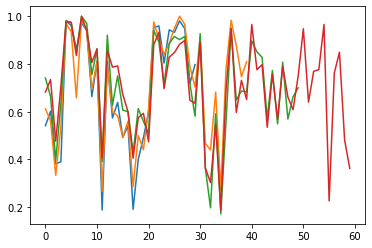

In [64]:
plt.plot(class_C19_RW29, table_score_C19_RW29)
plt.plot(class_C19_RW39, table_score_C19_RW39)
plt.plot(class_C19_RW49, table_score_C19_RW49)
plt.plot(class_C19_RW59, table_score_C19_RW59)

In [65]:
np.set_printoptions(precision=3)
print(display(HTML(tabulate(np.float32(np.around(table_C19_RW29,4)), headers='firstrow', tablefmt='html'))))
print(display(HTML(tabulate(np.float32(np.around(table_C19_RW39,4)), headers='firstrow', tablefmt='html'))))
print(display(HTML(tabulate(np.float32(np.around(table_C19_RW49,4)), headers='firstrow', tablefmt='html'))))
print(display(HTML(tabulate(np.float32(np.around(table_C19_RW59,4)), headers='firstrow', tablefmt='html'))))

0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0
0.5412,0.602,0.381,0.3902,0.9796,0.961,0.8608,0.9722,0.9403,0.6633,0.8105,0.1875,0.8095,0.5733,0.6389,0.4918,0.54,0.1905,0.4,0.4915,0.5965,0.9524,0.9595,0.8036,0.9429,0.9322,0.9804,0.9492,0.7183,0.7973


None


0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0
0.6118,0.5612,0.3333,0.5366,0.9694,0.9351,0.6582,0.9861,0.9403,0.6939,0.8105,0.2656,0.7937,0.6,0.5833,0.4918,0.56,0.2857,0.5,0.4407,0.614,0.9762,0.9054,0.8393,0.8857,0.9492,1,0.9661,0.7887,0.7027,0.9146,0.4675,0.4394,0.6818,0.2714,0.7778,0.9831,0.8772,0.7463,0.8095


None


0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0
0.7412,0.6633,0.3968,0.6341,0.9796,0.974,0.8481,1,0.9701,0.7551,0.8632,0.3906,0.9206,0.6267,0.75,0.6066,0.6,0.4286,0.6125,0.5593,0.5088,0.9405,0.8919,0.7143,0.8857,0.9153,0.902,0.9153,0.7183,0.5811,0.9268,0.3636,0.197,0.5909,0.1714,0.5556,0.9492,0.6491,0.6866,0.6825,0.8966,0.8507,0.8281,0.569,0.7727,0.549,0.8077,0.5692,0.6622,0.7


None


0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0
0.6824,0.7347,0.4762,0.7073,0.9796,0.974,0.8354,1,0.9403,0.8061,0.8632,0.4062,0.8571,0.7867,0.7917,0.6721,0.6,0.4048,0.575,0.5932,0.4737,0.881,0.9324,0.6964,0.8286,0.8475,0.8824,0.8983,0.6479,0.6351,0.8902,0.3636,0.303,0.5455,0.1857,0.6889,0.9492,0.5965,0.7313,0.6508,0.9655,0.7761,0.7969,0.5345,0.7576,0.5686,0.7885,0.6615,0.6081,0.75,0.9474,0.64,0.7692,0.7763,0.9655,0.2258,0.7625,0.8491,0.4808,0.3621


None


## Experiment 1 - Source(0-20) - Target(0-n), n in [30,40, 50, 60]

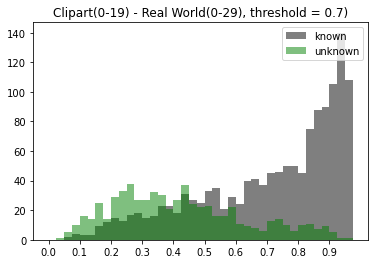

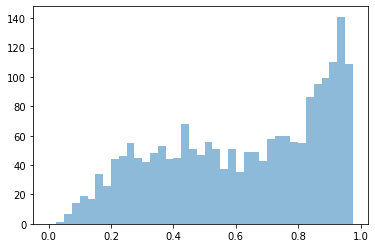

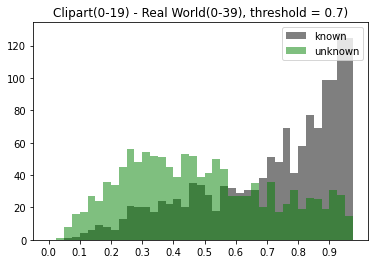

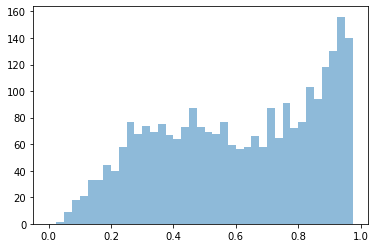

In [66]:
plt.hist(extracted_scores_target_knowns_C19_RW29, bins=bins, alpha=0.5, label='known', color='black', density=False)
plt.hist(extracted_scores_target_unknowns_C19_RW29, bins=bins, alpha=0.5, label='unknown', color='green', density=False)
plt.title(f'Clipart(0-19) - Real World(0-29), threshold = {threshold_C19_RW29})')
plt.xticks(xticks)
plt.legend(loc='upper right')
plt.show()

plt.hist(scores_C19_RW29, bins=bins, alpha=0.5, label='known', density=False)
plt.show()

plt.hist(extracted_scores_target_knowns_C19_RW39, bins=bins, alpha=0.5, label='known', color='black', density=False)
plt.hist(extracted_scores_target_unknowns_C19_RW39, bins=bins, alpha=0.5, label='unknown', color='green', density=False)
plt.title(f'Clipart(0-19) - Real World(0-39), threshold = {threshold_C19_RW39})')
plt.xticks(xticks)
plt.legend(loc='upper right')
plt.show()

plt.hist(scores_C19_RW39, bins=bins, alpha=0.5, label='known', density=False)
plt.show()



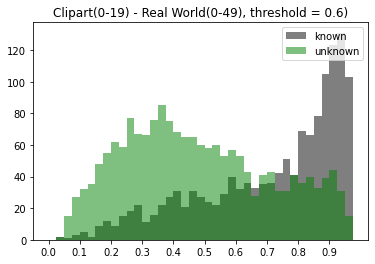

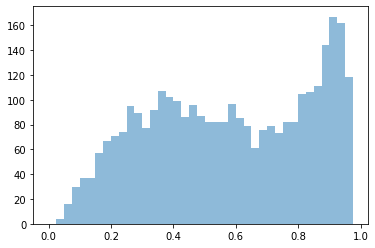

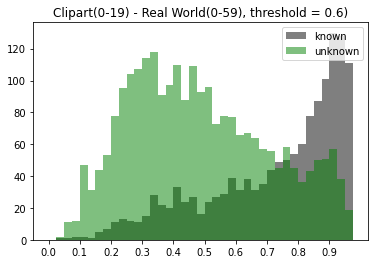

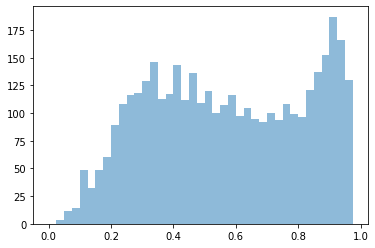

In [67]:
plt.hist(extracted_scores_target_knowns_C19_RW49, bins=bins, alpha=0.5, label='known', color='black', density=False)
plt.hist(extracted_scores_target_unknowns_C19_RW49, bins=bins, alpha=0.5, label='unknown', color='green', density=False)
plt.title(f'Clipart(0-19) - Real World(0-49), threshold = {threshold_C19_RW49})')
plt.xticks(xticks)
plt.legend(loc='upper right')
plt.show()

plt.hist(scores_C19_RW49, bins=bins, alpha=0.5, label='known', density=False)
plt.show()

plt.hist(extracted_scores_target_knowns_C19_RW59, bins=bins, alpha=0.5, label='known', color='black', density=False)
plt.hist(extracted_scores_target_unknowns_C19_RW59, bins=bins, alpha=0.5, label='unknown', color='green', density=False)
plt.title(f'Clipart(0-19) - Real World(0-59), threshold = {threshold_C19_RW59})')
plt.xticks(xticks)
plt.legend(loc='upper right')
plt.show()

plt.hist(scores_C19_RW59, bins=bins, alpha=0.5, label='known', density=False)
plt.show()

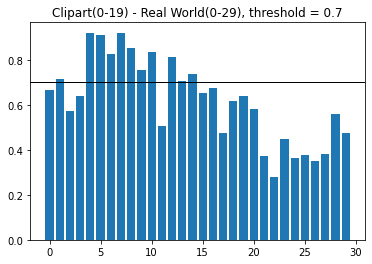

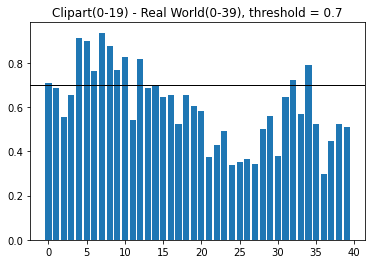

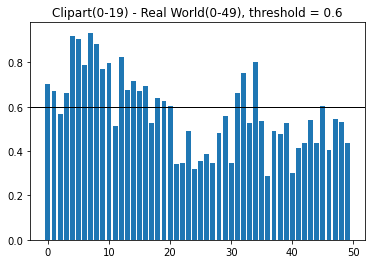

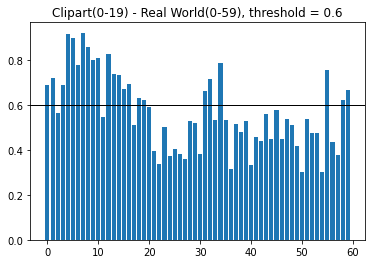

In [68]:
plt.bar(class_C19_RW29, scor_C19_RW29)
plt.title(f'Clipart(0-19) - Real World(0-29), threshold = {threshold_C19_RW29}')
plt.axhline(y=threshold_C19_RW29,linewidth=1, color='k')
plt.show()

plt.bar(class_C19_RW39, scor_C19_RW39)
plt.title(f'Clipart(0-19) - Real World(0-39), threshold = {threshold_C19_RW39}')
plt.axhline(y=threshold_C19_RW39,linewidth=1, color='k')
plt.show()

plt.bar(class_C19_RW49, scor_C19_RW49)
plt.title(f'Clipart(0-19) - Real World(0-49), threshold = {threshold_C19_RW49}')
plt.axhline(y=threshold_C19_RW49,linewidth=1, color='k')
plt.show()

plt.bar(class_C19_RW59, scor_C19_RW59)
plt.title(f'Clipart(0-19) - Real World(0-59), threshold = {threshold_C19_RW59}')
plt.axhline(y=threshold_C19_RW59,linewidth=1, color='k')
plt.show()

In [69]:
print(tabulate([
                [f'precision_kn_C19_RW29, TP+FP_kn = {TP_kn_C19_RW29 + FP_kn_C19_RW29}', f'precision_unk_C19_RW29, TP+FP_unk = {TP_unk_C19_RW29 + FP_unk_C19_RW29}'],
                [precision_kn_C19_RW29,
                precision_unk_C19_RW29,
                ]   
                ], headers='firstrow', tablefmt='fancy_grid',))

print(tabulate([
                [f'precision_kn_C19_RW39, TP+FP_kn = {TP_kn_C19_RW39 + FP_kn_C19_RW39}', f'precision_unk_C19_RW39, TP+FP_unk = {TP_unk_C19_RW39 + FP_unk_C19_RW39}'],
                [precision_kn_C19_RW39,
                precision_unk_C19_RW39,
                ]   
                ], headers='firstrow', tablefmt='fancy_grid',))

print(tabulate([
                [f'precision_kn_C19_RW49, TP+FP_kn = {TP_kn_C19_RW49 + FP_kn_C19_RW49}', f'precision_unk_C19_RW49, TP+FP_unk = {TP_unk_C19_RW49 + FP_unk_C19_RW49}'],
                [precision_kn_C19_RW49,
                precision_unk_C19_RW49,
                ]   
                ], headers='firstrow', tablefmt='fancy_grid',))
print(tabulate([
                [f'precision_kn_C19_RW59, TP+FP_kn = {TP_kn_C19_RW59 + FP_kn_C19_RW59}', f'precision_unk_C19_RW59, TP+FP_unk = {TP_unk_C19_RW59 + FP_unk_C19_RW59}'],
                [precision_kn_C19_RW59,
                precision_unk_C19_RW59,
                ]   
                ], headers='firstrow', tablefmt='fancy_grid',))

╒══════════════════════════════════════════╤════════════════════════════════════════════╕
│   precision_kn_C19_RW29, TP+FP_kn = 1038 │   precision_unk_C19_RW29, TP+FP_unk = 1062 │
╞══════════════════════════════════════════╪════════════════════════════════════════════╡
│                                 0.917148 │                                   0.502825 │
╘══════════════════════════════════════════╧════════════════════════════════════════════╛
╒══════════════════════════════════════════╤════════════════════════════════════════════╕
│   precision_kn_C19_RW39, TP+FP_kn = 1236 │   precision_unk_C19_RW39, TP+FP_unk = 1472 │
╞══════════════════════════════════════════╪════════════════════════════════════════════╡
│                                 0.776699 │                                   0.646739 │
╘══════════════════════════════════════════╧════════════════════════════════════════════╛
╒══════════════════════════════════════════╤════════════════════════════════════════════╕
│   precis

## Experiment 2 - Source(0-n) - Target(0-(n+20)), n in [20,30,40]

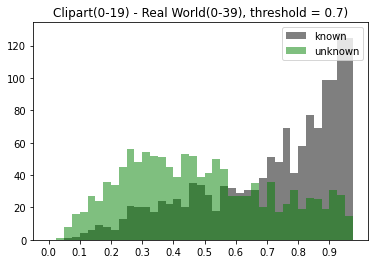

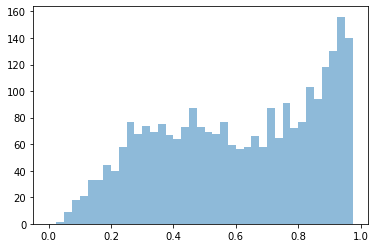

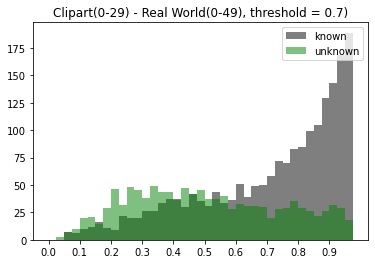

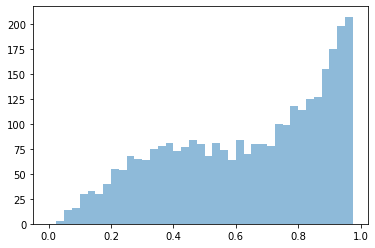

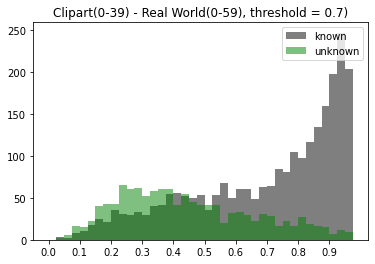

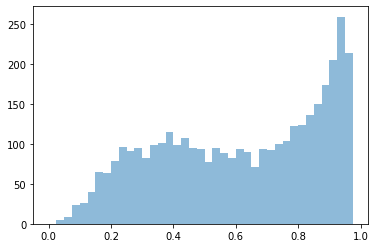

In [70]:
plt.hist(extracted_scores_target_knowns_C19_RW39, bins=bins, alpha=0.5, label='known', color='black', density=False)
plt.hist(extracted_scores_target_unknowns_C19_RW39, bins=bins, alpha=0.5, label='unknown', color='green', density=False)
plt.title(f'Clipart(0-19) - Real World(0-39), threshold = {threshold_C19_RW39})')
plt.xticks(xticks)
plt.legend(loc='upper right')
plt.show()

plt.hist(scores_C19_RW39, bins=bins, alpha=0.5, label='known', density=False)
plt.show()

plt.hist(extracted_scores_target_knowns_C29_RW49, bins=bins, alpha=0.5, label='known', color='black', density=False)
plt.hist(extracted_scores_target_unknowns_C29_RW49, bins=bins, alpha=0.5, label='unknown', color='green', density=False)
plt.title(f'Clipart(0-29) - Real World(0-49), threshold = {threshold_C29_RW49})')
plt.xticks(xticks)
plt.legend(loc='upper right')
plt.show()

plt.hist(scores_C29_RW49, bins=bins, alpha=0.5, label='known', density=False)
plt.show()



plt.hist(extracted_scores_target_knowns_C39_RW59, bins=bins, alpha=0.5, label='known', color='black', density=False)
plt.hist(extracted_scores_target_unknowns_C39_RW59, bins=bins, alpha=0.5, label='unknown', color='green', density=False)
plt.title(f'Clipart(0-39) - Real World(0-59), threshold = {threshold_C39_RW59})')
plt.xticks(xticks)
plt.legend(loc='upper right')
plt.show()

plt.hist(scores_C39_RW59, bins=bins, alpha=0.5, label='known', density=False)
plt.show()

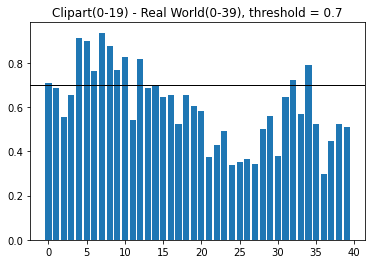

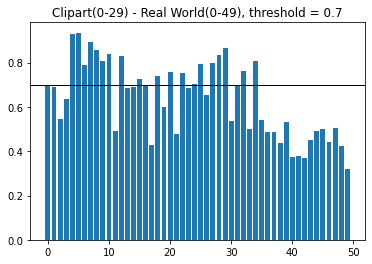

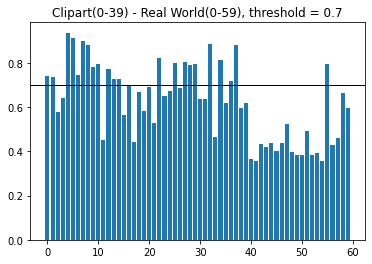

In [71]:
plt.bar(class_C19_RW39, scor_C19_RW39)
plt.title(f'Clipart(0-19) - Real World(0-39), threshold = {threshold_C19_RW39}')
plt.axhline(y=threshold_C19_RW39,linewidth=1, color='k')
plt.show()

plt.bar(class_C29_RW49, scor_C29_RW49)
plt.title(f'Clipart(0-29) - Real World(0-49), threshold = {threshold_C29_RW49}')
plt.axhline(y=threshold_C29_RW49,linewidth=1, color='k')
plt.show()


plt.bar(class_C39_RW59, scor_C39_RW59)
plt.title(f'Clipart(0-39) - Real World(0-59), threshold = {threshold_C39_RW59}')
plt.axhline(y=threshold_C39_RW59,linewidth=1, color='k')
plt.show()


In [72]:
print(tabulate([
                [f'precision_kn_C19_RW39, TP+FP_kn = {TP_kn_C19_RW39 + FP_kn_C19_RW39}', f'precision_unk_C19_RW39, TP+FP_unk = {TP_unk_C19_RW39 + FP_unk_C19_RW39}'],
                [precision_kn_C19_RW39,
                precision_unk_C19_RW39,
                ]   
                ], headers='firstrow', tablefmt='fancy_grid',))

print(tabulate([
                [f'precision_kn_C29_RW49, TP+FP_kn = {TP_kn_C29_RW49 + FP_kn_C29_RW49}', f'precision_unk_C29_RW49, TP+FP_unk = {TP_unk_C29_RW49 + FP_unk_C29_RW49}'],
                [precision_kn_C29_RW49,
                precision_unk_C29_RW49,
                ]   
                ], headers='firstrow', tablefmt='fancy_grid',))

print(tabulate([
                [f'precision_kn_C39_RW59, TP+FP_kn = {TP_kn_C39_RW59 + FP_kn_C39_RW59}', f'precision_unk_C39_RW59, TP+FP_unk = {TP_unk_C39_RW59 + FP_unk_C39_RW59}'],
                [precision_kn_C39_RW59,
                precision_unk_C39_RW59,
                ]   
                ], headers='firstrow', tablefmt='fancy_grid',))

╒══════════════════════════════════════════╤════════════════════════════════════════════╕
│   precision_kn_C19_RW39, TP+FP_kn = 1236 │   precision_unk_C19_RW39, TP+FP_unk = 1472 │
╞══════════════════════════════════════════╪════════════════════════════════════════════╡
│                                 0.776699 │                                   0.646739 │
╘══════════════════════════════════════════╧════════════════════════════════════════════╛
╒══════════════════════════════════════════╤════════════════════════════════════════════╕
│   precision_kn_C29_RW49, TP+FP_kn = 1680 │   precision_unk_C29_RW49, TP+FP_unk = 1594 │
╞══════════════════════════════════════════╪════════════════════════════════════════════╡
│                                 0.819643 │                                   0.546424 │
╘══════════════════════════════════════════╧════════════════════════════════════════════╛
╒══════════════════════════════════════════╤════════════════════════════════════════════╕
│   precis